In [5]:

import pandas as pd
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib as plt
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf

new_directory = r'C:\Users\DELL\Downloads'  
os.chdir(new_directory)

(640, 2)


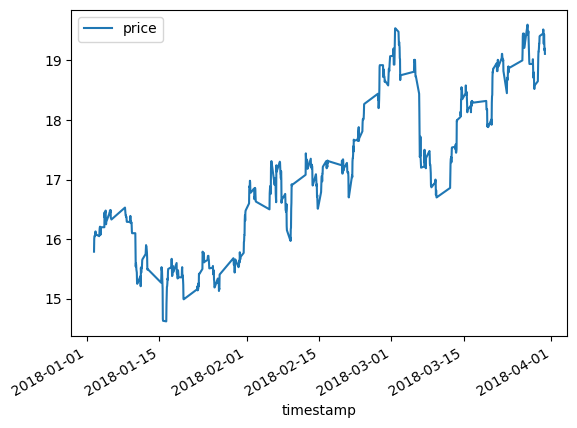

In [11]:

# Read the CSV file into a pandas DataFrame
data = pd.read_csv('20180101_20180401_bist30.csv', index_col='timestamp', parse_dates=True)
company_1_data = data[data['short_name'] == 'THYAO']


fig, ax =plt.subplots()
company_1_data.plot(ax=ax)
plt.show()

company_1_data= company_1_data['price']



<span style="color:red">**First, I compared 3 different methods RF, linear regression and ARIMA. I first tried it with data 1, i.e. the first excel file; and looked at THYAO data. I took the 80% as train and the rest as test.For ARIMA, I used the parameters of 30,1,1; which were evaluated in the following codes.**</span>



Root Mean Squared Error: 0.15999423055074027
Mean Weighted Absolute Percentage Error (MWAPE): 0.006686265522168634


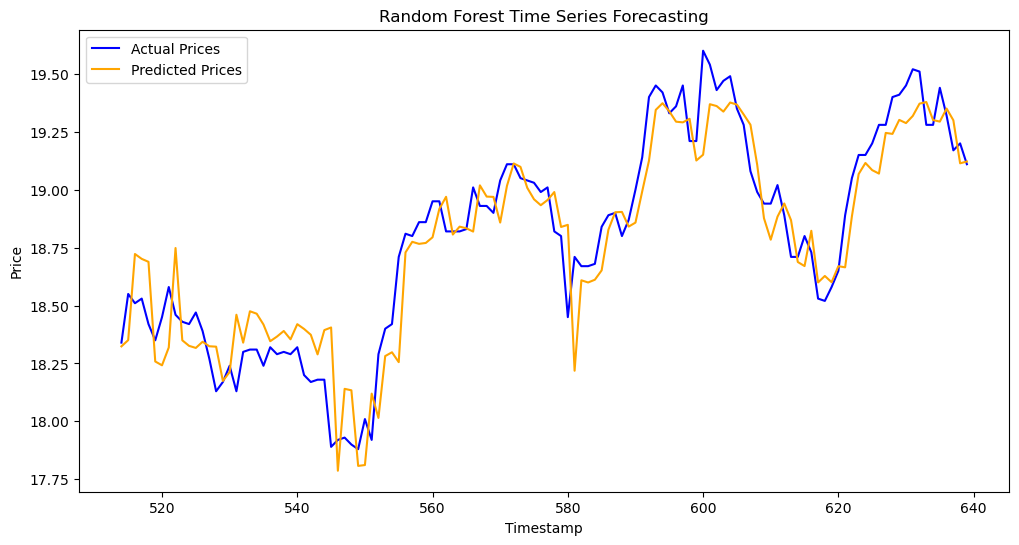

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt

data=company_1_data
target_column = data.values

# Create a DataFrame with lag features
data = pd.DataFrame({'price': target_column})

# Feature engineering: Adding lag features
for i in range(1, 11):
    data[f'lag_{i}'] = data['price'].shift(i)

# Drop rows with NaN values due to lag features
data = data.dropna()



# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

# Separate features and target variable
X_train, y_train = train_data.drop('price', axis=1), train_data['price']
X_test, y_test = test_data.drop('price', axis=1), test_data['price']

# Create a Random Forest Regressor
rf_model = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

# Calculate MWAPE
def calculate_mwape(actual, predicted):
    return np.mean(np.abs(actual - predicted) / np.abs(actual))

mwape = calculate_mwape(y_test, y_pred)
print(f'Mean Weighted Absolute Percentage Error (MWAPE): {mwape}')

# Plotting actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_test, label='Actual Prices', color='blue')
plt.plot(test_data.index, y_pred, label='Predicted Prices', color='orange')
plt.title('Random Forest Time Series Forecasting')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.show()


Root Mean Squared Error: 0.12079557962652267
Mean Weighted Absolute Percentage Error (MWAPE): 0.004740389442806533


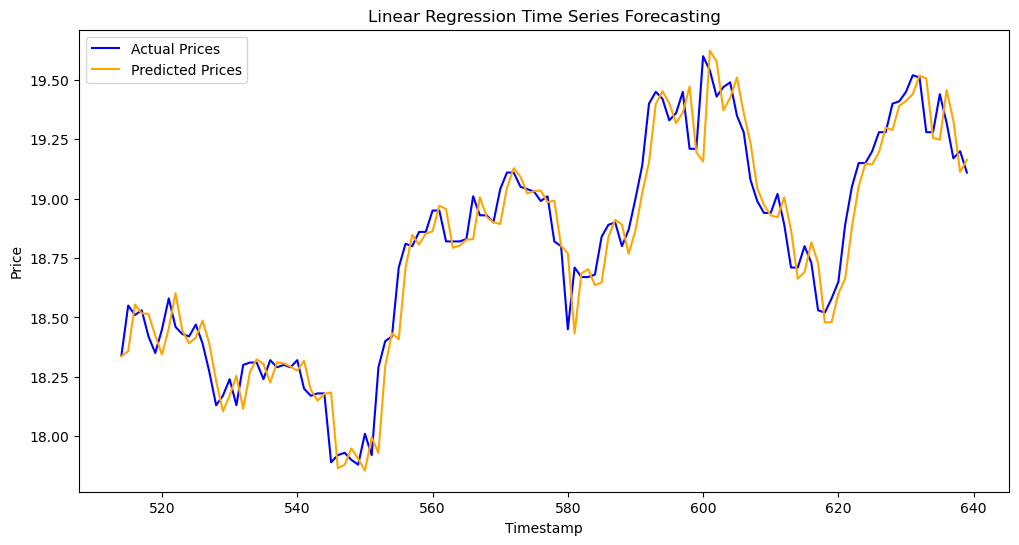

In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming you have a Series named 'series'
# Replace 'your_data.csv' with your actual file or data loading method

# Create a Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

# Calculate MWAPE
def calculate_mwape(actual, predicted):
    return np.mean(np.abs(actual - predicted) / np.abs(actual))

mwape = calculate_mwape(y_test, y_pred)
print(f'Mean Weighted Absolute Percentage Error (MWAPE): {mwape}')

# Plotting actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_test, label='Actual Prices', color='blue')
plt.plot(test_data.index, y_pred, label='Predicted Prices', color='orange')
plt.title('Linear Regression Time Series Forecasting')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.show()


In [28]:

#ARIMA

##stationary 

company_1_stationary= company_1_data.diff().dropna()
print(company_1_stationary)


from statsmodels.tsa.stattools import adfuller

# Assuming 'data' is your time series data
result = adfuller(company_1_stationary)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

#stationary check, it is stationary

timestamp
2018-01-02 10:00:00+03:00    0.22
2018-01-02 11:00:00+03:00    0.04
2018-01-02 12:00:00+03:00    0.00
2018-01-02 13:00:00+03:00    0.01
2018-01-02 14:00:00+03:00   -0.01
                             ... 
2018-03-30 14:00:00+03:00    0.16
2018-03-30 15:00:00+03:00   -0.12
2018-03-30 16:00:00+03:00   -0.15
2018-03-30 17:00:00+03:00    0.03
2018-03-30 18:00:00+03:00   -0.09
Name: price, Length: 639, dtype: float64
ADF Statistic: -16.13966323231865
p-value: 4.690615998630029e-29
Critical Values: {'1%': -3.44065745275905, '5%': -2.8660879520543534, '10%': -2.5691919933016076}


In [29]:
##model=ARIMA(company_1_stationary, order=(p,d,q))
#p (AR - AutoRegressive):  It indicates how many past observations influence the current one.
#d (I - Integrated): the number of differenciating needed to make the data stationary. if the dtaa is already stationary, set it to 0.
#q (MA - Moving Average): It represents the size of the moving average window and indicates the number of lagged forecast errors in the prediction equation. 


model=ARIMA(company_1_data, order=(30,1,1))
results= model.fit()
print(results.summary())



C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  640
Model:                ARIMA(30, 1, 1)   Log Likelihood                 451.757
Date:                Wed, 17 Jan 2024   AIC                           -839.513
Time:                        13:05:44   BIC                           -696.796
Sample:                             0   HQIC                          -784.114
                                - 640                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2192      2.745     -0.080      0.936      -5.599       5.161
ar.L2          0.0960      0.173      0.555      0.579      -0.243       0.435
ar.L3         -0.0230      0.220     -0.104      0.9

In [33]:
forecast=results.get_prediction(start=-128)
mean_forecast=forecast.predicted_mean
confidence_intervals=forecast.conf_int()
print(confidence_intervals)
lower_limits = confidence_intervals.loc[:,'lower price']
upper_limits = confidence_intervals.loc[:,'upper price']


                           lower price  upper price
timestamp                                          
2018-03-14 11:00:00+03:00    17.924113    18.391432
2018-03-14 12:00:00+03:00    17.849370    18.316688
2018-03-14 13:00:00+03:00    18.122321    18.589640
2018-03-14 14:00:00+03:00    18.093302    18.560621
2018-03-14 15:00:00+03:00    18.319440    18.786759
...                                ...          ...
2018-03-30 14:00:00+03:00    19.021689    19.489007
2018-03-30 15:00:00+03:00    19.186758    19.654077
2018-03-30 16:00:00+03:00    19.096760    19.564079
2018-03-30 17:00:00+03:00    18.923420    19.390738
2018-03-30 18:00:00+03:00    18.923556    19.390875

[128 rows x 2 columns]


Root Mean Squared Error: 0.11624825010362062
Mean Weighted Absolute Percentage Error (MWAPE): 0.00452682322171308


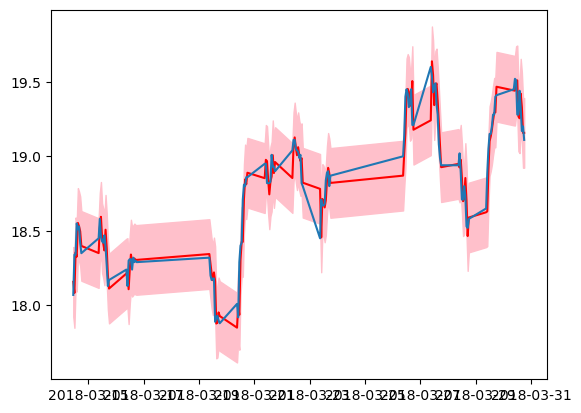

In [38]:
time= company_1_data.index

plt.figure()

plt.plot(time[512:640], mean_forecast.values, color='red', label='forecast')

plt.fill_between(time[512:640], lower_limits, upper_limits, color='pink')

plt.plot(time[512:640], company_1_data[512:640], label='Actual Data')  # Replace with your actual data

plt.show



# Evaluate the model
rmse = np.sqrt(mean_squared_error(company_1_data[512:640], mean_forecast.values ))
print(f'Root Mean Squared Error: {rmse}')

# Calculate MWAPE
def calculate_mwape(actual, predicted):
    return np.mean(np.abs(actual - predicted) / np.abs(actual))

mwape = calculate_mwape(company_1_data[512:640], mean_forecast.values )
print(f'Mean Weighted Absolute Percentage Error (MWAPE): {mwape}')


<span style="color:red ">**Then, i tried with another company, ARCLK and another time interval. Both the previous and this comparison gave the result of ARIMA method is working the best**.</span>


RF:Root Mean Squared Error: 2.8936798721471537
RF:Mean Weighted Absolute Percentage Error (MWAPE): 0.041290602494520025


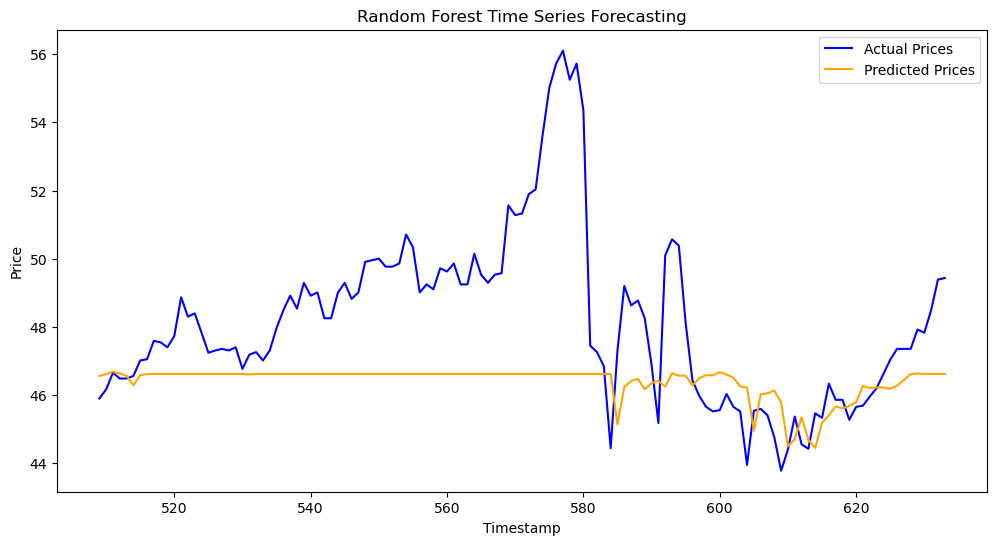

LR:Root Mean Squared Error: 1.0828321818721736
LR:Mean Weighted Absolute Percentage Error (MWAPE): 0.013146473734283818


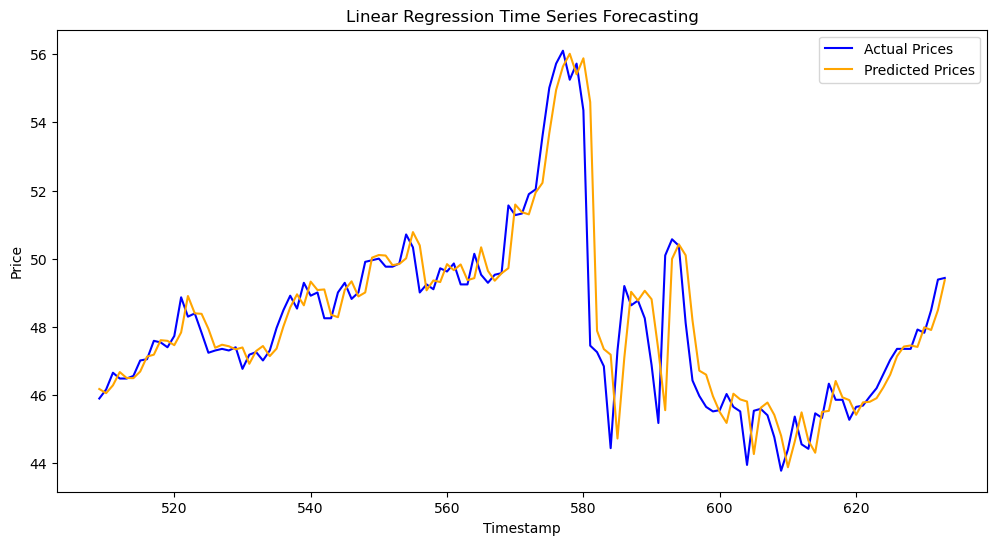

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA:Root Mean Squared Error: 0.9260238039211902
ARIMA:Mean Weighted Absolute Percentage Error (MWAPE): 0.01197928330313338


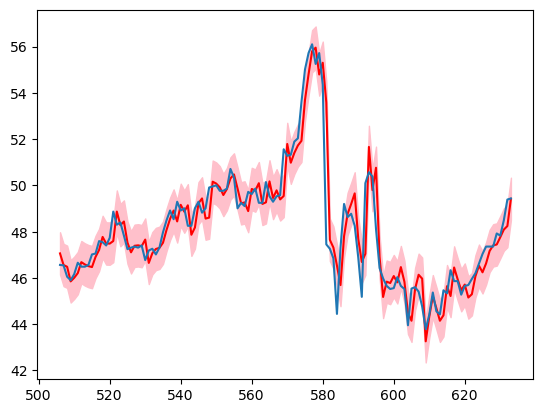

In [68]:
data16= pd.read_csv('20210927_20211226_bist30.csv', index_col='timestamp', parse_dates=True)
companydata = data16[data16['short_name'] == 'ARCLK']
companydata= companydata['price']

data = companydata
target_column = data.values

# Create a DataFrame with lag features
data = pd.DataFrame({'price': target_column})

# Feature engineering: Adding lag features
for i in range(1, 11):
    data[f'lag_{i}'] = data['price'].shift(i)

# Drop rows with NaN values due to lag features
data = data.dropna()



# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

# Separate features and target variable
X_train, y_train = train_data.drop('price', axis=1), train_data['price']
X_test, y_test = test_data.drop('price', axis=1), test_data['price']

#RF

# Create a Random Forest Regressor
rf_model = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RF:Root Mean Squared Error: {rmse}')

# Calculate MWAPE
def calculate_mwape(actual, predicted):
    return np.mean(np.abs(actual - predicted) / np.abs(actual))

mwape = calculate_mwape(y_test, y_pred)
print(f'RF:Mean Weighted Absolute Percentage Error (MWAPE): {mwape}')

# Plotting actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_test, label='Actual Prices', color='blue')
plt.plot(test_data.index, y_pred, label='Predicted Prices', color='orange')
plt.title('Random Forest Time Series Forecasting')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.show()


#Linear Regression
# Create a Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'LR:Root Mean Squared Error: {rmse}')

# Calculate MWAPE
def calculate_mwape(actual, predicted):
    return np.mean(np.abs(actual - predicted) / np.abs(actual))

mwape = calculate_mwape(y_test, y_pred)
print(f'LR:Mean Weighted Absolute Percentage Error (MWAPE): {mwape}')

# Plotting actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_test, label='Actual Prices', color='blue')
plt.plot(test_data.index, y_pred, label='Predicted Prices', color='orange')
plt.title('Linear Regression Time Series Forecasting')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.show()

##model=ARIMA(company_1_stationary, order=(p,d,q))
#p (AR - AutoRegressive):  It indicates how many past observations influence the current one.
#d (I - Integrated): the number of differenciating needed to make the data stationary. if the dtaa is already stationary, set it to 0.
#q (MA - Moving Average): It represents the size of the moving average window and indicates the number of lagged forecast errors in the prediction equation. 


model=ARIMA(companydata, order=(30,1,1))
results= model.fit()

time= data.index
forecast=results.get_prediction(start=-128)
mean_forecast=forecast.predicted_mean
confidence_intervals=forecast.conf_int()

lower_limits = confidence_intervals.loc[:,'lower price']
upper_limits = confidence_intervals.loc[:,'upper price']

plt.figure()

plt.plot(time[496:640], mean_forecast.values, color='red', label='forecast')

plt.fill_between(time[496:640], lower_limits, upper_limits, color='pink')

plt.plot(time[496:640], companydata[506:640], label='Actual Data')  # Replace with your actual data

plt.show



# Evaluate the model
rmse = np.sqrt(mean_squared_error(companydata[506:640], mean_forecast.values ))
print(f'ARIMA:Root Mean Squared Error: {rmse}')

# Calculate MWAPE
def calculate_mwape(actual, predicted):
    return np.mean(np.abs(actual - predicted) / np.abs(actual))

mwape = calculate_mwape(companydata[506:640], mean_forecast.values )
print(f'ARIMA:Mean Weighted Absolute Percentage Error (MWAPE): {mwape}')

<span style="color:#FF69B4">**Following code is only for visualization purposes** </span>


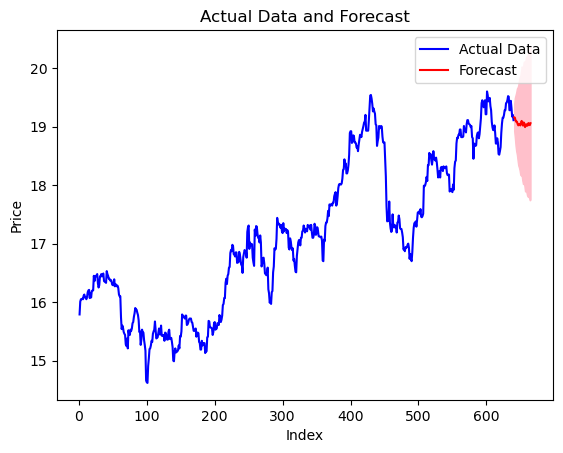

In [86]:
import pandas as pd
import matplotlib.pyplot as plt


forecast = results.get_prediction(start=len(company_1_data), end=len(company_1_data) + 24)
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
lower_limits = confidence_intervals.loc[:, 'lower price']
upper_limits = confidence_intervals.loc[:, 'upper price']


# Create numerical index for actual data
num_indices = range(1, len(company_1_data) + 1)
company_1_data.index = num_indices  # Reindexing with numerical indices

# Create numerical index for forecasted data (641 to 665)
num_new_indices = range(len(company_1_data) + 1, len(company_1_data) + len(mean_forecast) + 1)

plt.figure()

# Plotting the actual data with numerical indices
plt.plot(num_indices, company_1_data, label='Actual Data', color='blue')

# Plotting the forecasted values with new numerical indices
plt.plot(num_new_indices, mean_forecast.values, color='red', label='Forecast')

# Fill between the confidence intervals
plt.fill_between(num_new_indices, lower_limits, upper_limits, color='pink')

plt.xlabel('Index')  # Update with appropriate label
plt.ylabel('Price')  # Update with appropriate label
plt.title('Actual Data and Forecast')
plt.legend()
plt.show()


In [2]:
data1= pd.read_csv('20180101_20180401_bist30.csv', index_col='timestamp', parse_dates=True)
data2= pd.read_csv('20180402_20180701_bist30.csv', index_col='timestamp', parse_dates=True)
data3= pd.read_csv('20180702_20180930_bist30.csv', index_col='timestamp', parse_dates=True)
data4= pd.read_csv('20181001_20181230_bist30.csv', index_col='timestamp', parse_dates=True)
data5= pd.read_csv('20181231_20190331_bist30.csv', index_col='timestamp', parse_dates=True)
data6= pd.read_csv('20190401_20190630_bist30.csv', index_col='timestamp', parse_dates=True)
data7= pd.read_csv('20190701_20190929_bist30.csv', index_col='timestamp', parse_dates=True)
data8= pd.read_csv('20190930_20191229_bist30.csv', index_col='timestamp', parse_dates=True)
data9= pd.read_csv('20191230_20200329_bist30.csv', index_col='timestamp', parse_dates=True)
data10= pd.read_csv('20200330_20200628_bist30.csv', index_col='timestamp', parse_dates=True)
data11= pd.read_csv('20200629_20200927_bist30.csv', index_col='timestamp', parse_dates=True)
data12= pd.read_csv('20200928_20201227_bist30.csv', index_col='timestamp', parse_dates=True)
data13= pd.read_csv('20201228_20210328_bist30.csv', index_col='timestamp', parse_dates=True)
data14= pd.read_csv('20210329_20210627_bist30.csv', index_col='timestamp', parse_dates=True)
data15= pd.read_csv('20210628_20210926_bist30.csv', index_col='timestamp', parse_dates=True)
data16= pd.read_csv('20210927_20211226_bist30.csv', index_col='timestamp', parse_dates=True)
data17= pd.read_csv('20211227_20220327_bist30.csv', index_col='timestamp', parse_dates=True)
data18= pd.read_csv('20220328_20220626_bist30.csv', index_col='timestamp', parse_dates=True)
data19= pd.read_csv('20220627_20220925_bist30.csv', index_col='timestamp', parse_dates=True)
data20= pd.read_csv('20220926_20221225_bist30.csv', index_col='timestamp', parse_dates=True)
data21= pd.read_csv('20221226_20230326_bist30.csv', index_col='timestamp', parse_dates=True)
data22= pd.read_csv('20230327_20230625_bist30.csv', index_col='timestamp', parse_dates=True)
data23= pd.read_csv('20230626_20230924_bist30.csv', index_col='timestamp', parse_dates=True)
data24= pd.read_csv('20230925_20231224_bist30.csv', index_col='timestamp', parse_dates=True)


<span style="color:red"> **Here, I have uploaded all the data and did cross validation, i.e. i took different train and test data sets. Then i found that 30,1,1 parameters will work the best considering all cases.**</span>

In [492]:
#15,17,18,19, 20, 21, 22, 23, 24
traindata=pd.concat([data1, data2, data3,data4, data5, data6, data7, data8, data9, data10, data11,data12, data13, data14, data15,data16,data17,data18,data19,data20,data21,data22,data23])
testdata=data24

# Display combined_data
print(traindata.head(10))

company_1_data = traindata[traindata['short_name'] == 'THYAO']
company_1_data= company_1_data.drop(columns=['short_name'])
company_1_datat=  testdata[testdata['short_name'] == 'THYAO']
company_1_datat= company_1_datat.drop(columns=['short_name'])
company_1_datatest= company_1_datat


                           price short_name
timestamp                                  
2018-01-02 09:00:00+03:00  15.79      THYAO
2018-01-02 10:00:00+03:00  16.01      THYAO
2018-01-02 11:00:00+03:00  16.05      THYAO
2018-01-02 12:00:00+03:00  16.05      THYAO
2018-01-02 13:00:00+03:00  16.06      THYAO
2018-01-02 14:00:00+03:00  16.05      THYAO
2018-01-02 15:00:00+03:00  16.11      THYAO
2018-01-02 16:00:00+03:00  16.13      THYAO
2018-01-02 17:00:00+03:00  16.08      THYAO
2018-01-02 18:00:00+03:00  16.08      THYAO


In [463]:
from statsmodels.tsa.stattools import adfuller
##stationary

company_1_stationary= company_1_data.diff().dropna()
print(company_1_stationary)

# Assuming 'data' is your time series data
resultxx = adfuller(company_1_stationary)
print('ADF Statistic:', resultxx[0])
print('p-value:', resultxx[1])
print('Critical Values:', resultxx[4])

#stationary check, it is stationary(ADF lower than critical values and p-value close to 0)

                           price
timestamp                       
2018-01-02 10:00:00+03:00   0.22
2018-01-02 11:00:00+03:00   0.04
2018-01-02 12:00:00+03:00   0.00
2018-01-02 13:00:00+03:00   0.01
2018-01-02 14:00:00+03:00  -0.01
...                          ...
2023-10-20 14:00:00+03:00  -0.20
2023-10-20 15:00:00+03:00  -0.20
2023-10-20 16:00:00+03:00  -1.50
2023-10-20 17:00:00+03:00   0.20
2023-10-20 18:00:00+03:00  -0.30

[14426 rows x 1 columns]
ADF Statistic: -16.616757692900425
p-value: 1.7119371132762855e-29
Critical Values: {'1%': -3.4308046727350603, '5%': -2.8617409450488616, '10%': -2.5668769583088533}


In [42]:
##model=ARIMA(company_1_stationary, order=(p,d,q))
#p (AR - AutoRegressive):  It indicates how many past observations influence the current one.
#d (I - Integrated): the number of differenciating needed to make the data stationary. if the dtaa is already stationary, set it to 0.
#q (MA - Moving Average): It represents the size of the moving average window and indicates the number of lagged forecast errors in the prediction equation. 


model=ARIMA(company_1_data, order=(30,1,1))
results= model.fit()
print(results.summary())

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  640
Model:                ARIMA(30, 1, 1)   Log Likelihood                 451.757
Date:                Wed, 17 Jan 2024   AIC                           -839.513
Time:                        13:22:19   BIC                           -696.796
Sample:                             0   HQIC                          -784.114
                                - 640                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2192      2.745     -0.080      0.936      -5.599       5.161
ar.L2          0.0960      0.173      0.555      0.579      -0.243       0.435
ar.L3         -0.0230      0.220     -0.104      0.9

In [43]:
forecast = results.get_prediction(start=len(company_1_data), end=len(company_1_data) + 9)
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
lower_limits = confidence_intervals.loc[:, 'lower price']
upper_limits = confidence_intervals.loc[:, 'upper price']

print(mean_forecast)
print(confidence_intervals)


640    19.106957
641    19.084017
642    19.046349
643    19.003089
644    19.002918
645    19.018835
646    18.983433
647    18.955846
648    18.953437
649    18.959358
Name: predicted_mean, dtype: float64
     lower price  upper price
640    18.873297    19.340616
641    18.743530    19.424504
642    18.613653    19.479044
643    18.498936    19.507242
644    18.436056    19.569780
645    18.392345    19.645325
646    18.297282    19.669584
647    18.213774    19.697919
648    18.159284    19.747589
649    18.117652    19.801063


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


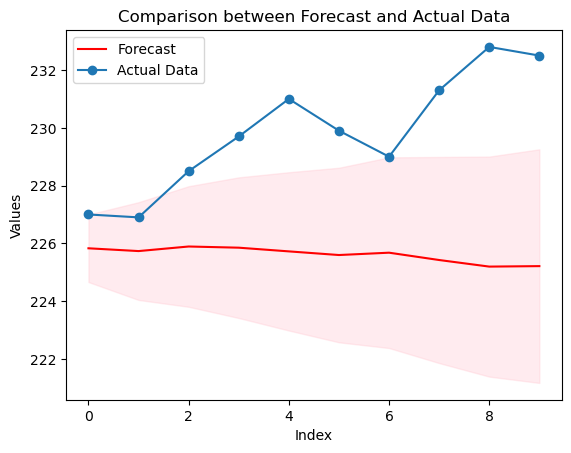

In [509]:


plt.figure()

# Plotting the forecasted values and confidence intervals
plt.plot(mean_forecast.values, color='red', label='Forecast')
plt.fill_between(range(len(mean_forecast)), lower_limits, upper_limits, color='pink', alpha=0.3)

# Plotting the first 25 points of company_1_data2 as 'Actual Data'
plt.plot(range(10), company_1_datatest.iloc[:10], label='Actual Data', marker='o')  # Adjust the slicing as needed

plt.xlabel('Index')  # Update with appropriate label
plt.ylabel('Values')  # Update with appropriate label
plt.title('Comparison between Forecast and Actual Data')
plt.legend()
plt.show()


In [510]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming 'actual_data' contains your actual data and 'mean_forecast' contains the mean forecast
# Convert 'actual_data' and 'mean_forecast' to numpy arrays if they are not already
actual_values = np.array(company_1_datatest.iloc[:10])
forecast_values = np.array(mean_forecast)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, forecast_values))
print(f"Root Mean Squared Error (RMSE): {rmse}")

#data4 - first 10

#20,1,10 : Root Mean Squared Error (RMSE): 0.21956257305143428
#30,1,10 :Root Mean Squared Error (RMSE): 0.2326478310491985
#2,1,1: Root Mean Squared Error (RMSE): 0.22378102154677745
#20,1,1: Root Mean Squared Error (RMSE): 0.2266429185264849
#20,1,20: Root Mean Squared Error (RMSE): 0.23786748201306226
#10,1,20:Root Mean Squared Error (RMSE): 0.24234514016904027
#10,1,10: Root Mean Squared Error (RMSE): 0.21992749712260598
#5,1,5 : Root Mean Squared Error (RMSE): 0.21384506077829027
#5,1,15 : Root Mean Squared Error (RMSE): 0.2193320424305745

#data 4- 100-110
#5,1,5 : Root Mean Squared Error (RMSE):  0.3823246691112294
#20,1,10 : Root Mean Squared Error (RMSE): 0.41061901519509086
#2,1,1: Root Mean Squared Error (RMSE): 0.3695443767607099
#2,1,4: Root Mean Squared Error (RMSE): 0.3599197914194394
#30,1,30:Root Mean Squared Error (RMSE): 0.4199183885303645

#data 4- 200-210
#2,1,4: Root Mean Squared Error (RMSE):0.6609514819410949
#20,1,10: Root Mean Squared Error (RMSE): 0.7099041139672777
#5,1,5: Root Mean Squared Error (RMSE): 0.6735294955328522
#2,1,1: Root Mean Squared Error (RMSE): 0.6438404448345101
#30,1,30: Root Mean Squared Error (RMSE): 0.6873118233406335
#50,1,50: Root Mean Squared Error (RMSE): 0.6808970326784374

#data 4 300-310
#2,1,1: Root Mean Squared Error (RMSE): 0.4962259971060228
#5,1,5: Root Mean Squared Error (RMSE): 0.49304198303767993
#2,1,4: Root Mean Squared Error (RMSE): 0.4990993617925751
#20,1,10: Root Mean Squared Error (RMSE): 0.4564365772463498
#30,1,30: Root Mean Squared Error (RMSE): 0.41448340116426996
#50,1,50: Root Mean Squared Error (RMSE): 0.4475610105688453

#data 4 400. data
#30,1,30: Root Mean Squared Error (RMSE): 0.058528847093128014
#2,1,1: Root Mean Squared Error (RMSE): 0.09914657230999979

#data 4 500.data
#2,1,1: Root Mean Squared Error (RMSE): 0.09015620713008844
#30,1,30: Root Mean Squared Error (RMSE): 0.10184539368529033

#data 9 first 10
#30,1,30:  Root Mean Squared Error (RMSE): 0.3049194254793206
#2,1,1: Root Mean Squared Error (RMSE): 0.3002653180126832

#data 13 first 10
#2,1,1: Root Mean Squared Error (RMSE): 0.07527111565529547
#30,1,30: Root Mean Squared Error (RMSE): 0.08361974869901259

#data 20 first 10
#2,1,1 : Root Mean Squared Error (RMSE): 1.504191996762454
#30,1,30: Root Mean Squared Error (RMSE): 1.2950045320502124
#mean for comparison: 69.46, normalised (1.29)= 0.0185

#data 21 first 10
#2,1,1: Root Mean Squared Error (RMSE): 2.6380470886728817,,, Normalised=0.018
#30,1,30: Root Mean Squared Error (RMSE): 1.9196676855508452



#data 24 first 10
#2,1,1: Root Mean Squared Error (RMSE): 4.449751175853234
#30,1,30: Root Mean Squared Error (RMSE): 5.269123138874844
#5,1,5: RMSE: 4.5 ama trendi yakaladı
#30,1,1: Root Mean Squared Error (RMSE): 4.766827733192989
#30,1,5: Root Mean Squared Error (RMSE): 4.877291772333265


#data24 100.data
#5,1,5: Root Mean Squared Error (RMSE): 8.201136821838128, but predicts opposite trend 
#2,1,1:Root Mean Squared Error (RMSE): 8.102811835768671
#30,1,1:Root Mean Squared Error (RMSE): 7.6783937147890615
#30,1,5: Root Mean Squared Error (RMSE): 7.951948663947562
#70,1,1: Root Mean Squared Error (RMSE): 8.923404637184442

#data24 200. data
#30,1,1:Root Mean Squared Error (RMSE): 5.245856233985591
#2,1,1: Root Mean Squared Error (RMSE): 5.155837010840061



#CHOOSING 30,1,1 by considering all

Root Mean Squared Error (RMSE): 4.766827733192989


<span style="color:red">**Then, I put these codes into a function and applied to all companies to see how it worked. Then, I added yahoo finance data in a function (forecastplusyahoo) and tried all companies as well. I have adjusted some companies parameters, if the model is underpredicting I have adjusted to model to 30,1,3 parameters. You can search for "next" in the file to skip the results.**</span>


In [547]:
def arima_forecast(name, p, d, q):
 
    # Filter train and test data for a specific short_name
    company_2_data = traindata[traindata['short_name'] == name]
    company_2_data = company_2_data.drop(columns=['short_name'])
    print(company_2_data.tail(30))
    
    company_2_datat = testdata[testdata['short_name'] == name]
    company_2_datat = company_2_datat.drop(columns=['short_name'])
    company_2_datatest = company_2_datat
    
    mean_first_10 = company_2_datatest.head(10).mean()
    print("Mean of the first 10 values:", mean_first_10)
    
    print(company_2_datatest.head(10))
    
    from statsmodels.tsa.stattools import adfuller
    # Stationary check
    company_2_stationary = company_2_data.diff().dropna()
    print(company_2_stationary)

    resultxx = adfuller(company_2_stationary)
    print('ADF Statistic:', resultxx[0])
    print('p-value:', resultxx[1])
    print('Critical Values:', resultxx[4])
    
    # ARIMA modeling
    model = ARIMA(company_2_data, order=(p, d, q))
    results = model.fit()
    print(results.summary())
    
    forecast = results.get_prediction(start=len(company_2_data), end=len(company_2_data) + 9)
    mean_forecast = forecast.predicted_mean
    confidence_intervals = forecast.conf_int()
    lower_limits = confidence_intervals.loc[:, 'lower price']
    upper_limits = confidence_intervals.loc[:, 'upper price']
    
    print(mean_forecast)
    print(confidence_intervals)
    
    # Plotting the forecasted values and actual data
    plt.figure()
    plt.plot(mean_forecast.values, color='red', label='Forecast')
    plt.fill_between(range(len(mean_forecast)), lower_limits, upper_limits, color='pink', alpha=0.3)
    plt.plot(range(10), company_2_datatest.iloc[:10], label='Actual Data', marker='o')
    
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title('Comparison between Forecast and Actual Data')
    plt.legend()
    plt.show()
    
    # Calculating RMSE
    from sklearn.metrics import mean_squared_error
    import numpy as np

    actual_values = np.array(company_2_datatest.iloc[:10])
    forecast_values = np.array(mean_forecast)

    rmse = np.sqrt(mean_squared_error(actual_values, forecast_values))
    print(f"Root Mean Squared Error (RMSE): {rmse}")


                           price
timestamp                       
2023-09-20 09:00:00+03:00  226.2
2023-09-20 10:00:00+03:00  225.4
2023-09-20 11:00:00+03:00  224.4
2023-09-20 12:00:00+03:00  224.1
2023-09-20 13:00:00+03:00  224.4
2023-09-20 14:00:00+03:00  225.4
2023-09-20 15:00:00+03:00  225.3
2023-09-20 16:00:00+03:00  224.8
2023-09-20 17:00:00+03:00  223.6
2023-09-20 18:00:00+03:00  223.3
2023-09-21 09:00:00+03:00  222.0
2023-09-21 10:00:00+03:00  218.9
2023-09-21 11:00:00+03:00  220.5
2023-09-21 12:00:00+03:00  221.3
2023-09-21 13:00:00+03:00  221.4
2023-09-21 14:00:00+03:00  227.9
2023-09-21 15:00:00+03:00  226.6
2023-09-21 16:00:00+03:00  228.6
2023-09-21 17:00:00+03:00  232.9
2023-09-21 18:00:00+03:00  232.6
2023-09-22 09:00:00+03:00  233.0
2023-09-22 10:00:00+03:00  231.1
2023-09-22 11:00:00+03:00  232.2
2023-09-22 12:00:00+03:00  231.7
2023-09-22 13:00:00+03:00  230.7
2023-09-22 14:00:00+03:00  228.8
2023-09-22 15:00:00+03:00  227.9
2023-09-22 16:00:00+03:00  228.2
2023-09-22

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                14227
Model:                ARIMA(30, 1, 1)   Log Likelihood              -12824.162
Date:                Sun, 24 Dec 2023   AIC                          25712.323
Time:                        18:25:08   BIC                          25954.334
Sample:                             0   HQIC                         25792.828
                              - 14227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8750      0.014    -60.479      0.000      -0.903      -0.847
ar.L2          0.0401      0.004     10.080      0.000       0.032       0.048
ar.L3          0.0235      0.004      5.224      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


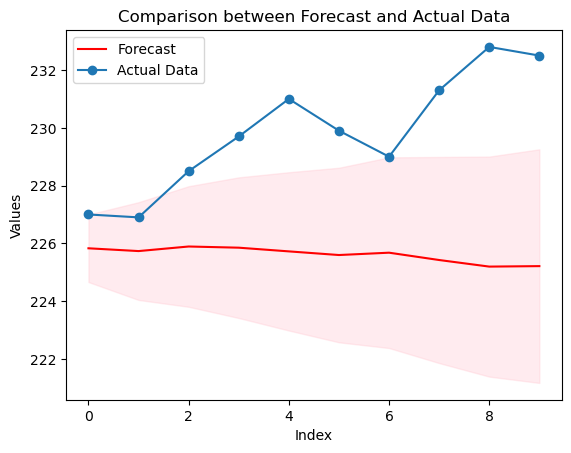

Root Mean Squared Error (RMSE): 4.766827733192989


In [681]:
arima_forecast('THYAO', 30, 1, 1)

                           price
timestamp                       
2023-09-20 09:00:00+03:00  29.06
2023-09-20 10:00:00+03:00  29.60
2023-09-20 11:00:00+03:00  29.84
2023-09-20 12:00:00+03:00  29.86
2023-09-20 13:00:00+03:00  29.94
2023-09-20 14:00:00+03:00  29.94
2023-09-20 15:00:00+03:00  30.00
2023-09-20 16:00:00+03:00  29.86
2023-09-20 17:00:00+03:00  29.56
2023-09-20 18:00:00+03:00  29.60
2023-09-21 09:00:00+03:00  29.94
2023-09-21 10:00:00+03:00  30.52
2023-09-21 11:00:00+03:00  30.50
2023-09-21 12:00:00+03:00  30.44
2023-09-21 13:00:00+03:00  30.68
2023-09-21 14:00:00+03:00  30.18
2023-09-21 15:00:00+03:00  30.16
2023-09-21 16:00:00+03:00  30.66
2023-09-21 17:00:00+03:00  31.24
2023-09-21 18:00:00+03:00  31.20
2023-09-22 09:00:00+03:00  31.20
2023-09-22 10:00:00+03:00  31.08
2023-09-22 11:00:00+03:00  31.26
2023-09-22 12:00:00+03:00  31.20
2023-09-22 13:00:00+03:00  31.44
2023-09-22 14:00:00+03:00  31.08
2023-09-22 15:00:00+03:00  30.90
2023-09-22 16:00:00+03:00  31.14
2023-09-22

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                14227
Model:                ARIMA(30, 1, 1)   Log Likelihood               12257.874
Date:                Sun, 24 Dec 2023   AIC                         -24451.748
Time:                        18:25:47   BIC                         -24209.738
Sample:                             0   HQIC                        -24371.243
                              - 14227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0046      0.290      0.016      0.987      -0.564       0.573
ar.L2          0.0226      0.005      4.747      0.000       0.013       0.032
ar.L3          0.0322      0.007      4.452      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


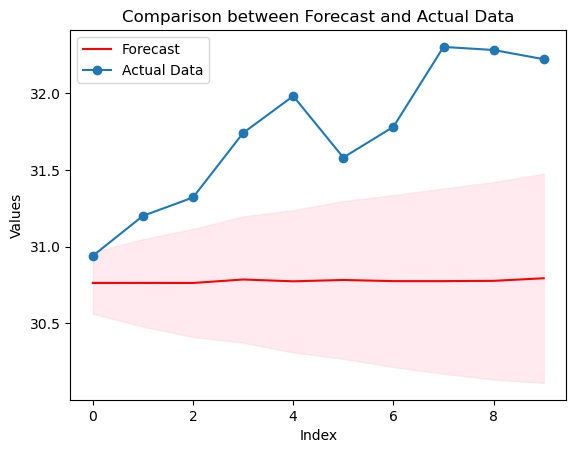

Root Mean Squared Error (RMSE): 1.0563051480457972


In [682]:
arima_forecast('AKBNK', 30, 1, 1)

                              price
timestamp                          
2023-09-20 09:00:00+03:00  154.5277
2023-09-20 10:00:00+03:00  155.6090
2023-09-20 11:00:00+03:00  154.9209
2023-09-20 12:00:00+03:00  154.4294
2023-09-20 13:00:00+03:00  153.9379
2023-09-20 14:00:00+03:00  153.5447
2023-09-20 15:00:00+03:00  152.3651
2023-09-20 16:00:00+03:00  152.0702
2023-09-20 17:00:00+03:00  151.4804
2023-09-20 18:00:00+03:00  151.4804
2023-09-21 09:00:00+03:00  151.4804
2023-09-21 10:00:00+03:00  149.0229
2023-09-21 11:00:00+03:00  149.4161
2023-09-21 12:00:00+03:00  148.9246
2023-09-21 13:00:00+03:00  150.0059
2023-09-21 14:00:00+03:00  153.9379
2023-09-21 15:00:00+03:00  153.0532
2023-09-21 16:00:00+03:00  153.7413
2023-09-21 17:00:00+03:00  155.5107
2023-09-21 18:00:00+03:00  155.6090
2023-09-22 09:00:00+03:00  155.7073
2023-09-22 10:00:00+03:00  154.8226
2023-09-22 11:00:00+03:00  155.3141
2023-09-22 12:00:00+03:00  155.3141
2023-09-22 13:00:00+03:00  155.9039
2023-09-22 14:00:00+03:00  1

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                14227
Model:                ARIMA(30, 1, 1)   Log Likelihood              -11274.773
Date:                Sun, 24 Dec 2023   AIC                          22613.545
Time:                        18:26:10   BIC                          22855.556
Sample:                             0   HQIC                         22694.050
                              - 14227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0029      0.184      0.016      0.987      -0.357       0.363
ar.L2         -0.0109      0.004     -2.787      0.005      -0.019      -0.003
ar.L3          0.0202      0.004      5.354      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


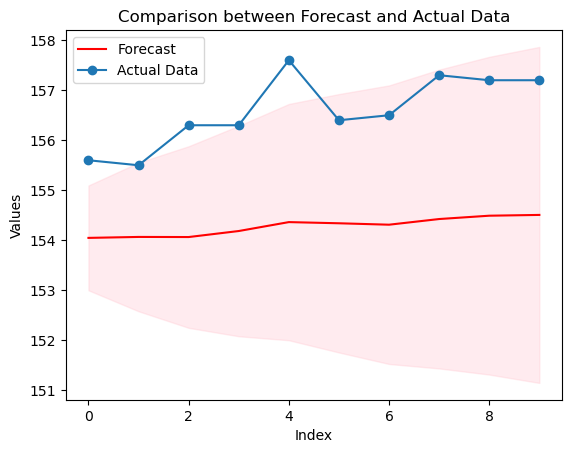

Root Mean Squared Error (RMSE): 2.3726371950192835


In [683]:
arima_forecast('ARCLK', 30, 1, 1)

                           price
timestamp                       
2023-09-20 09:00:00+03:00  39.60
2023-09-20 10:00:00+03:00  39.84
2023-09-20 11:00:00+03:00  39.34
2023-09-20 12:00:00+03:00  39.44
2023-09-20 13:00:00+03:00  39.32
2023-09-20 14:00:00+03:00  39.16
2023-09-20 15:00:00+03:00  38.96
2023-09-20 16:00:00+03:00  38.54
2023-09-20 17:00:00+03:00  38.08
2023-09-20 18:00:00+03:00  38.00
2023-09-21 09:00:00+03:00  37.86
2023-09-21 10:00:00+03:00  37.64
2023-09-21 11:00:00+03:00  37.70
2023-09-21 12:00:00+03:00  37.90
2023-09-21 13:00:00+03:00  37.98
2023-09-21 14:00:00+03:00  39.02
2023-09-21 15:00:00+03:00  38.98
2023-09-21 16:00:00+03:00  39.24
2023-09-21 17:00:00+03:00  39.68
2023-09-21 18:00:00+03:00  39.86
2023-09-22 09:00:00+03:00  39.86
2023-09-22 10:00:00+03:00  40.94
2023-09-22 11:00:00+03:00  40.78
2023-09-22 12:00:00+03:00  40.66
2023-09-22 13:00:00+03:00  40.52
2023-09-22 14:00:00+03:00  40.30
2023-09-22 15:00:00+03:00  40.16
2023-09-22 16:00:00+03:00  40.24
2023-09-22

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                14117
Model:                ARIMA(30, 1, 1)   Log Likelihood                7903.400
Date:                Sun, 24 Dec 2023   AIC                         -15742.800
Time:                        18:26:40   BIC                         -15501.038
Sample:                             0   HQIC                        -15662.347
                              - 14117                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0078      2.065      0.004      0.997      -4.040       4.055
ar.L2          0.0058      0.032      0.181      0.856      -0.057       0.068
ar.L3          0.0110      0.012      0.908      0.3

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


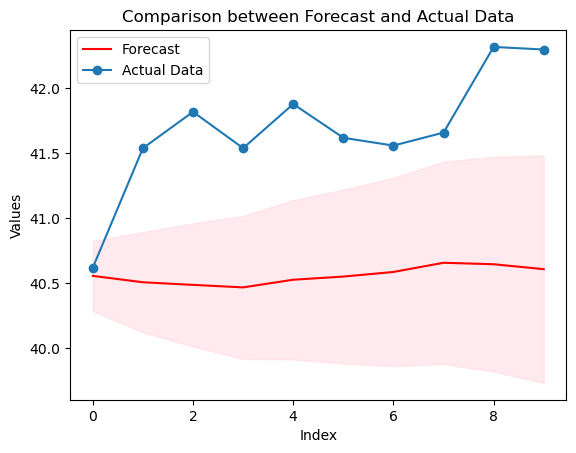

Root Mean Squared Error (RMSE): 1.2079867998018134


In [684]:
arima_forecast('ASELS', 30, 1, 1)

                           price
timestamp                       
2023-09-20 09:00:00+03:00  276.2
2023-09-20 10:00:00+03:00  275.6
2023-09-20 11:00:00+03:00  274.5
2023-09-20 12:00:00+03:00  272.0
2023-09-20 13:00:00+03:00  272.8
2023-09-20 14:00:00+03:00  271.8
2023-09-20 15:00:00+03:00  270.7
2023-09-20 16:00:00+03:00  270.8
2023-09-20 17:00:00+03:00  270.4
2023-09-20 18:00:00+03:00  270.0
2023-09-21 09:00:00+03:00  270.0
2023-09-21 10:00:00+03:00  270.4
2023-09-21 11:00:00+03:00  270.3
2023-09-21 12:00:00+03:00  270.2
2023-09-21 13:00:00+03:00  270.6
2023-09-21 14:00:00+03:00  276.0
2023-09-21 15:00:00+03:00  273.8
2023-09-21 16:00:00+03:00  274.3
2023-09-21 17:00:00+03:00  276.0
2023-09-21 18:00:00+03:00  275.7
2023-09-22 09:00:00+03:00  278.0
2023-09-22 10:00:00+03:00  274.1
2023-09-22 11:00:00+03:00  274.3
2023-09-22 12:00:00+03:00  276.2
2023-09-22 13:00:00+03:00  275.4
2023-09-22 14:00:00+03:00  274.0
2023-09-22 15:00:00+03:00  273.0
2023-09-22 16:00:00+03:00  272.4
2023-09-22

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                14227
Model:                ARIMA(30, 1, 1)   Log Likelihood              -15556.978
Date:                Sun, 24 Dec 2023   AIC                          31177.957
Time:                        01:21:55   BIC                          31419.967
Sample:                             0   HQIC                         31258.461
                              - 14227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3678      0.258      1.425      0.154      -0.138       0.874
ar.L2          0.0170      0.014      1.256      0.209      -0.010       0.044
ar.L3          0.0003      0.004      0.083      0.9

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


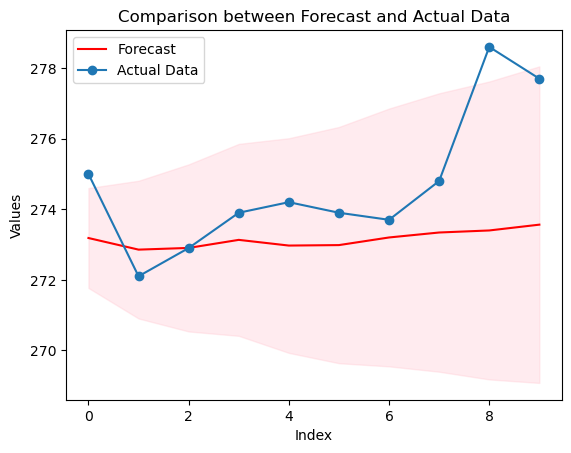

Root Mean Squared Error (RMSE): 2.3101290285547753


In [548]:
arima_forecast('BIMAS', 30, 1, 1)

                           price
timestamp                       
2023-09-20 09:00:00+03:00  13.19
2023-09-20 10:00:00+03:00  13.15
2023-09-20 11:00:00+03:00  13.04
2023-09-20 12:00:00+03:00  13.00
2023-09-20 13:00:00+03:00  12.94
2023-09-20 14:00:00+03:00  13.02
2023-09-20 15:00:00+03:00  13.00
2023-09-20 16:00:00+03:00  12.92
2023-09-20 17:00:00+03:00  12.87
2023-09-20 18:00:00+03:00  12.86
2023-09-21 09:00:00+03:00  12.84
2023-09-21 10:00:00+03:00  12.86
2023-09-21 11:00:00+03:00  12.94
2023-09-21 12:00:00+03:00  12.89
2023-09-21 13:00:00+03:00  12.87
2023-09-21 14:00:00+03:00  13.03
2023-09-21 15:00:00+03:00  13.00
2023-09-21 16:00:00+03:00  13.09
2023-09-21 17:00:00+03:00  13.28
2023-09-21 18:00:00+03:00  13.28
2023-09-22 09:00:00+03:00  13.28
2023-09-22 10:00:00+03:00  13.25
2023-09-22 11:00:00+03:00  13.32
2023-09-22 12:00:00+03:00  13.33
2023-09-22 13:00:00+03:00  13.32
2023-09-22 14:00:00+03:00  13.05
2023-09-22 15:00:00+03:00  13.06
2023-09-22 16:00:00+03:00  13.07
2023-09-22

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                14227
Model:                ARIMA(30, 1, 1)   Log Likelihood               23923.644
Date:                Sun, 24 Dec 2023   AIC                         -47783.288
Time:                        01:27:34   BIC                         -47541.278
Sample:                             0   HQIC                        -47702.784
                              - 14227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0088      0.550      0.016      0.987      -1.068       1.086
ar.L2          0.0261      0.010      2.685      0.007       0.007       0.045
ar.L3          0.0329      0.014      2.294      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


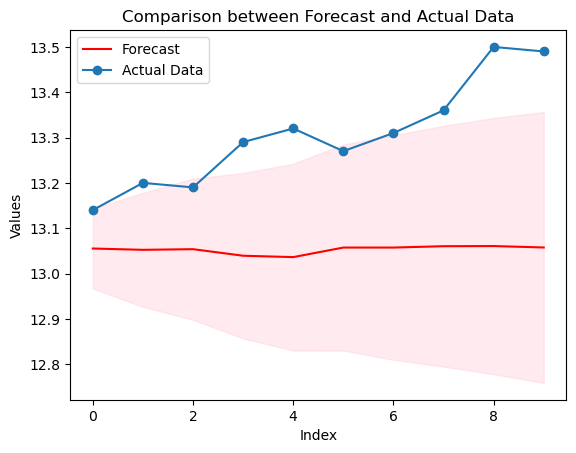

Root Mean Squared Error (RMSE): 0.2775334440525403


In [553]:
arima_forecast('DOHOL', 30, 1, 1)

                           price
timestamp                       
2023-09-20 09:00:00+03:00   7.92
2023-09-20 10:00:00+03:00   8.00
2023-09-20 11:00:00+03:00   7.97
2023-09-20 12:00:00+03:00   7.95
2023-09-20 13:00:00+03:00   7.97
2023-09-20 14:00:00+03:00   8.01
2023-09-20 15:00:00+03:00   7.99
2023-09-20 16:00:00+03:00   7.94
2023-09-20 17:00:00+03:00   7.85
2023-09-20 18:00:00+03:00   7.80
2023-09-21 09:00:00+03:00   7.75
2023-09-21 10:00:00+03:00   7.82
2023-09-21 11:00:00+03:00   7.83
2023-09-21 12:00:00+03:00   7.78
2023-09-21 13:00:00+03:00   7.80
2023-09-21 14:00:00+03:00   7.92
2023-09-21 15:00:00+03:00   7.88
2023-09-21 16:00:00+03:00   7.91
2023-09-21 17:00:00+03:00   8.01
2023-09-21 18:00:00+03:00   8.03
2023-09-22 09:00:00+03:00   8.03
2023-09-22 10:00:00+03:00   8.02
2023-09-22 11:00:00+03:00   8.05
2023-09-22 12:00:00+03:00   8.03
2023-09-22 13:00:00+03:00   7.98
2023-09-22 14:00:00+03:00   7.91
2023-09-22 15:00:00+03:00   7.89
2023-09-22 16:00:00+03:00   7.89
2023-09-22

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                14227
Model:                ARIMA(30, 1, 1)   Log Likelihood               27355.560
Date:                Sun, 24 Dec 2023   AIC                         -54647.121
Time:                        01:29:04   BIC                         -54405.110
Sample:                             0   HQIC                        -54566.616
                              - 14227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0188      0.559      0.034      0.973      -1.076       1.114
ar.L2          0.0107      0.021      0.505      0.614      -0.031       0.052
ar.L3         -0.0026      0.007     -0.364      0.7

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


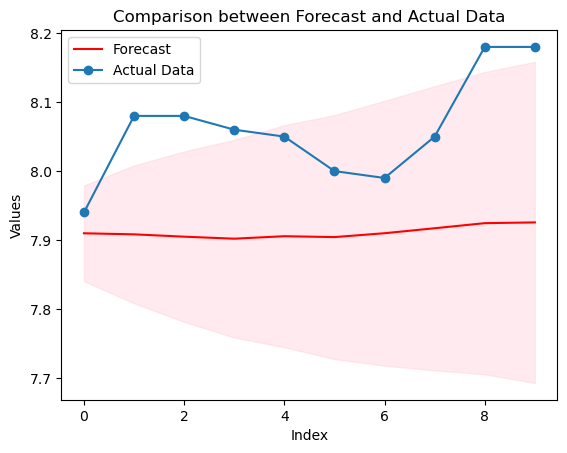

Root Mean Squared Error (RMSE): 0.16432282382328908


In [554]:
arima_forecast('EKGYO', 30, 1, 1)

                           price
timestamp                       
2023-09-20 09:00:00+03:00  42.34
2023-09-20 10:00:00+03:00  42.32
2023-09-20 11:00:00+03:00  42.00
2023-09-20 12:00:00+03:00  41.98
2023-09-20 13:00:00+03:00  41.94
2023-09-20 14:00:00+03:00  41.90
2023-09-20 15:00:00+03:00  41.80
2023-09-20 16:00:00+03:00  41.44
2023-09-20 17:00:00+03:00  41.08
2023-09-20 18:00:00+03:00  41.00
2023-09-21 09:00:00+03:00  40.78
2023-09-21 10:00:00+03:00  40.48
2023-09-21 11:00:00+03:00  40.48
2023-09-21 12:00:00+03:00  40.38
2023-09-21 13:00:00+03:00  40.42
2023-09-21 14:00:00+03:00  41.26
2023-09-21 15:00:00+03:00  41.10
2023-09-21 16:00:00+03:00  41.28
2023-09-21 17:00:00+03:00  41.72
2023-09-21 18:00:00+03:00  41.74
2023-09-22 09:00:00+03:00  41.84
2023-09-22 10:00:00+03:00  42.08
2023-09-22 11:00:00+03:00  42.18
2023-09-22 12:00:00+03:00  42.32
2023-09-22 13:00:00+03:00  42.14
2023-09-22 14:00:00+03:00  42.84
2023-09-22 15:00:00+03:00  43.06
2023-09-22 16:00:00+03:00  43.22
2023-09-22

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                14227
Model:                ARIMA(30, 1, 1)   Log Likelihood                4151.688
Date:                Sun, 24 Dec 2023   AIC                          -8239.376
Time:                        01:31:40   BIC                          -7997.365
Sample:                             0   HQIC                         -8158.871
                              - 14227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5443      0.174      3.125      0.002       0.203       0.886
ar.L2         -0.0439      0.008     -5.169      0.000      -0.061      -0.027
ar.L3          0.0733      0.005     13.326      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


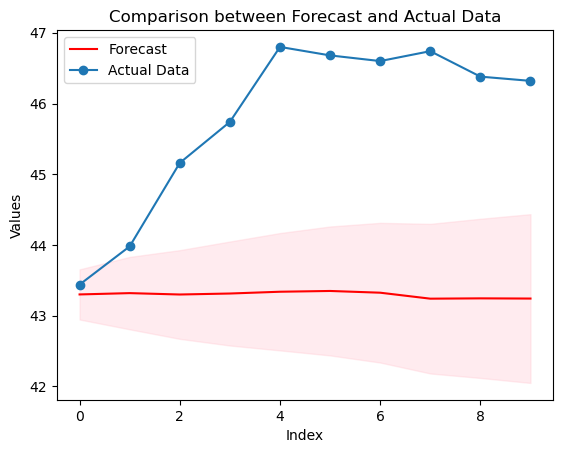

Root Mean Squared Error (RMSE): 2.7410005144731233


In [555]:
arima_forecast('EREGL', 30, 1, 1)

                              price
timestamp                          
2023-09-20 09:00:00+03:00  814.0292
2023-09-20 10:00:00+03:00  824.0647
2023-09-20 11:00:00+03:00  811.2309
2023-09-20 12:00:00+03:00  806.5992
2023-09-20 13:00:00+03:00  806.9851
2023-09-20 14:00:00+03:00  805.2482
2023-09-20 15:00:00+03:00  800.3270
2023-09-20 16:00:00+03:00  796.2742
2023-09-20 17:00:00+03:00  796.8532
2023-09-20 18:00:00+03:00  797.2392
2023-09-21 09:00:00+03:00  797.1427
2023-09-21 10:00:00+03:00  789.1336
2023-09-21 11:00:00+03:00  790.9670
2023-09-21 12:00:00+03:00  790.9670
2023-09-21 13:00:00+03:00  795.5988
2023-09-21 14:00:00+03:00  807.5641
2023-09-21 15:00:00+03:00  803.8973
2023-09-21 16:00:00+03:00  806.9851
2023-09-21 17:00:00+03:00  819.5294
2023-09-21 18:00:00+03:00  819.7224
2023-09-22 09:00:00+03:00  819.7224
2023-09-22 10:00:00+03:00  815.4767
2023-09-22 11:00:00+03:00  816.7311
2023-09-22 12:00:00+03:00  818.6610
2023-09-22 13:00:00+03:00  815.0907
2023-09-22 14:00:00+03:00  8

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                14226
Model:                ARIMA(30, 1, 1)   Log Likelihood              -32308.628
Date:                Sun, 24 Dec 2023   AIC                          64681.257
Time:                        01:33:31   BIC                          64923.265
Sample:                             0   HQIC                         64761.761
                              - 14226                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4709      0.156      3.027      0.002       0.166       0.776
ar.L2         -0.0015      0.006     -0.257      0.797      -0.013       0.010
ar.L3          0.0100      0.005      2.074      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


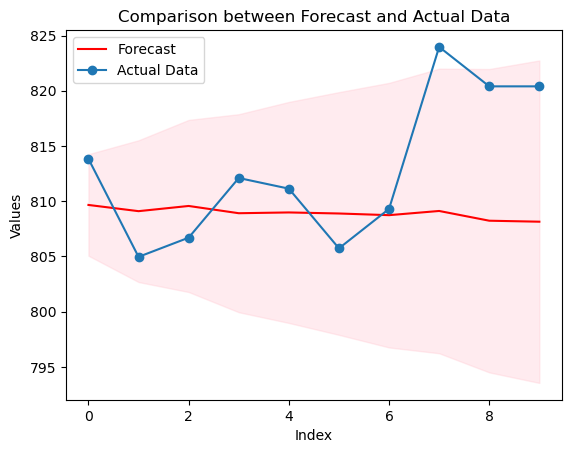

Root Mean Squared Error (RMSE): 7.6597877426069605


In [556]:
arima_forecast('FROTO', 30, 1, 1)

                           price
timestamp                       
2023-09-20 09:00:00+03:00  342.5
2023-09-20 10:00:00+03:00  342.9
2023-09-20 11:00:00+03:00  340.3
2023-09-20 12:00:00+03:00  339.5
2023-09-20 13:00:00+03:00  337.7
2023-09-20 14:00:00+03:00  337.5
2023-09-20 15:00:00+03:00  333.9
2023-09-20 16:00:00+03:00  329.5
2023-09-20 17:00:00+03:00  330.0
2023-09-20 18:00:00+03:00  328.5
2023-09-21 09:00:00+03:00  328.0
2023-09-21 10:00:00+03:00  328.6
2023-09-21 11:00:00+03:00  331.6
2023-09-21 12:00:00+03:00  329.6
2023-09-21 13:00:00+03:00  328.8
2023-09-21 14:00:00+03:00  332.8
2023-09-21 15:00:00+03:00  335.4
2023-09-21 16:00:00+03:00  337.7
2023-09-21 17:00:00+03:00  340.6
2023-09-21 18:00:00+03:00  340.5
2023-09-22 09:00:00+03:00  341.5
2023-09-22 10:00:00+03:00  339.6
2023-09-22 11:00:00+03:00  340.6
2023-09-22 12:00:00+03:00  338.7
2023-09-22 13:00:00+03:00  339.7
2023-09-22 14:00:00+03:00  337.2
2023-09-22 15:00:00+03:00  337.9
2023-09-22 16:00:00+03:00  337.4
2023-09-22

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                14218
Model:                ARIMA(30, 1, 1)   Log Likelihood              -23328.547
Date:                Sun, 24 Dec 2023   AIC                          46721.095
Time:                        18:27:26   BIC                          46963.085
Sample:                             0   HQIC                         46801.595
                              - 14218                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1915      0.087     -2.201      0.028      -0.362      -0.021
ar.L2         -0.0269      0.004     -6.076      0.000      -0.036      -0.018
ar.L3          0.0123      0.005      2.585      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


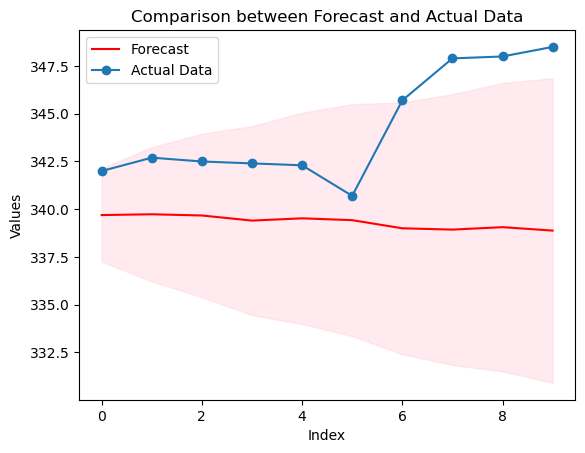

Root Mean Squared Error (RMSE): 5.8149838303841515


In [685]:
arima_forecast('GUBRF', 30, 1, 1)

                           price
timestamp                       
2023-09-20 09:00:00+03:00  50.05
2023-09-20 10:00:00+03:00  51.15
2023-09-20 11:00:00+03:00  52.25
2023-09-20 12:00:00+03:00  52.00
2023-09-20 13:00:00+03:00  52.25
2023-09-20 14:00:00+03:00  52.25
2023-09-20 15:00:00+03:00  52.45
2023-09-20 16:00:00+03:00  52.45
2023-09-20 17:00:00+03:00  51.35
2023-09-20 18:00:00+03:00  51.50
2023-09-21 09:00:00+03:00  51.50
2023-09-21 10:00:00+03:00  52.25
2023-09-21 11:00:00+03:00  52.45
2023-09-21 12:00:00+03:00  52.40
2023-09-21 13:00:00+03:00  52.90
2023-09-21 14:00:00+03:00  51.20
2023-09-21 15:00:00+03:00  51.15
2023-09-21 16:00:00+03:00  51.90
2023-09-21 17:00:00+03:00  51.85
2023-09-21 18:00:00+03:00  52.00
2023-09-22 09:00:00+03:00  52.00
2023-09-22 10:00:00+03:00  51.60
2023-09-22 11:00:00+03:00  51.75
2023-09-22 12:00:00+03:00  51.75
2023-09-22 13:00:00+03:00  52.05
2023-09-22 14:00:00+03:00  51.30
2023-09-22 15:00:00+03:00  51.25
2023-09-22 16:00:00+03:00  51.45
2023-09-22

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                14227
Model:                ARIMA(30, 1, 1)   Log Likelihood                4789.822
Date:                Sun, 24 Dec 2023   AIC                          -9515.644
Time:                        01:34:19   BIC                          -9273.633
Sample:                             0   HQIC                         -9435.139
                              - 14227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0050      5.320     -0.001      0.999     -10.432      10.422
ar.L2          0.0155      0.055      0.279      0.780      -0.093       0.124
ar.L3          0.0290      0.082      0.354      0.7

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


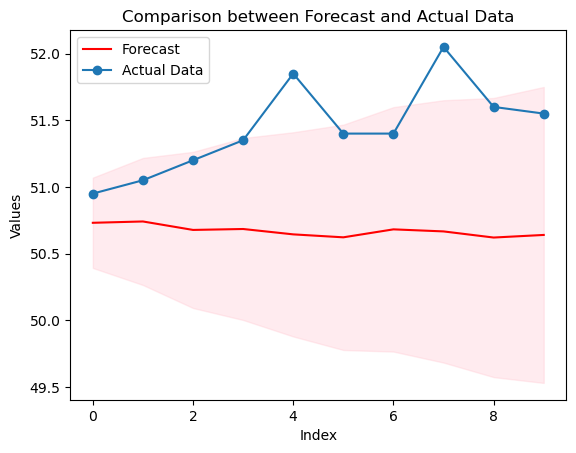

Root Mean Squared Error (RMSE): 0.8448343909255085


In [557]:
arima_forecast('GARAN', 30, 1, 1)

                           price
timestamp                       
2023-09-20 09:00:00+03:00  26.00
2023-09-20 10:00:00+03:00  26.12
2023-09-20 11:00:00+03:00  25.82
2023-09-20 12:00:00+03:00  26.06
2023-09-20 13:00:00+03:00  26.02
2023-09-20 14:00:00+03:00  26.20
2023-09-20 15:00:00+03:00  26.12
2023-09-20 16:00:00+03:00  25.68
2023-09-20 17:00:00+03:00  25.58
2023-09-20 18:00:00+03:00  25.60
2023-09-21 09:00:00+03:00  25.50
2023-09-21 10:00:00+03:00  25.36
2023-09-21 11:00:00+03:00  25.46
2023-09-21 12:00:00+03:00  25.34
2023-09-21 13:00:00+03:00  25.58
2023-09-21 14:00:00+03:00  26.06
2023-09-21 15:00:00+03:00  25.96
2023-09-21 16:00:00+03:00  26.22
2023-09-21 17:00:00+03:00  26.44
2023-09-21 18:00:00+03:00  26.46
2023-09-22 09:00:00+03:00  26.40
2023-09-22 10:00:00+03:00  26.60
2023-09-22 11:00:00+03:00  26.78
2023-09-22 12:00:00+03:00  26.54
2023-09-22 13:00:00+03:00  26.50
2023-09-22 14:00:00+03:00  27.32
2023-09-22 15:00:00+03:00  27.40
2023-09-22 16:00:00+03:00  27.56
2023-09-22

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                14227
Model:                ARIMA(30, 1, 1)   Log Likelihood               11905.061
Date:                Sun, 24 Dec 2023   AIC                         -23746.122
Time:                        01:36:15   BIC                         -23504.111
Sample:                             0   HQIC                        -23665.617
                              - 14227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4050      0.200      2.024      0.043       0.013       0.797
ar.L2         -0.0285      0.011     -2.540      0.011      -0.050      -0.007
ar.L3          0.0454      0.005      9.350      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


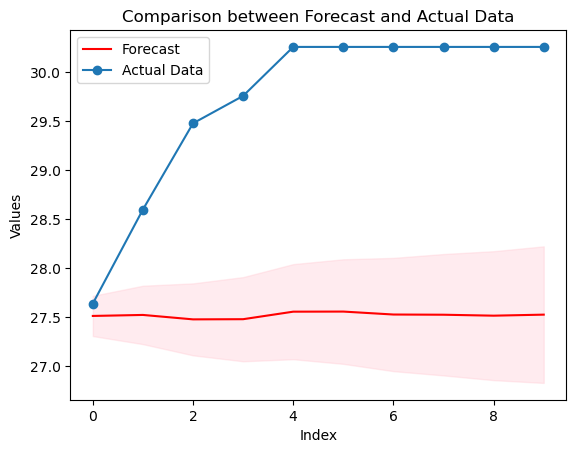

Root Mean Squared Error (RMSE): 2.343517765674792


In [558]:
arima_forecast('KRDMD', 30, 1, 1)

                           price
timestamp                       
2023-09-20 09:00:00+03:00  134.8
2023-09-20 10:00:00+03:00  136.9
2023-09-20 11:00:00+03:00  136.4
2023-09-20 12:00:00+03:00  136.4
2023-09-20 13:00:00+03:00  136.8
2023-09-20 14:00:00+03:00  136.5
2023-09-20 15:00:00+03:00  136.0
2023-09-20 16:00:00+03:00  135.9
2023-09-20 17:00:00+03:00  134.2
2023-09-20 18:00:00+03:00  134.6
2023-09-21 09:00:00+03:00  134.1
2023-09-21 10:00:00+03:00  133.7
2023-09-21 11:00:00+03:00  133.7
2023-09-21 12:00:00+03:00  133.7
2023-09-21 13:00:00+03:00  134.5
2023-09-21 14:00:00+03:00  136.9
2023-09-21 15:00:00+03:00  137.0
2023-09-21 16:00:00+03:00  136.9
2023-09-21 17:00:00+03:00  138.7
2023-09-21 18:00:00+03:00  138.8
2023-09-22 09:00:00+03:00  139.3
2023-09-22 10:00:00+03:00  140.6
2023-09-22 11:00:00+03:00  139.3
2023-09-22 12:00:00+03:00  140.0
2023-09-22 13:00:00+03:00  139.8
2023-09-22 14:00:00+03:00  138.8
2023-09-22 15:00:00+03:00  138.9
2023-09-22 16:00:00+03:00  139.0
2023-09-22

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                14227
Model:                ARIMA(30, 1, 1)   Log Likelihood               -6813.630
Date:                Sun, 24 Dec 2023   AIC                          13691.261
Time:                        16:27:47   BIC                          13933.271
Sample:                             0   HQIC                         13771.765
                              - 14227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8445      0.043    -19.504      0.000      -0.929      -0.760
ar.L2         -0.0314      0.006     -5.666      0.000      -0.042      -0.021
ar.L3          0.0318      0.005      6.110      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


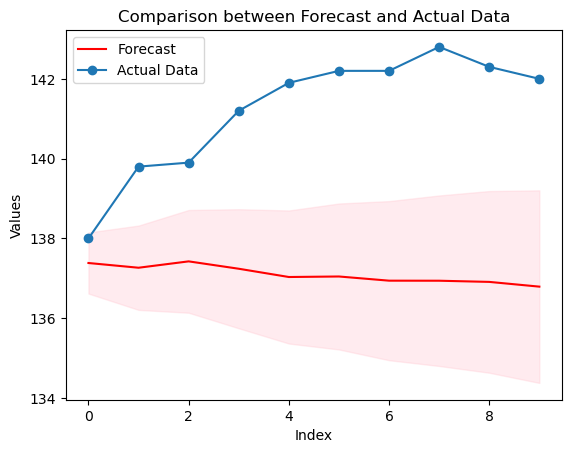

Root Mean Squared Error (RMSE): 4.438417034228074


In [639]:
arima_forecast('KCHOL', 30, 1, 1)

                           price
timestamp                       
2023-09-20 09:00:00+03:00  28.14
2023-09-20 10:00:00+03:00  28.70
2023-09-20 11:00:00+03:00  28.28
2023-09-20 12:00:00+03:00  28.50
2023-09-20 13:00:00+03:00  28.32
2023-09-20 14:00:00+03:00  28.18
2023-09-20 15:00:00+03:00  27.90
2023-09-20 16:00:00+03:00  27.86
2023-09-20 17:00:00+03:00  27.26
2023-09-20 18:00:00+03:00  27.34
2023-09-21 09:00:00+03:00  27.30
2023-09-21 10:00:00+03:00  26.96
2023-09-21 11:00:00+03:00  27.20
2023-09-21 12:00:00+03:00  27.04
2023-09-21 13:00:00+03:00  27.20
2023-09-21 14:00:00+03:00  27.82
2023-09-21 15:00:00+03:00  27.72
2023-09-21 16:00:00+03:00  28.00
2023-09-21 17:00:00+03:00  28.46
2023-09-21 18:00:00+03:00  28.60
2023-09-22 09:00:00+03:00  28.78
2023-09-22 10:00:00+03:00  28.46
2023-09-22 11:00:00+03:00  28.44
2023-09-22 12:00:00+03:00  28.30
2023-09-22 13:00:00+03:00  28.26
2023-09-22 14:00:00+03:00  28.12
2023-09-22 15:00:00+03:00  28.04
2023-09-22 16:00:00+03:00  28.04
2023-09-22

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                14227
Model:                ARIMA(30, 1, 1)   Log Likelihood                9132.750
Date:                Sun, 24 Dec 2023   AIC                         -18201.499
Time:                        01:40:06   BIC                         -17959.489
Sample:                             0   HQIC                        -18120.995
                              - 14227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2621      0.125     -2.094      0.036      -0.508      -0.017
ar.L2         -0.0311      0.005     -6.617      0.000      -0.040      -0.022
ar.L3         -0.0376      0.006     -6.485      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


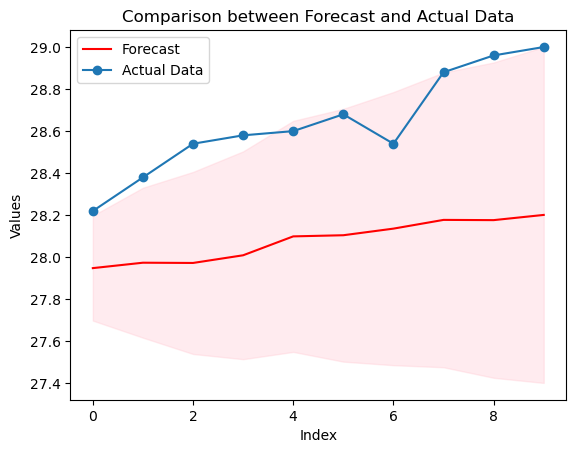

Root Mean Squared Error (RMSE): 0.5808936652885004


In [560]:
arima_forecast('KOZAL', 30, 1, 1)

                           price
timestamp                       
2023-09-20 09:00:00+03:00  63.60
2023-09-20 10:00:00+03:00  65.40
2023-09-20 11:00:00+03:00  64.65
2023-09-20 12:00:00+03:00  66.45
2023-09-20 13:00:00+03:00  65.90
2023-09-20 14:00:00+03:00  65.65
2023-09-20 15:00:00+03:00  64.25
2023-09-20 16:00:00+03:00  64.30
2023-09-20 17:00:00+03:00  64.30
2023-09-20 18:00:00+03:00  64.10
2023-09-21 09:00:00+03:00  63.95
2023-09-21 10:00:00+03:00  63.25
2023-09-21 11:00:00+03:00  63.90
2023-09-21 12:00:00+03:00  63.65
2023-09-21 13:00:00+03:00  63.55
2023-09-21 14:00:00+03:00  65.25
2023-09-21 15:00:00+03:00  65.05
2023-09-21 16:00:00+03:00  65.85
2023-09-21 17:00:00+03:00  66.75
2023-09-21 18:00:00+03:00  66.65
2023-09-22 09:00:00+03:00  65.80
2023-09-22 10:00:00+03:00  65.90
2023-09-22 11:00:00+03:00  66.00
2023-09-22 12:00:00+03:00  65.40
2023-09-22 13:00:00+03:00  65.20
2023-09-22 14:00:00+03:00  64.60
2023-09-22 15:00:00+03:00  64.60
2023-09-22 16:00:00+03:00  64.45
2023-09-22

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                14227
Model:                ARIMA(30, 1, 1)   Log Likelihood               -2559.492
Date:                Sun, 24 Dec 2023   AIC                           5182.985
Time:                        01:40:35   BIC                           5424.995
Sample:                             0   HQIC                          5263.489
                              - 14227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0016      0.398      0.004      0.997      -0.778       0.781
ar.L2          0.0048      0.005      1.039      0.299      -0.004       0.014
ar.L3         -0.0289      0.004     -7.836      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


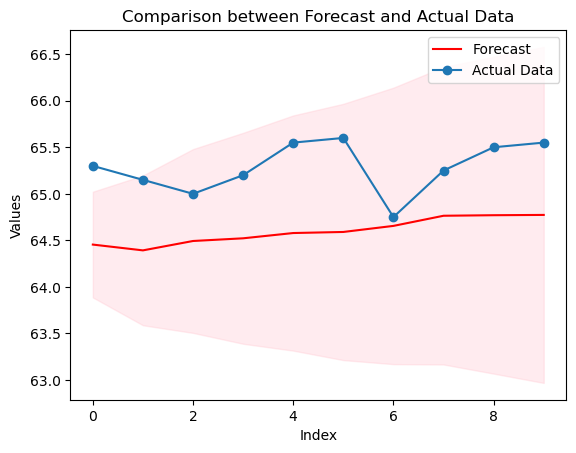

Root Mean Squared Error (RMSE): 0.7313392743337747


In [561]:
arima_forecast('KOZAA', 30, 1, 1)

                           price
timestamp                       
2023-09-20 09:00:00+03:00  780.0
2023-09-20 10:00:00+03:00  778.3
2023-09-20 11:00:00+03:00  773.8
2023-09-20 12:00:00+03:00  774.6
2023-09-20 13:00:00+03:00  772.6
2023-09-20 14:00:00+03:00  773.9
2023-09-20 15:00:00+03:00  769.5
2023-09-20 16:00:00+03:00  760.7
2023-09-20 17:00:00+03:00  758.7
2023-09-20 18:00:00+03:00  755.0
2023-09-21 09:00:00+03:00  754.0
2023-09-21 10:00:00+03:00  742.9
2023-09-21 11:00:00+03:00  744.3
2023-09-21 12:00:00+03:00  742.4
2023-09-21 13:00:00+03:00  746.4
2023-09-21 14:00:00+03:00  764.3
2023-09-21 15:00:00+03:00  756.8
2023-09-21 16:00:00+03:00  763.7
2023-09-21 17:00:00+03:00  774.1
2023-09-21 18:00:00+03:00  772.8
2023-09-22 09:00:00+03:00  779.8
2023-09-22 10:00:00+03:00  769.5
2023-09-22 11:00:00+03:00  774.7
2023-09-22 12:00:00+03:00  773.2
2023-09-22 13:00:00+03:00  770.6
2023-09-22 14:00:00+03:00  762.5
2023-09-22 15:00:00+03:00  761.6
2023-09-22 16:00:00+03:00  761.4
2023-09-22

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                14222
Model:                ARIMA(30, 1, 1)   Log Likelihood              -32701.645
Date:                Sun, 24 Dec 2023   AIC                          65467.290
Time:                        01:53:59   BIC                          65709.289
Sample:                             0   HQIC                         65547.792
                              - 14222                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4456      0.093      4.789      0.000       0.263       0.628
ar.L2          0.0023      0.006      0.399      0.690      -0.009       0.014
ar.L3          0.0205      0.004      5.066      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


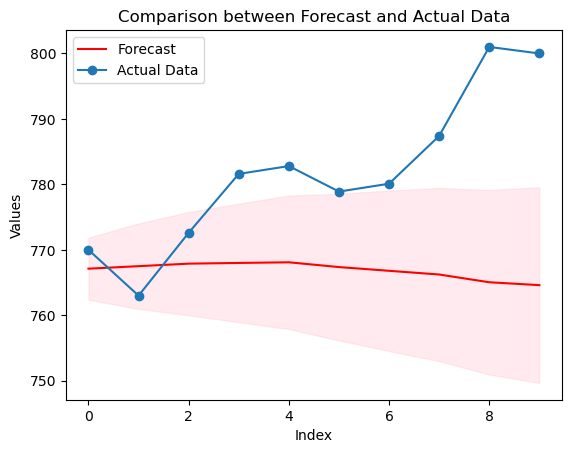

Root Mean Squared Error (RMSE): 19.37967373109998


In [569]:
arima_forecast('PGSUS', 30, 1, 1)

                           price
timestamp                       
2023-09-20 09:00:00+03:00  18.74
2023-09-20 10:00:00+03:00  18.87
2023-09-20 11:00:00+03:00  18.68
2023-09-20 12:00:00+03:00  18.68
2023-09-20 13:00:00+03:00  18.70
2023-09-20 14:00:00+03:00  18.67
2023-09-20 15:00:00+03:00  19.35
2023-09-20 16:00:00+03:00  19.25
2023-09-20 17:00:00+03:00  19.03
2023-09-20 18:00:00+03:00  18.92
2023-09-21 09:00:00+03:00  18.90
2023-09-21 10:00:00+03:00  18.62
2023-09-21 11:00:00+03:00  18.70
2023-09-21 12:00:00+03:00  18.65
2023-09-21 13:00:00+03:00  18.74
2023-09-21 14:00:00+03:00  19.18
2023-09-21 15:00:00+03:00  19.14
2023-09-21 16:00:00+03:00  19.43
2023-09-21 17:00:00+03:00  19.69
2023-09-21 18:00:00+03:00  19.69
2023-09-22 09:00:00+03:00  19.70
2023-09-22 10:00:00+03:00  20.08
2023-09-22 11:00:00+03:00  20.16
2023-09-22 12:00:00+03:00  20.04
2023-09-22 13:00:00+03:00  19.91
2023-09-22 14:00:00+03:00  19.75
2023-09-22 15:00:00+03:00  19.77
2023-09-22 16:00:00+03:00  19.80
2023-09-22

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                14227
Model:                ARIMA(30, 1, 1)   Log Likelihood               16627.960
Date:                Sun, 24 Dec 2023   AIC                         -33191.921
Time:                        01:56:15   BIC                         -32949.910
Sample:                             0   HQIC                        -33111.416
                              - 14227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4649      0.172      2.696      0.007       0.127       0.803
ar.L2         -0.0425      0.012     -3.563      0.000      -0.066      -0.019
ar.L3          0.0339      0.005      6.543      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


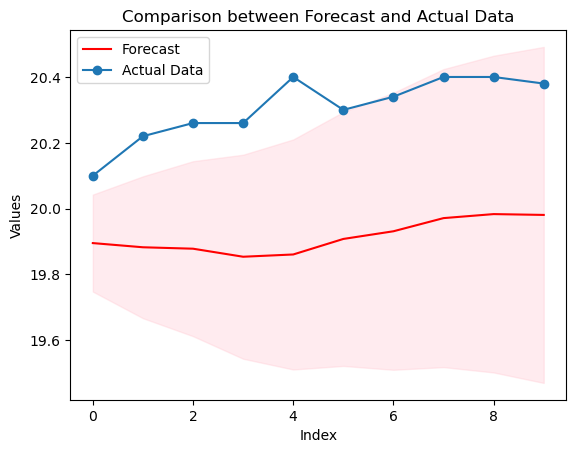

Root Mean Squared Error (RMSE): 0.3993884935461538


In [570]:
arima_forecast('PETKM', 30, 1, 1)

                           price
timestamp                       
2023-09-20 09:00:00+03:00  56.05
2023-09-20 10:00:00+03:00  56.70
2023-09-20 11:00:00+03:00  57.10
2023-09-20 12:00:00+03:00  57.05
2023-09-20 13:00:00+03:00  56.85
2023-09-20 14:00:00+03:00  56.80
2023-09-20 15:00:00+03:00  56.85
2023-09-20 16:00:00+03:00  56.75
2023-09-20 17:00:00+03:00  55.75
2023-09-20 18:00:00+03:00  55.55
2023-09-21 09:00:00+03:00  55.45
2023-09-21 10:00:00+03:00  56.15
2023-09-21 11:00:00+03:00  55.70
2023-09-21 12:00:00+03:00  55.60
2023-09-21 13:00:00+03:00  55.75
2023-09-21 14:00:00+03:00  56.45
2023-09-21 15:00:00+03:00  56.45
2023-09-21 16:00:00+03:00  56.60
2023-09-21 17:00:00+03:00  56.90
2023-09-21 18:00:00+03:00  56.95
2023-09-22 09:00:00+03:00  57.40
2023-09-22 10:00:00+03:00  57.05
2023-09-22 11:00:00+03:00  56.85
2023-09-22 12:00:00+03:00  56.95
2023-09-22 13:00:00+03:00  56.95
2023-09-22 14:00:00+03:00  56.50
2023-09-22 15:00:00+03:00  56.50
2023-09-22 16:00:00+03:00  56.70
2023-09-22

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                14226
Model:                ARIMA(30, 1, 1)   Log Likelihood                4906.693
Date:                Sun, 24 Dec 2023   AIC                          -9749.386
Time:                        01:56:47   BIC                          -9507.378
Sample:                             0   HQIC                         -9668.882
                              - 14226                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0155      0.934     -0.017      0.987      -1.846       1.815
ar.L2          0.0160      0.029      0.557      0.577      -0.040       0.072
ar.L3          0.0163      0.015      1.115      0.2

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


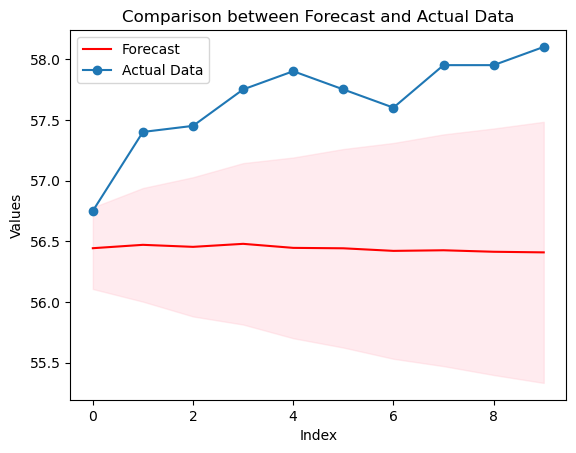

Root Mean Squared Error (RMSE): 1.2778824501907873


In [571]:
arima_forecast('SAHOL', 30, 1, 1)

                           price
timestamp                       
2023-09-20 09:00:00+03:00  46.72
2023-09-20 10:00:00+03:00  46.76
2023-09-20 11:00:00+03:00  46.48
2023-09-20 12:00:00+03:00  46.30
2023-09-20 13:00:00+03:00  46.04
2023-09-20 14:00:00+03:00  45.80
2023-09-20 15:00:00+03:00  45.76
2023-09-20 16:00:00+03:00  46.18
2023-09-20 17:00:00+03:00  45.86
2023-09-20 18:00:00+03:00  45.60
2023-09-21 09:00:00+03:00  45.60
2023-09-21 10:00:00+03:00  44.78
2023-09-21 11:00:00+03:00  44.86
2023-09-21 12:00:00+03:00  44.68
2023-09-21 13:00:00+03:00  44.52
2023-09-21 14:00:00+03:00  45.64
2023-09-21 15:00:00+03:00  45.52
2023-09-21 16:00:00+03:00  45.78
2023-09-21 17:00:00+03:00  46.26
2023-09-21 18:00:00+03:00  46.30
2023-09-22 09:00:00+03:00  46.30
2023-09-22 10:00:00+03:00  46.34
2023-09-22 11:00:00+03:00  46.44
2023-09-22 12:00:00+03:00  46.20
2023-09-22 13:00:00+03:00  45.92
2023-09-22 14:00:00+03:00  45.68
2023-09-22 15:00:00+03:00  45.54
2023-09-22 16:00:00+03:00  45.56
2023-09-22

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                14225
Model:                ARIMA(30, 1, 1)   Log Likelihood               -3793.035
Date:                Sun, 24 Dec 2023   AIC                           7650.070
Time:                        01:57:43   BIC                           7892.076
Sample:                             0   HQIC                          7730.574
                              - 14225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2169      0.039     -5.577      0.000      -0.293      -0.141
ar.L2         -0.0484      0.004    -12.147      0.000      -0.056      -0.041
ar.L3         -0.0327      0.003     -9.394      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


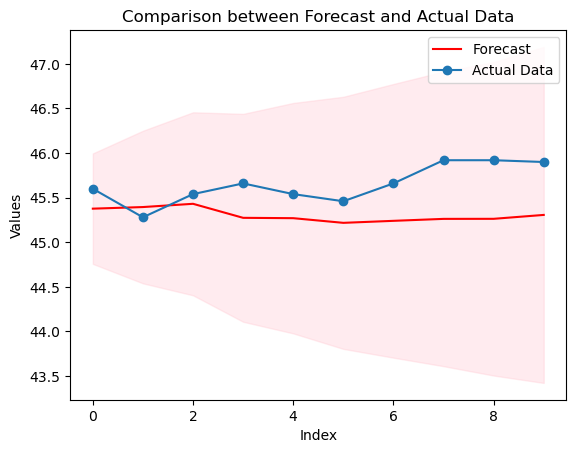

Root Mean Squared Error (RMSE): 0.4180313755090521


In [572]:
arima_forecast('SASA', 30, 1, 1)

                           price
timestamp                       
2023-09-20 09:00:00+03:00  52.35
2023-09-20 10:00:00+03:00  52.45
2023-09-20 11:00:00+03:00  52.05
2023-09-20 12:00:00+03:00  52.25
2023-09-20 13:00:00+03:00  52.10
2023-09-20 14:00:00+03:00  52.00
2023-09-20 15:00:00+03:00  51.75
2023-09-20 16:00:00+03:00  51.60
2023-09-20 17:00:00+03:00  51.05
2023-09-20 18:00:00+03:00  51.10
2023-09-21 09:00:00+03:00  50.60
2023-09-21 10:00:00+03:00  50.50
2023-09-21 11:00:00+03:00  50.70
2023-09-21 12:00:00+03:00  50.70
2023-09-21 13:00:00+03:00  51.25
2023-09-21 14:00:00+03:00  52.40
2023-09-21 15:00:00+03:00  52.20
2023-09-21 16:00:00+03:00  52.45
2023-09-21 17:00:00+03:00  53.15
2023-09-21 18:00:00+03:00  52.95
2023-09-22 09:00:00+03:00  53.75
2023-09-22 10:00:00+03:00  53.65
2023-09-22 11:00:00+03:00  53.55
2023-09-22 12:00:00+03:00  53.55
2023-09-22 13:00:00+03:00  53.50
2023-09-22 14:00:00+03:00  52.90
2023-09-22 15:00:00+03:00  52.75
2023-09-22 16:00:00+03:00  53.30
2023-09-22

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                14227
Model:                ARIMA(30, 1, 1)   Log Likelihood                5099.806
Date:                Sun, 24 Dec 2023   AIC                         -10135.611
Time:                        01:59:20   BIC                          -9893.601
Sample:                             0   HQIC                        -10055.107
                              - 14227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5683      0.093      6.087      0.000       0.385       0.751
ar.L2         -0.0315      0.005     -6.748      0.000      -0.041      -0.022
ar.L3          0.0277      0.005      5.800      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


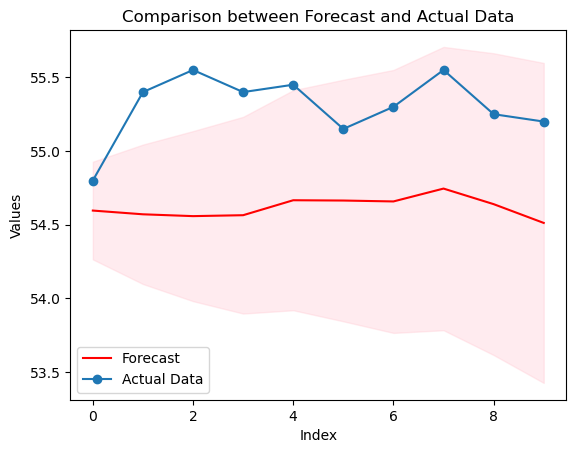

Root Mean Squared Error (RMSE): 0.7187052462466499


In [573]:
arima_forecast('SISE', 30, 1, 1)

                           price
timestamp                       
2023-09-20 09:00:00+03:00  115.1
2023-09-20 10:00:00+03:00  115.1
2023-09-20 11:00:00+03:00  116.4
2023-09-20 12:00:00+03:00  117.6
2023-09-20 13:00:00+03:00  118.4
2023-09-20 14:00:00+03:00  118.8
2023-09-20 15:00:00+03:00  119.9
2023-09-20 16:00:00+03:00  119.7
2023-09-20 17:00:00+03:00  119.9
2023-09-20 18:00:00+03:00  120.0
2023-09-21 09:00:00+03:00  119.2
2023-09-21 10:00:00+03:00  116.6
2023-09-21 11:00:00+03:00  117.9
2023-09-21 12:00:00+03:00  117.3
2023-09-21 13:00:00+03:00  117.7
2023-09-21 14:00:00+03:00  121.9
2023-09-21 15:00:00+03:00  120.6
2023-09-21 16:00:00+03:00  120.7
2023-09-21 17:00:00+03:00  121.9
2023-09-21 18:00:00+03:00  122.9
2023-09-22 09:00:00+03:00  119.5
2023-09-22 10:00:00+03:00  119.0
2023-09-22 11:00:00+03:00  119.3
2023-09-22 12:00:00+03:00  119.2
2023-09-22 13:00:00+03:00  119.4
2023-09-22 14:00:00+03:00  118.7
2023-09-22 15:00:00+03:00  118.7
2023-09-22 16:00:00+03:00  118.8
2023-09-22

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                14227
Model:                ARIMA(30, 1, 1)   Log Likelihood               -7661.180
Date:                Sun, 24 Dec 2023   AIC                          15386.360
Time:                        02:00:49   BIC                          15628.371
Sample:                             0   HQIC                         15466.865
                              - 14227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7579      0.078      9.756      0.000       0.606       0.910
ar.L2         -0.0122      0.005     -2.425      0.015      -0.022      -0.002
ar.L3          0.0222      0.005      4.086      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


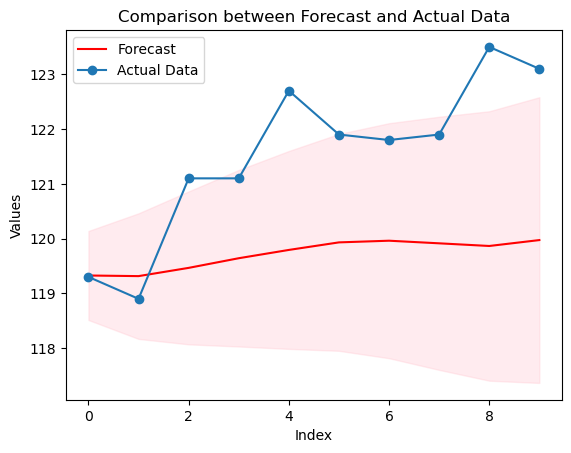

Root Mean Squared Error (RMSE): 2.182208058147649


In [574]:
arima_forecast('TAVHL', 30, 1, 1)

                           price
timestamp                       
2023-09-20 09:00:00+03:00  49.16
2023-09-20 10:00:00+03:00  49.82
2023-09-20 11:00:00+03:00  49.36
2023-09-20 12:00:00+03:00  49.24
2023-09-20 13:00:00+03:00  48.66
2023-09-20 14:00:00+03:00  48.38
2023-09-20 15:00:00+03:00  48.12
2023-09-20 16:00:00+03:00  47.78
2023-09-20 17:00:00+03:00  47.78
2023-09-20 18:00:00+03:00  47.88
2023-09-21 09:00:00+03:00  47.58
2023-09-21 10:00:00+03:00  47.38
2023-09-21 11:00:00+03:00  47.92
2023-09-21 12:00:00+03:00  47.58
2023-09-21 13:00:00+03:00  47.88
2023-09-21 14:00:00+03:00  48.92
2023-09-21 15:00:00+03:00  49.08
2023-09-21 16:00:00+03:00  50.45
2023-09-21 17:00:00+03:00  50.95
2023-09-21 18:00:00+03:00  50.95
2023-09-22 09:00:00+03:00  53.80
2023-09-22 10:00:00+03:00  52.55
2023-09-22 11:00:00+03:00  52.35
2023-09-22 12:00:00+03:00  52.30
2023-09-22 13:00:00+03:00  52.55
2023-09-22 14:00:00+03:00  52.30
2023-09-22 15:00:00+03:00  52.20
2023-09-22 16:00:00+03:00  51.80
2023-09-22

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                14227
Model:                ARIMA(30, 1, 1)   Log Likelihood                1919.611
Date:                Sun, 24 Dec 2023   AIC                          -3775.222
Time:                        02:01:21   BIC                          -3533.211
Sample:                             0   HQIC                         -3694.717
                              - 14227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0091      0.642      0.014      0.989      -1.250       1.268
ar.L2          0.0051      0.013      0.395      0.693      -0.020       0.030
ar.L3          0.0089      0.006      1.573      0.1

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


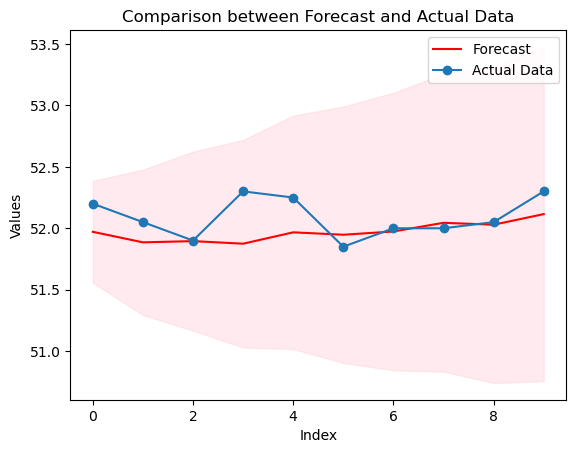

Root Mean Squared Error (RMSE): 0.19679655925987144


In [575]:
arima_forecast('TKFEN', 30, 1, 1)

                              price
timestamp                          
2023-09-20 09:00:00+03:00  138.3464
2023-09-20 10:00:00+03:00  137.3923
2023-09-20 11:00:00+03:00  136.2474
2023-09-20 12:00:00+03:00  135.9611
2023-09-20 13:00:00+03:00  135.9611
2023-09-20 14:00:00+03:00  136.0565
2023-09-20 15:00:00+03:00  135.5795
2023-09-20 16:00:00+03:00  134.7208
2023-09-20 17:00:00+03:00  133.9575
2023-09-20 18:00:00+03:00  134.8162
2023-09-21 09:00:00+03:00  134.0529
2023-09-21 10:00:00+03:00  133.0034
2023-09-21 11:00:00+03:00  133.2896
2023-09-21 12:00:00+03:00  133.3850
2023-09-21 13:00:00+03:00  134.5300
2023-09-21 14:00:00+03:00  137.5831
2023-09-21 15:00:00+03:00  138.1556
2023-09-21 16:00:00+03:00  139.5868
2023-09-21 17:00:00+03:00  141.0179
2023-09-21 18:00:00+03:00  141.0179
2023-09-22 09:00:00+03:00  141.2087
2023-09-22 10:00:00+03:00  145.7885
2023-09-22 11:00:00+03:00  146.3610
2023-09-22 12:00:00+03:00  147.4105
2023-09-22 13:00:00+03:00  146.6472
2023-09-22 14:00:00+03:00  1

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                14227
Model:                ARIMA(30, 1, 1)   Log Likelihood               -4191.410
Date:                Sun, 24 Dec 2023   AIC                           8446.821
Time:                        13:26:50   BIC                           8688.831
Sample:                             0   HQIC                          8527.325
                              - 14227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2832      0.143      1.976      0.048       0.002       0.564
ar.L2         -0.0058      0.008     -0.720      0.471      -0.022       0.010
ar.L3          0.0331      0.003     10.065      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


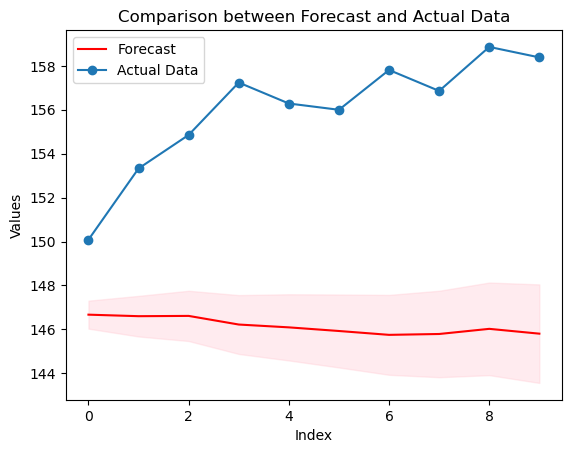

Root Mean Squared Error (RMSE): 10.208856797991869


In [584]:
arima_forecast('TUPRS', 30, 1, 1)

                           price
timestamp                       
2023-09-20 09:00:00+03:00  23.72
2023-09-20 10:00:00+03:00  23.86
2023-09-20 11:00:00+03:00  23.64
2023-09-20 12:00:00+03:00  23.40
2023-09-20 13:00:00+03:00  23.40
2023-09-20 14:00:00+03:00  23.48
2023-09-20 15:00:00+03:00  23.58
2023-09-20 16:00:00+03:00  23.24
2023-09-20 17:00:00+03:00  22.68
2023-09-20 18:00:00+03:00  22.64
2023-09-21 09:00:00+03:00  22.68
2023-09-21 10:00:00+03:00  22.56
2023-09-21 11:00:00+03:00  22.60
2023-09-21 12:00:00+03:00  22.42
2023-09-21 13:00:00+03:00  22.52
2023-09-21 14:00:00+03:00  23.12
2023-09-21 15:00:00+03:00  22.94
2023-09-21 16:00:00+03:00  22.98
2023-09-21 17:00:00+03:00  23.26
2023-09-21 18:00:00+03:00  23.34
2023-09-22 09:00:00+03:00  23.38
2023-09-22 10:00:00+03:00  23.34
2023-09-22 11:00:00+03:00  23.62
2023-09-22 12:00:00+03:00  23.48
2023-09-22 13:00:00+03:00  23.42
2023-09-22 14:00:00+03:00  23.22
2023-09-22 15:00:00+03:00  23.18
2023-09-22 16:00:00+03:00  23.22
2023-09-22

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                14227
Model:                ARIMA(30, 1, 1)   Log Likelihood               11745.489
Date:                Sun, 24 Dec 2023   AIC                         -23426.978
Time:                        02:03:00   BIC                         -23184.967
Sample:                             0   HQIC                        -23346.473
                              - 14227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0168      0.556     -0.030      0.976      -1.107       1.073
ar.L2         -0.0381      0.020     -1.942      0.052      -0.077       0.000
ar.L3          0.0108      0.022      0.488      0.6

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


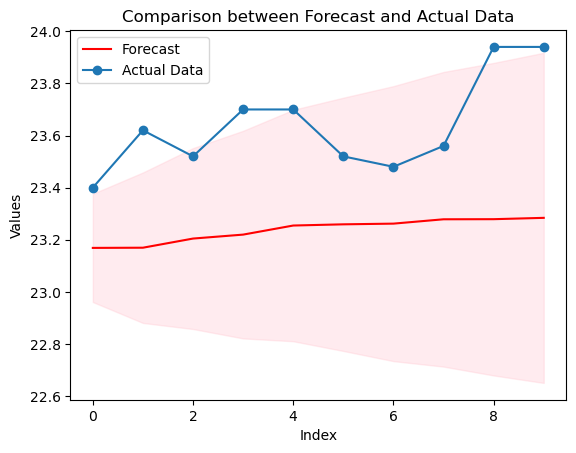

Root Mean Squared Error (RMSE): 0.42976132619291785


In [577]:
arima_forecast('TTKOM', 30, 1, 1)

                           price
timestamp                       
2023-09-20 09:00:00+03:00  54.30
2023-09-20 10:00:00+03:00  54.75
2023-09-20 11:00:00+03:00  54.25
2023-09-20 12:00:00+03:00  54.25
2023-09-20 13:00:00+03:00  54.40
2023-09-20 14:00:00+03:00  54.65
2023-09-20 15:00:00+03:00  54.35
2023-09-20 16:00:00+03:00  54.15
2023-09-20 17:00:00+03:00  53.75
2023-09-20 18:00:00+03:00  53.40
2023-09-21 09:00:00+03:00  53.10
2023-09-21 10:00:00+03:00  53.10
2023-09-21 11:00:00+03:00  52.95
2023-09-21 12:00:00+03:00  52.90
2023-09-21 13:00:00+03:00  53.15
2023-09-21 14:00:00+03:00  54.75
2023-09-21 15:00:00+03:00  54.35
2023-09-21 16:00:00+03:00  54.40
2023-09-21 17:00:00+03:00  55.40
2023-09-21 18:00:00+03:00  55.40
2023-09-22 09:00:00+03:00  55.40
2023-09-22 10:00:00+03:00  54.85
2023-09-22 11:00:00+03:00  54.75
2023-09-22 12:00:00+03:00  54.75
2023-09-22 13:00:00+03:00  54.60
2023-09-22 14:00:00+03:00  54.40
2023-09-22 15:00:00+03:00  54.50
2023-09-22 16:00:00+03:00  54.55
2023-09-22

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                14227
Model:                ARIMA(30, 1, 1)   Log Likelihood                2889.472
Date:                Sun, 24 Dec 2023   AIC                          -5714.944
Time:                        02:04:15   BIC                          -5472.933
Sample:                             0   HQIC                         -5634.439
                              - 14227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4563      0.093     -4.912      0.000      -0.638      -0.274
ar.L2         -0.0304      0.005     -6.482      0.000      -0.040      -0.021
ar.L3         -0.0436      0.004     -9.768      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


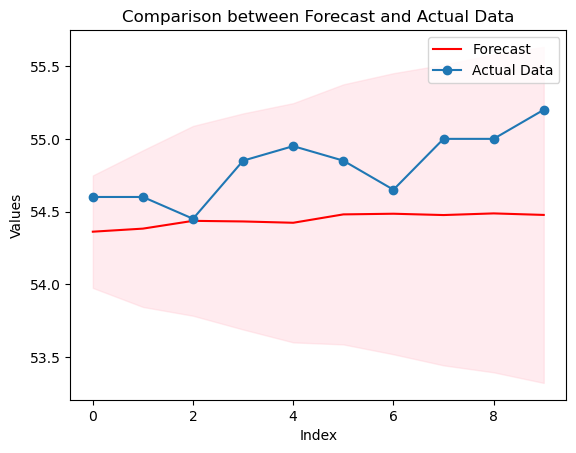

Root Mean Squared Error (RMSE): 0.42234389490438423


In [578]:
arima_forecast('TCELL', 30, 1, 1)

                           price
timestamp                       
2023-09-20 09:00:00+03:00  15.39
2023-09-20 10:00:00+03:00  15.59
2023-09-20 11:00:00+03:00  15.67
2023-09-20 12:00:00+03:00  15.68
2023-09-20 13:00:00+03:00  15.67
2023-09-20 14:00:00+03:00  15.52
2023-09-20 15:00:00+03:00  15.57
2023-09-20 16:00:00+03:00  15.55
2023-09-20 17:00:00+03:00  15.36
2023-09-20 18:00:00+03:00  15.38
2023-09-21 09:00:00+03:00  15.38
2023-09-21 10:00:00+03:00  15.61
2023-09-21 11:00:00+03:00  15.50
2023-09-21 12:00:00+03:00  15.51
2023-09-21 13:00:00+03:00  15.66
2023-09-21 14:00:00+03:00  15.34
2023-09-21 15:00:00+03:00  15.34
2023-09-21 16:00:00+03:00  15.41
2023-09-21 17:00:00+03:00  15.51
2023-09-21 18:00:00+03:00  15.50
2023-09-22 09:00:00+03:00  15.59
2023-09-22 10:00:00+03:00  15.45
2023-09-22 11:00:00+03:00  15.47
2023-09-22 12:00:00+03:00  15.44
2023-09-22 13:00:00+03:00  15.50
2023-09-22 14:00:00+03:00  15.36
2023-09-22 15:00:00+03:00  15.32
2023-09-22 16:00:00+03:00  15.32
2023-09-22

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                14227
Model:                ARIMA(30, 1, 1)   Log Likelihood               15534.967
Date:                Sun, 24 Dec 2023   AIC                         -31005.933
Time:                        02:05:16   BIC                         -30763.923
Sample:                             0   HQIC                        -30925.428
                              - 14227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0231      0.129      0.178      0.859      -0.231       0.277
ar.L2          0.0066      0.008      0.836      0.403      -0.009       0.022
ar.L3          0.0365      0.004      8.246      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


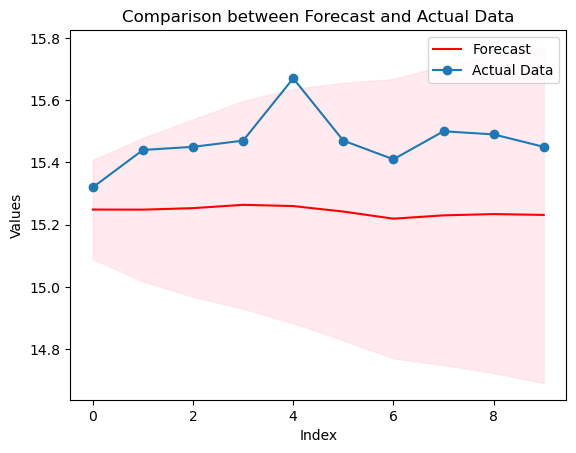

Root Mean Squared Error (RMSE): 0.2378744053801174


In [579]:
arima_forecast('HALKB', 30, 1, 1)

                           price
timestamp                       
2023-09-20 09:00:00+03:00  22.20
2023-09-20 10:00:00+03:00  22.26
2023-09-20 11:00:00+03:00  22.80
2023-09-20 12:00:00+03:00  22.72
2023-09-20 13:00:00+03:00  22.74
2023-09-20 14:00:00+03:00  22.74
2023-09-20 15:00:00+03:00  22.86
2023-09-20 16:00:00+03:00  22.80
2023-09-20 17:00:00+03:00  22.50
2023-09-20 18:00:00+03:00  22.50
2023-09-21 09:00:00+03:00  22.54
2023-09-21 10:00:00+03:00  22.74
2023-09-21 11:00:00+03:00  22.70
2023-09-21 12:00:00+03:00  22.76
2023-09-21 13:00:00+03:00  22.96
2023-09-21 14:00:00+03:00  22.66
2023-09-21 15:00:00+03:00  22.72
2023-09-21 16:00:00+03:00  22.98
2023-09-21 17:00:00+03:00  23.00
2023-09-21 18:00:00+03:00  23.14
2023-09-22 09:00:00+03:00  23.18
2023-09-22 10:00:00+03:00  23.16
2023-09-22 11:00:00+03:00  23.58
2023-09-22 12:00:00+03:00  23.48
2023-09-22 13:00:00+03:00  24.40
2023-09-22 14:00:00+03:00  24.24
2023-09-22 15:00:00+03:00  24.08
2023-09-22 16:00:00+03:00  24.78
2023-09-22

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                14227
Model:                ARIMA(30, 1, 1)   Log Likelihood               17865.450
Date:                Sun, 24 Dec 2023   AIC                         -35666.900
Time:                        02:05:54   BIC                         -35424.889
Sample:                             0   HQIC                        -35586.395
                              - 14227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0170     13.553      0.001      0.999     -26.546      26.580
ar.L2         -0.0337      0.491     -0.069      0.945      -0.997       0.929
ar.L3          0.0336      0.467      0.072      0.9

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


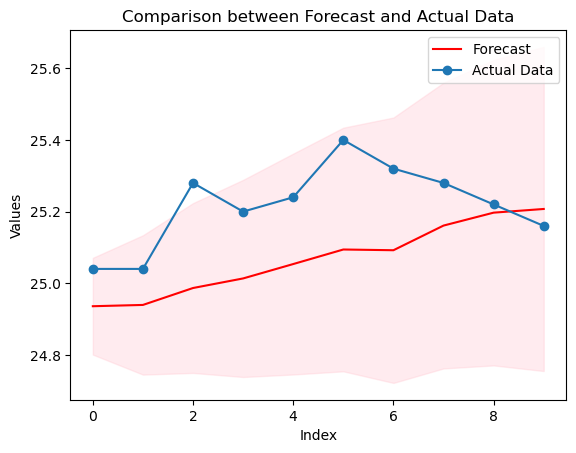

Root Mean Squared Error (RMSE): 0.18410772858785132


In [580]:
arima_forecast('ISCTR', 30, 1, 1)

                           price
timestamp                       
2023-09-20 09:00:00+03:00  13.60
2023-09-20 10:00:00+03:00  13.81
2023-09-20 11:00:00+03:00  13.91
2023-09-20 12:00:00+03:00  13.86
2023-09-20 13:00:00+03:00  13.89
2023-09-20 14:00:00+03:00  13.83
2023-09-20 15:00:00+03:00  13.85
2023-09-20 16:00:00+03:00  13.77
2023-09-20 17:00:00+03:00  13.52
2023-09-20 18:00:00+03:00  13.46
2023-09-21 09:00:00+03:00  13.46
2023-09-21 10:00:00+03:00  13.62
2023-09-21 11:00:00+03:00  13.54
2023-09-21 12:00:00+03:00  13.58
2023-09-21 13:00:00+03:00  13.69
2023-09-21 14:00:00+03:00  13.52
2023-09-21 15:00:00+03:00  13.49
2023-09-21 16:00:00+03:00  13.59
2023-09-21 17:00:00+03:00  13.63
2023-09-21 18:00:00+03:00  13.64
2023-09-22 09:00:00+03:00  13.65
2023-09-22 10:00:00+03:00  13.69
2023-09-22 11:00:00+03:00  13.75
2023-09-22 12:00:00+03:00  13.70
2023-09-22 13:00:00+03:00  13.79
2023-09-22 14:00:00+03:00  13.58
2023-09-22 15:00:00+03:00  13.53
2023-09-22 16:00:00+03:00  13.56
2023-09-22

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                14227
Model:                ARIMA(30, 1, 1)   Log Likelihood               18049.059
Date:                Sun, 24 Dec 2023   AIC                         -36034.118
Time:                        02:06:49   BIC                         -35792.108
Sample:                             0   HQIC                        -35953.614
                              - 14227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       -7.69e-05      0.187     -0.000      1.000      -0.367       0.367
ar.L2          0.0119      0.004      2.755      0.006       0.003       0.020
ar.L3          0.0481      0.005     10.343      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


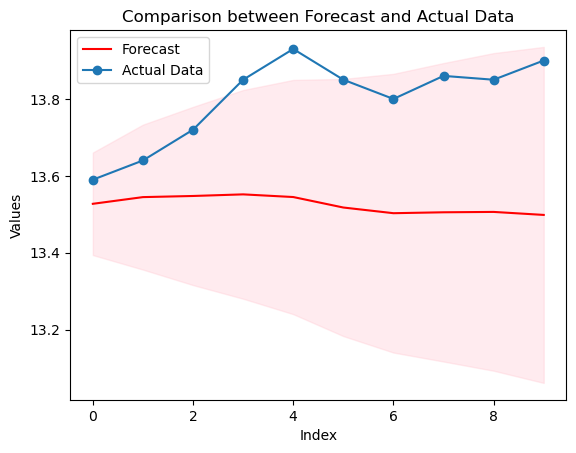

Root Mean Squared Error (RMSE): 0.29732815327071493


In [581]:
arima_forecast('VAKBN', 30, 1, 1)

                           price
timestamp                       
2023-09-20 09:00:00+03:00  61.45
2023-09-20 10:00:00+03:00  62.15
2023-09-20 11:00:00+03:00  61.65
2023-09-20 12:00:00+03:00  61.85
2023-09-20 13:00:00+03:00  61.35
2023-09-20 14:00:00+03:00  61.05
2023-09-20 15:00:00+03:00  60.85
2023-09-20 16:00:00+03:00  60.50
2023-09-20 17:00:00+03:00  59.90
2023-09-20 18:00:00+03:00  59.50
2023-09-21 09:00:00+03:00  59.05
2023-09-21 10:00:00+03:00  58.75
2023-09-21 11:00:00+03:00  59.60
2023-09-21 12:00:00+03:00  59.15
2023-09-21 13:00:00+03:00  59.35
2023-09-21 14:00:00+03:00  60.35
2023-09-21 15:00:00+03:00  60.05
2023-09-21 16:00:00+03:00  60.95
2023-09-21 17:00:00+03:00  61.70
2023-09-21 18:00:00+03:00  61.90
2023-09-22 09:00:00+03:00  62.05
2023-09-22 10:00:00+03:00  62.55
2023-09-22 11:00:00+03:00  63.40
2023-09-22 12:00:00+03:00  63.10
2023-09-22 13:00:00+03:00  63.10
2023-09-22 14:00:00+03:00  63.10
2023-09-22 15:00:00+03:00  62.55
2023-09-22 16:00:00+03:00  64.15
2023-09-22

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                14227
Model:                ARIMA(30, 1, 1)   Log Likelihood               -3104.699
Date:                Sun, 24 Dec 2023   AIC                           6273.399
Time:                        02:08:31   BIC                           6515.409
Sample:                             0   HQIC                          6353.903
                              - 14227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6190      0.066      9.352      0.000       0.489       0.749
ar.L2          0.0048      0.004      1.239      0.215      -0.003       0.012
ar.L3          0.0117      0.004      2.857      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


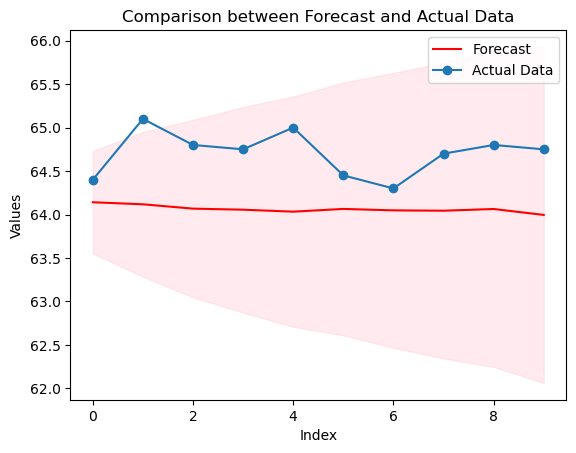

Root Mean Squared Error (RMSE): 0.6886839822057449


In [582]:
arima_forecast('VESTL', 30, 1, 1)

                           price
timestamp                       
2023-09-20 09:00:00+03:00  16.15
2023-09-20 10:00:00+03:00  16.42
2023-09-20 11:00:00+03:00  16.55
2023-09-20 12:00:00+03:00  16.59
2023-09-20 13:00:00+03:00  16.64
2023-09-20 14:00:00+03:00  16.64
2023-09-20 15:00:00+03:00  16.89
2023-09-20 16:00:00+03:00  16.85
2023-09-20 17:00:00+03:00  16.52
2023-09-20 18:00:00+03:00  16.51
2023-09-21 09:00:00+03:00  16.51
2023-09-21 10:00:00+03:00  16.78
2023-09-21 11:00:00+03:00  16.69
2023-09-21 12:00:00+03:00  16.74
2023-09-21 13:00:00+03:00  16.83
2023-09-21 14:00:00+03:00  16.77
2023-09-21 15:00:00+03:00  16.85
2023-09-21 16:00:00+03:00  16.92
2023-09-21 17:00:00+03:00  16.96
2023-09-21 18:00:00+03:00  17.00
2023-09-22 09:00:00+03:00  17.00
2023-09-22 10:00:00+03:00  16.90
2023-09-22 11:00:00+03:00  17.01
2023-09-22 12:00:00+03:00  16.98
2023-09-22 13:00:00+03:00  17.06
2023-09-22 14:00:00+03:00  16.91
2023-09-22 15:00:00+03:00  16.93
2023-09-22 16:00:00+03:00  16.99
2023-09-22

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                14227
Model:                ARIMA(30, 1, 1)   Log Likelihood               20865.211
Date:                Sun, 24 Dec 2023   AIC                         -41666.422
Time:                        18:28:01   BIC                         -41424.412
Sample:                             0   HQIC                        -41585.917
                              - 14227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0073      1.138      0.006      0.995      -2.224       2.239
ar.L2         -0.0077      0.017     -0.443      0.658      -0.042       0.026
ar.L3          0.0301      0.010      3.072      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


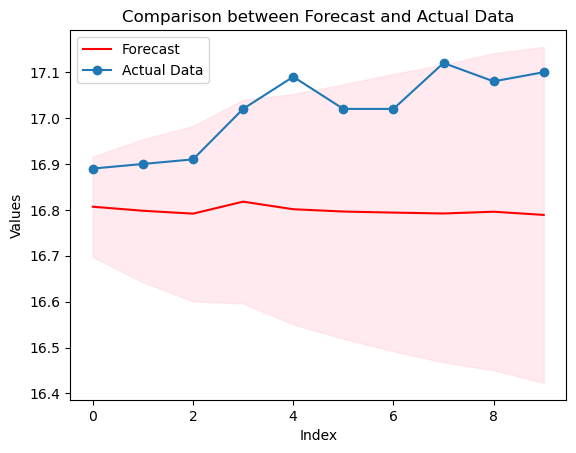

Root Mean Squared Error (RMSE): 0.23272251923593065


In [686]:
arima_forecast('YKBNK', 30, 1, 1)

In [699]:
# Define forecast_values_dict outside the function
forecast_values_dict = {}

                            price short_name
timestamp                                   
2021-12-27 09:00:00+03:00   21.04      THYAO
2021-12-27 10:00:00+03:00   21.54      THYAO
2021-12-27 11:00:00+03:00   21.20      THYAO
2021-12-27 12:00:00+03:00   21.18      THYAO
2021-12-27 13:00:00+03:00   21.14      THYAO
...                           ...        ...
2023-09-22 14:00:00+03:00  228.80      THYAO
2023-09-22 15:00:00+03:00  227.90      THYAO
2023-09-22 16:00:00+03:00  228.20      THYAO
2023-09-22 17:00:00+03:00  226.80      THYAO
2023-09-22 18:00:00+03:00  226.10      THYAO

[4324 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
Stock data for THYAO.IS:
                                 Open        High         Low       Close  \
Datetime                                                                    
2023-09-25 09:30:00+03:00  138.000000  140.199997  138.000000  139.300003   
2023-09-25 10:30:00+03:00  139.399994  140.100006  139.100006  14

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                17890
Model:                ARIMA(30, 3, 1)   Log Likelihood              -14439.608
Date:                Sun, 24 Dec 2023   AIC                          28943.217
Time:                        20:43:19   BIC                          29192.556
Sample:                             0   HQIC                         29025.236
                              - 17890                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9058      0.003   -349.971      0.000      -0.911      -0.901
ar.L2         -0.8825      0.004   -228.635      0.000      -0.890      -0.875
ar.L3         -0.8595      0.006   -155.683      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


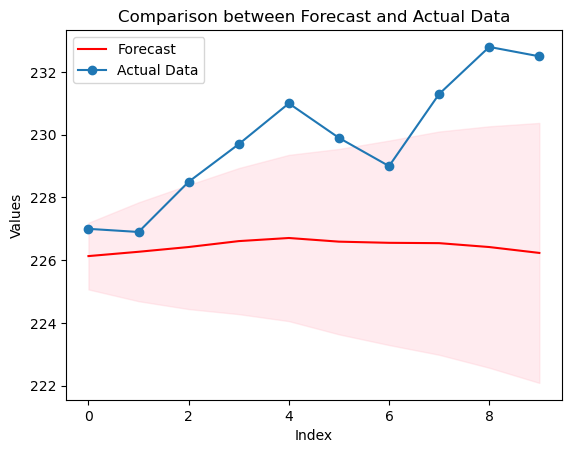

Root Mean Squared Error (RMSE): 3.9116086638429937
Weighted Mean Absolute Percentage Error (WMAPE): 1.4844957820835403


In [709]:
forecastplusyahoo('THYAO', 30, 1, 3)

                             price short_name
timestamp                                    
2021-12-27 09:00:00+03:00   6.6937      AKBNK
2021-12-27 10:00:00+03:00   6.7991      AKBNK
2021-12-27 11:00:00+03:00   6.8343      AKBNK
2021-12-27 12:00:00+03:00   6.8430      AKBNK
2021-12-27 13:00:00+03:00   6.8255      AKBNK
...                            ...        ...
2023-09-22 14:00:00+03:00  31.0800      AKBNK
2023-09-22 15:00:00+03:00  30.9000      AKBNK
2023-09-22 16:00:00+03:00  31.1400      AKBNK
2023-09-22 17:00:00+03:00  30.8400      AKBNK
2023-09-22 18:00:00+03:00  30.8000      AKBNK

[4324 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
Stock data for AKBNK.IS:
                                 Open        High         Low       Close  \
Datetime                                                                    
2023-09-25 09:30:00+03:00  138.000000  140.199997  138.000000  139.300003   
2023-09-25 10:30:00+03:00  139.399994  140.100006  1

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                17891
Model:                ARIMA(30, 1, 1)   Log Likelihood                3158.424
Date:                Sun, 24 Dec 2023   AIC                          -6252.847
Time:                        20:46:03   BIC                          -6003.503
Sample:                             0   HQIC                         -6170.827
                              - 17891                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4546      0.236     -1.927      0.054      -0.917       0.008
ar.L2          0.2564      0.203      1.261      0.207      -0.142       0.655
ar.L3         -0.0086      0.023     -0.377      0.7

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


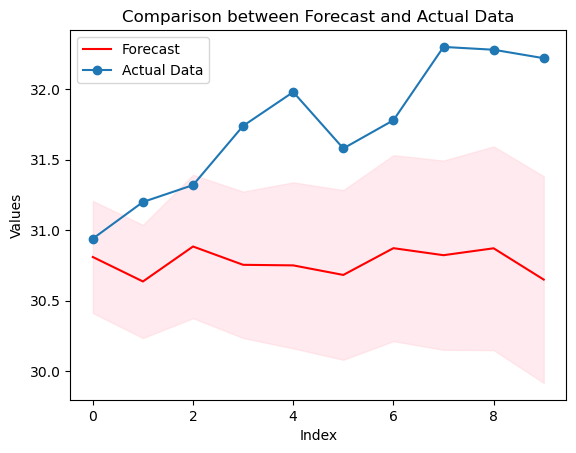

Root Mean Squared Error (RMSE): 1.0615514510933883
Weighted Mean Absolute Percentage Error (WMAPE): 3.0269725281847215


In [710]:
forecastplusyahoo('AKBNK', 30, 1, 1)

                              price short_name
timestamp                                     
2021-12-27 09:00:00+03:00   49.8145      ARCLK
2021-12-27 10:00:00+03:00   49.6728      ARCLK
2021-12-27 11:00:00+03:00   49.4837      ARCLK
2021-12-27 12:00:00+03:00   48.9639      ARCLK
2021-12-27 13:00:00+03:00   49.3419      ARCLK
...                             ...        ...
2023-09-22 14:00:00+03:00  155.2158      ARCLK
2023-09-22 15:00:00+03:00  155.0192      ARCLK
2023-09-22 16:00:00+03:00  155.5107      ARCLK
2023-09-22 17:00:00+03:00  153.3481      ARCLK
2023-09-22 18:00:00+03:00  154.0362      ARCLK

[4324 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
Stock data for ARCLK.IS:
                                 Open        High         Low       Close  \
Datetime                                                                    
2023-09-25 09:30:00+03:00  138.000000  140.199997  138.000000  139.300003   
2023-09-25 10:30:00+03:00  139.399994  

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                17891
Model:                ARIMA(30, 1, 1)   Log Likelihood              -18280.318
Date:                Sun, 24 Dec 2023   AIC                          36624.636
Time:                        20:48:49   BIC                          36873.980
Sample:                             0   HQIC                         36706.656
                              - 17891                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2942      0.005   -255.452      0.000      -1.304      -1.284
ar.L2         -0.3086      0.006    -55.444      0.000      -0.320      -0.298
ar.L3          0.0052      0.006      0.809      0.4

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


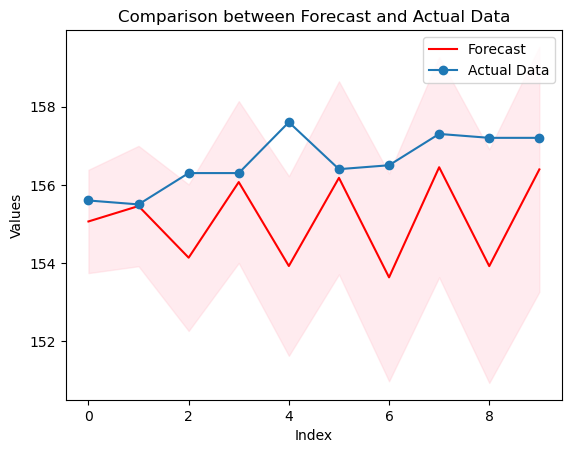

Root Mean Squared Error (RMSE): 1.9713275245319117
Weighted Mean Absolute Percentage Error (WMAPE): 1.0168957271982435


In [711]:
forecastplusyahoo('ARCLK', 30, 1, 1)

                             price short_name
timestamp                                    
2021-12-27 09:00:00+03:00  10.9361      ASELS
2021-12-27 10:00:00+03:00  11.2048      ASELS
2021-12-27 11:00:00+03:00  11.1252      ASELS
2021-12-27 12:00:00+03:00  11.0655      ASELS
2021-12-27 13:00:00+03:00  11.0754      ASELS
...                            ...        ...
2023-09-22 14:00:00+03:00  40.3000      ASELS
2023-09-22 15:00:00+03:00  40.1600      ASELS
2023-09-22 16:00:00+03:00  40.2400      ASELS
2023-09-22 17:00:00+03:00  40.6400      ASELS
2023-09-22 18:00:00+03:00  40.5200      ASELS

[4324 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
Stock data for ASELS.IS:
                                 Open        High         Low       Close  \
Datetime                                                                    
2023-09-25 09:30:00+03:00  138.000000  140.199997  138.000000  139.300003   
2023-09-25 10:30:00+03:00  139.399994  140.100006  1

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                17781
Model:                ARIMA(30, 3, 1)   Log Likelihood               11009.200
Date:                Sun, 24 Dec 2023   AIC                         -21954.399
Time:                        20:52:13   BIC                         -21705.256
Sample:                             0   HQIC                        -21872.420
                              - 17781                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9971      0.003   -291.484      0.000      -1.004      -0.990
ar.L2         -0.9346      0.005   -191.695      0.000      -0.944      -0.925
ar.L3         -0.9495      0.006   -146.890      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


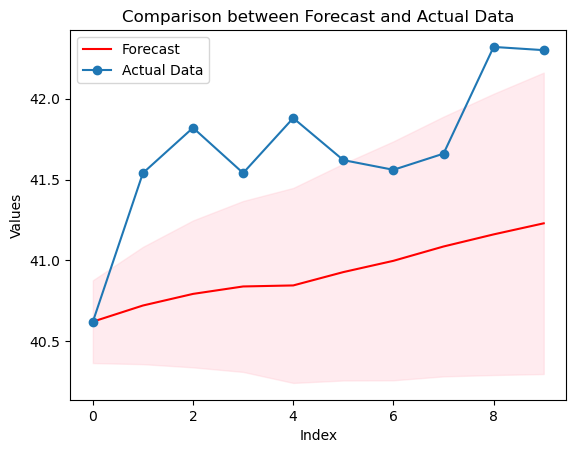

Root Mean Squared Error (RMSE): 0.8310566241125393
Weighted Mean Absolute Percentage Error (WMAPE): 1.9779651702869407


In [712]:
forecastplusyahoo('ASELS', 30, 1, 3)

                              price short_name
timestamp                                     
2021-12-27 09:00:00+03:00   62.9265      BIMAS
2021-12-27 10:00:00+03:00   63.4541      BIMAS
2021-12-27 11:00:00+03:00   62.8305      BIMAS
2021-12-27 12:00:00+03:00   62.5908      BIMAS
2021-12-27 13:00:00+03:00   62.4948      BIMAS
...                             ...        ...
2023-09-22 14:00:00+03:00  274.0000      BIMAS
2023-09-22 15:00:00+03:00  273.0000      BIMAS
2023-09-22 16:00:00+03:00  272.4000      BIMAS
2023-09-22 17:00:00+03:00  273.4000      BIMAS
2023-09-22 18:00:00+03:00  273.4000      BIMAS

[4324 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
Stock data for BIMAS.IS:
                                 Open        High         Low       Close  \
Datetime                                                                    
2023-09-25 09:30:00+03:00  138.000000  140.199997  138.000000  139.300003   
2023-09-25 10:30:00+03:00  139.399994  

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                17890
Model:                ARIMA(30, 1, 1)   Log Likelihood              -22483.181
Date:                Sun, 24 Dec 2023   AIC                          45030.362
Time:                        20:54:51   BIC                          45279.704
Sample:                             0   HQIC                         45112.382
                              - 17890                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2601      0.006   -203.316      0.000      -1.272      -1.248
ar.L2         -0.2749      0.006    -48.309      0.000      -0.286      -0.264
ar.L3         -0.0154      0.007     -2.232      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


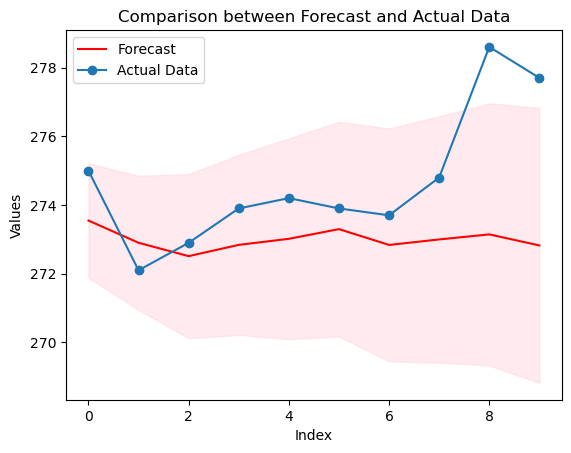

Root Mean Squared Error (RMSE): 2.516333261049285
Weighted Mean Absolute Percentage Error (WMAPE): 0.6904617330843175


In [713]:
forecastplusyahoo('BIMAS', 30, 1, 1)

                             price short_name
timestamp                                    
2021-12-27 09:00:00+03:00   2.6366      DOHOL
2021-12-27 10:00:00+03:00   2.6736      DOHOL
2021-12-27 11:00:00+03:00   2.6366      DOHOL
2021-12-27 12:00:00+03:00   2.6458      DOHOL
2021-12-27 13:00:00+03:00   2.6458      DOHOL
...                            ...        ...
2023-09-22 14:00:00+03:00  13.0500      DOHOL
2023-09-22 15:00:00+03:00  13.0600      DOHOL
2023-09-22 16:00:00+03:00  13.0700      DOHOL
2023-09-22 17:00:00+03:00  13.0500      DOHOL
2023-09-22 18:00:00+03:00  13.0600      DOHOL

[4324 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
Stock data for DOHOL.IS:
                                 Open        High         Low       Close  \
Datetime                                                                    
2023-09-25 09:30:00+03:00  138.000000  140.199997  138.000000  139.300003   
2023-09-25 10:30:00+03:00  139.399994  140.100006  1

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                17890
Model:                ARIMA(30, 1, 1)   Log Likelihood               23798.523
Date:                Sun, 24 Dec 2023   AIC                         -47533.046
Time:                        20:57:46   BIC                         -47283.704
Sample:                             0   HQIC                        -47451.026
                              - 17890                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3540      0.076     -4.643      0.000      -0.503      -0.205
ar.L2          0.1837      0.041      4.488      0.000       0.104       0.264
ar.L3         -0.0915      0.008    -10.947      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


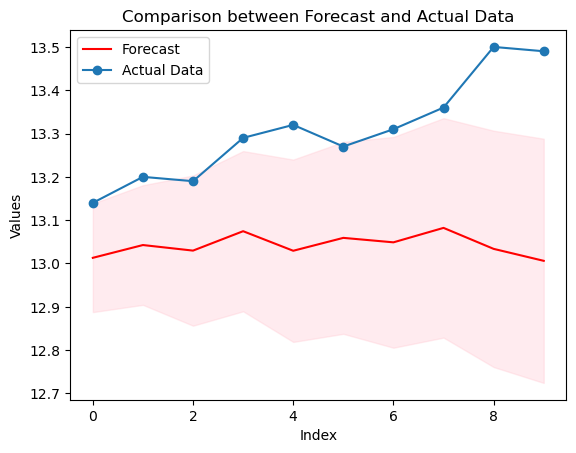

Root Mean Squared Error (RMSE): 0.28962864777279757
Weighted Mean Absolute Percentage Error (WMAPE): 1.9919527840870335


In [714]:
forecastplusyahoo('DOHOL', 30, 1, 1)

                            price short_name
timestamp                                   
2021-12-27 09:00:00+03:00  2.0714      EKGYO
2021-12-27 10:00:00+03:00  2.0993      EKGYO
2021-12-27 11:00:00+03:00  2.0993      EKGYO
2021-12-27 12:00:00+03:00  2.0901      EKGYO
2021-12-27 13:00:00+03:00  2.0901      EKGYO
...                           ...        ...
2023-09-22 14:00:00+03:00  7.9100      EKGYO
2023-09-22 15:00:00+03:00  7.8900      EKGYO
2023-09-22 16:00:00+03:00  7.8900      EKGYO
2023-09-22 17:00:00+03:00  7.9000      EKGYO
2023-09-22 18:00:00+03:00  7.9100      EKGYO

[4324 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
Stock data for EKGYO.IS:
                                 Open        High         Low       Close  \
Datetime                                                                    
2023-09-25 09:30:00+03:00  138.000000  140.199997  138.000000  139.300003   
2023-09-25 10:30:00+03:00  139.399994  140.100006  139.100006  14

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                17891
Model:                ARIMA(30, 3, 1)   Log Likelihood               28040.755
Date:                Sun, 24 Dec 2023   AIC                         -56017.509
Time:                        21:08:49   BIC                         -55768.169
Sample:                             0   HQIC                        -55935.490
                              - 17891                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4811      0.004   -418.252      0.000      -1.488      -1.474
ar.L2         -1.3162      0.007   -180.997      0.000      -1.330      -1.302
ar.L3         -1.3883      0.010   -133.806      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


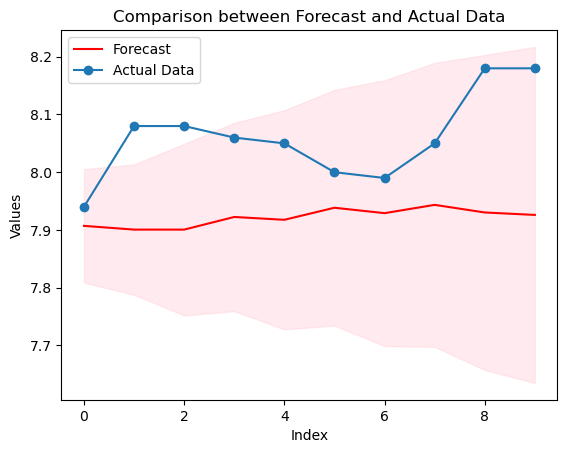

Root Mean Squared Error (RMSE): 0.1573689183058474
Weighted Mean Absolute Percentage Error (WMAPE): 1.7307715709708829


In [717]:
forecastplusyahoo('EKGYO', 30, 1, 3)

                             price short_name
timestamp                                    
2021-12-27 09:00:00+03:00  25.0042      EREGL
2021-12-27 10:00:00+03:00  25.6008      EREGL
2021-12-27 11:00:00+03:00  25.4955      EREGL
2021-12-27 12:00:00+03:00  25.3902      EREGL
2021-12-27 13:00:00+03:00  25.5130      EREGL
...                            ...        ...
2023-09-22 14:00:00+03:00  42.8400      EREGL
2023-09-22 15:00:00+03:00  43.0600      EREGL
2023-09-22 16:00:00+03:00  43.2200      EREGL
2023-09-22 17:00:00+03:00  43.1800      EREGL
2023-09-22 18:00:00+03:00  43.2800      EREGL

[4324 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
Stock data for EREGL.IS:
                                 Open        High         Low       Close  \
Datetime                                                                    
2023-09-25 09:30:00+03:00  138.000000  140.199997  138.000000  139.300003   
2023-09-25 10:30:00+03:00  139.399994  140.100006  1

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                17890
Model:                ARIMA(30, 3, 1)   Log Likelihood               -1053.501
Date:                Sun, 24 Dec 2023   AIC                           2171.002
Time:                        21:28:11   BIC                           2420.340
Sample:                             0   HQIC                          2253.021
                              - 17890                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3765      0.003   -457.849      0.000      -1.382      -1.371
ar.L2         -1.2377      0.006   -190.941      0.000      -1.250      -1.225
ar.L3         -1.3343      0.010   -140.370      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


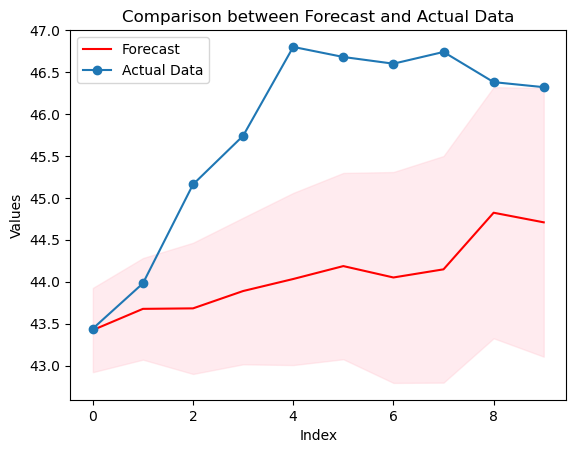

Root Mean Squared Error (RMSE): 1.9452928352152923
Weighted Mean Absolute Percentage Error (WMAPE): 4.124983996856018


In [724]:
forecastplusyahoo('EREGL', 30, 1, 3)

                              price short_name
timestamp                                     
2021-12-27 09:00:00+03:00  216.8891      FROTO
2021-12-27 10:00:00+03:00  225.8110      FROTO
2021-12-27 11:00:00+03:00  223.8482      FROTO
2021-12-27 12:00:00+03:00  221.4393      FROTO
2021-12-27 13:00:00+03:00  221.6177      FROTO
...                             ...        ...
2023-09-22 14:00:00+03:00  810.1695      FROTO
2023-09-22 15:00:00+03:00  808.0466      FROTO
2023-09-22 16:00:00+03:00  809.2045      FROTO
2023-09-22 17:00:00+03:00  812.4853      FROTO
2023-09-22 18:00:00+03:00  809.9765      FROTO

[4324 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
Stock data for FROTO.IS:
                                 Open        High         Low       Close  \
Datetime                                                                    
2023-09-25 09:30:00+03:00  138.000000  140.199997  138.000000  139.300003   
2023-09-25 10:30:00+03:00  139.399994  

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                17889
Model:                ARIMA(30, 1, 1)   Log Likelihood              -53978.006
Date:                Sun, 24 Dec 2023   AIC                         108020.012
Time:                        21:13:57   BIC                         108269.353
Sample:                             0   HQIC                        108102.032
                              - 17889                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7040      0.150     -4.695      0.000      -0.998      -0.410
ar.L2         -0.0208      0.139     -0.150      0.881      -0.293       0.252
ar.L3         -0.0442      0.034     -1.302      0.1

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


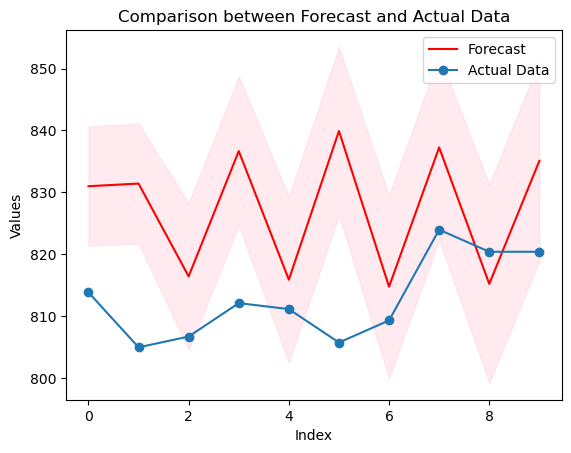

Root Mean Squared Error (RMSE): 18.254694830973946
Weighted Mean Absolute Percentage Error (WMAPE): 1.9625575975106204


In [719]:
forecastplusyahoo('FROTO', 30, 1, 1)

                            price short_name
timestamp                                   
2021-12-27 09:00:00+03:00   77.30      GUBRF
2021-12-27 10:00:00+03:00   81.00      GUBRF
2021-12-27 11:00:00+03:00   81.15      GUBRF
2021-12-27 12:00:00+03:00   82.35      GUBRF
2021-12-27 13:00:00+03:00   83.00      GUBRF
...                           ...        ...
2023-09-22 14:00:00+03:00  337.20      GUBRF
2023-09-22 15:00:00+03:00  337.90      GUBRF
2023-09-22 16:00:00+03:00  337.40      GUBRF
2023-09-22 17:00:00+03:00  339.70      GUBRF
2023-09-22 18:00:00+03:00  339.50      GUBRF

[4323 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
Stock data for GUBRF.IS:
                                 Open        High         Low       Close  \
Datetime                                                                    
2023-09-25 09:30:00+03:00  138.000000  140.199997  138.000000  139.300003   
2023-09-25 10:30:00+03:00  139.399994  140.100006  139.100006  14

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                17880
Model:                ARIMA(30, 3, 1)   Log Likelihood              -28209.135
Date:                Sun, 24 Dec 2023   AIC                          56482.270
Time:                        21:35:02   BIC                          56731.590
Sample:                             0   HQIC                         56564.285
                              - 17880                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9813      0.003   -316.841      0.000      -0.987      -0.975
ar.L2         -0.9403      0.004   -213.397      0.000      -0.949      -0.932
ar.L3         -0.9096      0.006   -155.419      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


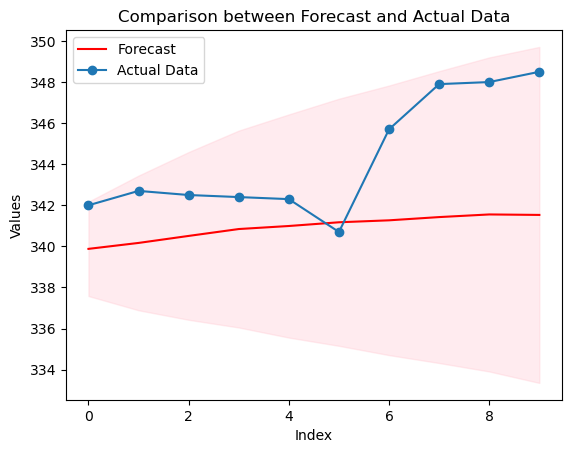

Root Mean Squared Error (RMSE): 4.134342823553692
Weighted Mean Absolute Percentage Error (WMAPE): 0.9916082336386941


In [725]:
forecastplusyahoo('GUBRF', 30, 1, 3)

                             price short_name
timestamp                                    
2021-12-27 09:00:00+03:00  10.6645      GARAN
2021-12-27 10:00:00+03:00  10.7373      GARAN
2021-12-27 11:00:00+03:00  10.7282      GARAN
2021-12-27 12:00:00+03:00  10.7282      GARAN
2021-12-27 13:00:00+03:00  10.7191      GARAN
...                            ...        ...
2023-09-22 14:00:00+03:00  51.3000      GARAN
2023-09-22 15:00:00+03:00  51.2500      GARAN
2023-09-22 16:00:00+03:00  51.4500      GARAN
2023-09-22 17:00:00+03:00  50.8500      GARAN
2023-09-22 18:00:00+03:00  50.8000      GARAN

[4324 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
Stock data for GARAN.IS:
                                 Open        High         Low       Close  \
Datetime                                                                    
2023-09-25 09:30:00+03:00  138.000000  140.199997  138.000000  139.300003   
2023-09-25 10:30:00+03:00  139.399994  140.100006  1

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                17891
Model:                ARIMA(30, 1, 1)   Log Likelihood               -3854.045
Date:                Sun, 24 Dec 2023   AIC                           7772.090
Time:                        21:19:02   BIC                           8021.434
Sample:                             0   HQIC                          7854.110
                              - 17891                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8538      0.096     -8.924      0.000      -1.041      -0.666
ar.L2         -0.1218      0.071     -1.706      0.088      -0.262       0.018
ar.L3         -0.0691      0.007    -10.623      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


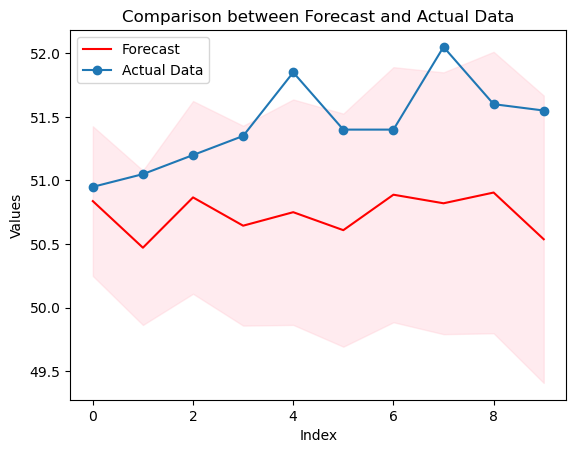

Root Mean Squared Error (RMSE): 0.7789229266620964
Weighted Mean Absolute Percentage Error (WMAPE): 1.3735503100311612


In [721]:
forecastplusyahoo('GARAN', 30, 1, 1)

                             price short_name
timestamp                                    
2021-12-27 09:00:00+03:00   8.8236      KRDMD
2021-12-27 10:00:00+03:00   9.1310      KRDMD
2021-12-27 11:00:00+03:00   9.0565      KRDMD
2021-12-27 12:00:00+03:00   9.0472      KRDMD
2021-12-27 13:00:00+03:00   9.0006      KRDMD
...                            ...        ...
2023-09-22 14:00:00+03:00  27.3200      KRDMD
2023-09-22 15:00:00+03:00  27.4000      KRDMD
2023-09-22 16:00:00+03:00  27.5600      KRDMD
2023-09-22 17:00:00+03:00  27.6200      KRDMD
2023-09-22 18:00:00+03:00  27.5200      KRDMD

[4324 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
Stock data for KRDMD.IS:
                                 Open        High         Low       Close  \
Datetime                                                                    
2023-09-25 09:30:00+03:00  138.000000  140.199997  138.000000  139.300003   
2023-09-25 10:30:00+03:00  139.399994  140.100006  1

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                17891
Model:                ARIMA(30, 3, 1)   Log Likelihood                8567.696
Date:                Sun, 24 Dec 2023   AIC                         -17071.393
Time:                        21:38:09   BIC                         -16822.052
Sample:                             0   HQIC                        -16989.373
                              - 17891                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4345      0.004   -319.177      0.000      -1.443      -1.426
ar.L2         -1.2996      0.010   -134.545      0.000      -1.318      -1.281
ar.L3         -1.3753      0.014    -99.202      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


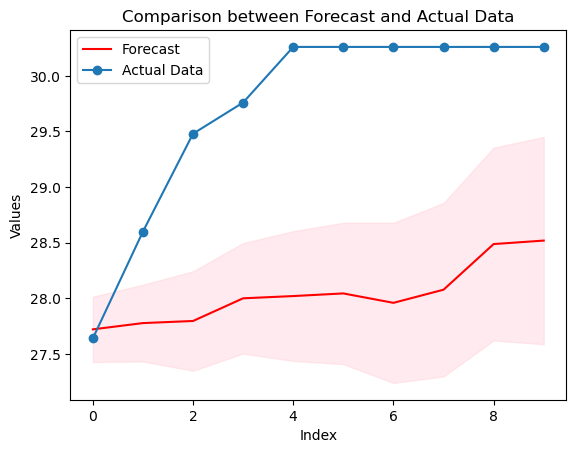

Root Mean Squared Error (RMSE): 1.8099643456148864
Weighted Mean Absolute Percentage Error (WMAPE): 5.869630706095556


In [726]:
forecastplusyahoo('KRDMD', 30, 1, 3)

                              price short_name
timestamp                                     
2021-12-27 09:00:00+03:00   28.3315      KCHOL
2021-12-27 10:00:00+03:00   28.7712      KCHOL
2021-12-27 11:00:00+03:00   28.6565      KCHOL
2021-12-27 12:00:00+03:00   28.6375      KCHOL
2021-12-27 13:00:00+03:00   28.6565      KCHOL
...                             ...        ...
2023-09-22 14:00:00+03:00  138.8000      KCHOL
2023-09-22 15:00:00+03:00  138.9000      KCHOL
2023-09-22 16:00:00+03:00  139.0000      KCHOL
2023-09-22 17:00:00+03:00  137.3000      KCHOL
2023-09-22 18:00:00+03:00  137.5000      KCHOL

[4324 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
Stock data for KCHOL.IS:
                                 Open        High         Low       Close  \
Datetime                                                                    
2023-09-25 09:30:00+03:00  138.000000  140.199997  138.000000  139.300003   
2023-09-25 10:30:00+03:00  139.399994  

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                17890
Model:                ARIMA(30, 3, 1)   Log Likelihood              -11538.687
Date:                Sun, 24 Dec 2023   AIC                          23141.374
Time:                        21:42:00   BIC                          23390.713
Sample:                             0   HQIC                         23223.393
                              - 17890                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3188      0.003   -420.000      0.000      -1.325      -1.313
ar.L2         -1.1751      0.005   -225.618      0.000      -1.185      -1.165
ar.L3         -1.2516      0.007   -176.232      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


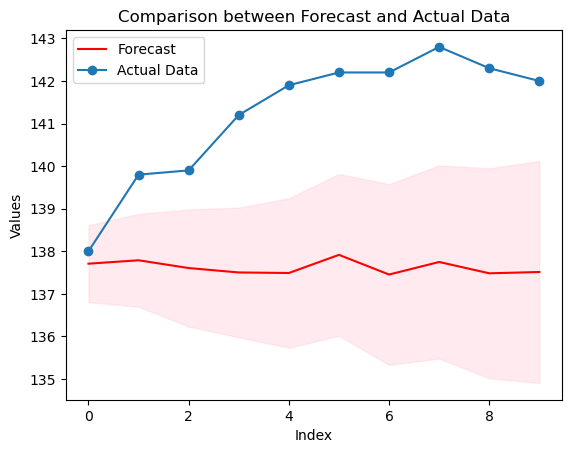

Root Mean Squared Error (RMSE): 3.9015612302972906
Weighted Mean Absolute Percentage Error (WMAPE): 2.5551533958717365


In [727]:
forecastplusyahoo('KCHOL',30,1,3)

                             price short_name
timestamp                                    
2021-12-27 09:00:00+03:00   4.9696      KOZAL
2021-12-27 10:00:00+03:00   5.0971      KOZAL
2021-12-27 11:00:00+03:00   5.0716      KOZAL
2021-12-27 12:00:00+03:00   5.0504      KOZAL
2021-12-27 13:00:00+03:00   5.0716      KOZAL
...                            ...        ...
2023-09-22 14:00:00+03:00  28.1200      KOZAL
2023-09-22 15:00:00+03:00  28.0400      KOZAL
2023-09-22 16:00:00+03:00  28.0400      KOZAL
2023-09-22 17:00:00+03:00  27.9400      KOZAL
2023-09-22 18:00:00+03:00  28.0200      KOZAL

[4324 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
Stock data for KOZAL.IS:
                                 Open        High         Low       Close  \
Datetime                                                                    
2023-09-25 09:30:00+03:00  138.000000  140.199997  138.000000  139.300003   
2023-09-25 10:30:00+03:00  139.399994  140.100006  1

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to con

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                17890
Model:                ARIMA(30, 1, 1)   Log Likelihood              -24459.787
Date:                Sun, 24 Dec 2023   AIC                          48983.574
Time:                        21:44:33   BIC                          49232.916
Sample:                             0   HQIC                         49065.594
                              - 17890                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6103      0.033    -18.377      0.000      -0.675      -0.545
ar.L2          0.3376      0.049      6.853      0.000       0.241       0.434
ar.L3          0.1726      0.032      5.418      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


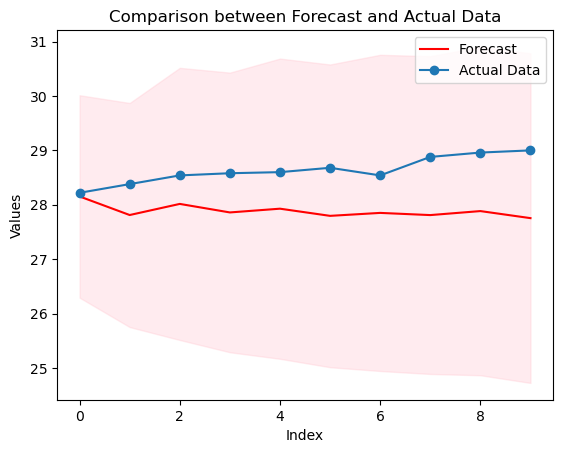

Root Mean Squared Error (RMSE): 0.817514809053018
Weighted Mean Absolute Percentage Error (WMAPE): 2.624788856189999


In [728]:
forecastplusyahoo('KOZAL', 30, 1, 1)

                           price short_name
timestamp                                  
2021-12-27 09:00:00+03:00  17.76      KOZAA
2021-12-27 10:00:00+03:00  18.25      KOZAA
2021-12-27 11:00:00+03:00  18.04      KOZAA
2021-12-27 12:00:00+03:00  17.92      KOZAA
2021-12-27 13:00:00+03:00  18.14      KOZAA
...                          ...        ...
2023-09-22 14:00:00+03:00  64.60      KOZAA
2023-09-22 15:00:00+03:00  64.60      KOZAA
2023-09-22 16:00:00+03:00  64.45      KOZAA
2023-09-22 17:00:00+03:00  64.15      KOZAA
2023-09-22 18:00:00+03:00  64.45      KOZAA

[4324 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
Stock data for KOZAA.IS:
                                 Open        High         Low       Close  \
Datetime                                                                    
2023-09-25 09:30:00+03:00  138.000000  140.199997  138.000000  139.300003   
2023-09-25 10:30:00+03:00  139.399994  140.100006  139.100006  140.100006   
2

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                17890
Model:                ARIMA(30, 3, 1)   Log Likelihood               -1801.296
Date:                Sun, 24 Dec 2023   AIC                           3666.593
Time:                        21:55:42   BIC                           3915.931
Sample:                             0   HQIC                          3748.612
                              - 17890                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9633      0.003   -309.784      0.000      -0.969      -0.957
ar.L2         -0.9478      0.004   -217.776      0.000      -0.956      -0.939
ar.L3         -0.9094      0.006   -148.910      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


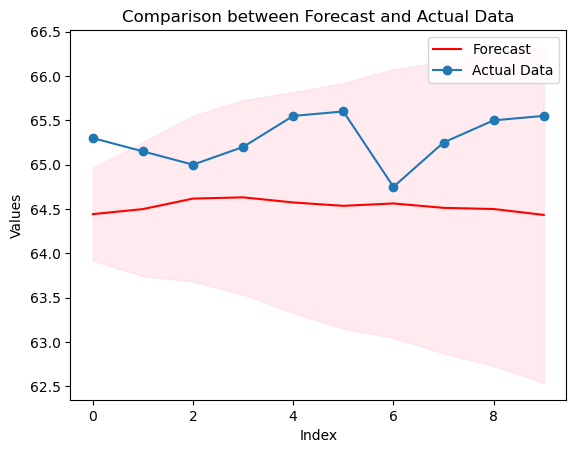

Root Mean Squared Error (RMSE): 0.808649516198752
Weighted Mean Absolute Percentage Error (WMAPE): 1.1550336196433288


In [732]:
forecastplusyahoo('KOZAA', 30, 1, 3)

                            price short_name
timestamp                                   
2021-12-27 09:00:00+03:00   89.90      PGSUS
2021-12-27 10:00:00+03:00   91.65      PGSUS
2021-12-27 11:00:00+03:00   90.35      PGSUS
2021-12-27 12:00:00+03:00   90.15      PGSUS
2021-12-27 13:00:00+03:00   90.30      PGSUS
...                           ...        ...
2023-09-22 14:00:00+03:00  762.50      PGSUS
2023-09-22 15:00:00+03:00  761.60      PGSUS
2023-09-22 16:00:00+03:00  761.40      PGSUS
2023-09-22 17:00:00+03:00  766.20      PGSUS
2023-09-22 18:00:00+03:00  767.20      PGSUS

[4324 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
Stock data for PGSUS.IS:
                                 Open        High         Low       Close  \
Datetime                                                                    
2023-09-25 09:30:00+03:00  138.000000  140.199997  138.000000  139.300003   
2023-09-25 10:30:00+03:00  139.399994  140.100006  139.100006  14

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                17886
Model:                ARIMA(30, 3, 1)   Log Likelihood              -39762.564
Date:                Sun, 24 Dec 2023   AIC                          79589.127
Time:                        21:51:21   BIC                          79838.459
Sample:                             0   HQIC                         79671.145
                              - 17886                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9895      0.002   -423.444      0.000      -0.994      -0.985
ar.L2         -0.9942      0.004   -223.995      0.000      -1.003      -0.985
ar.L3         -0.9731      0.006   -154.602      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


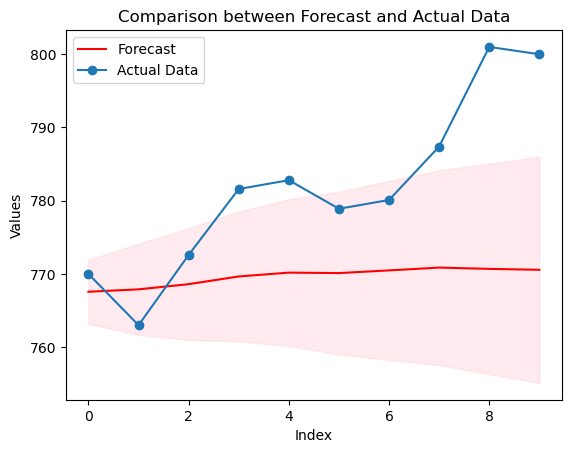

Root Mean Squared Error (RMSE): 16.04938089961804
Weighted Mean Absolute Percentage Error (WMAPE): 1.722789594582363


In [730]:
forecastplusyahoo('PGSUS',30,1,3)

                           price short_name
timestamp                                  
2021-12-27 09:00:00+03:00   8.15      PETKM
2021-12-27 10:00:00+03:00   8.39      PETKM
2021-12-27 11:00:00+03:00   8.25      PETKM
2021-12-27 12:00:00+03:00   8.19      PETKM
2021-12-27 13:00:00+03:00   8.18      PETKM
...                          ...        ...
2023-09-22 14:00:00+03:00  19.75      PETKM
2023-09-22 15:00:00+03:00  19.77      PETKM
2023-09-22 16:00:00+03:00  19.80      PETKM
2023-09-22 17:00:00+03:00  19.95      PETKM
2023-09-22 18:00:00+03:00  19.90      PETKM

[4324 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
Stock data for PETKM.IS:
                                 Open        High         Low       Close  \
Datetime                                                                    
2023-09-25 09:30:00+03:00  138.000000  140.199997  138.000000  139.300003   
2023-09-25 10:30:00+03:00  139.399994  140.100006  139.100006  140.100006   
2

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                17891
Model:                ARIMA(30, 3, 1)   Log Likelihood               21557.981
Date:                Sun, 24 Dec 2023   AIC                         -43051.962
Time:                        21:58:43   BIC                         -42802.622
Sample:                             0   HQIC                        -42969.943
                              - 17891                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0301      0.004   -246.202      0.000      -1.038      -1.022
ar.L2         -0.9590      0.007   -137.228      0.000      -0.973      -0.945
ar.L3         -0.9755      0.010   -100.424      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


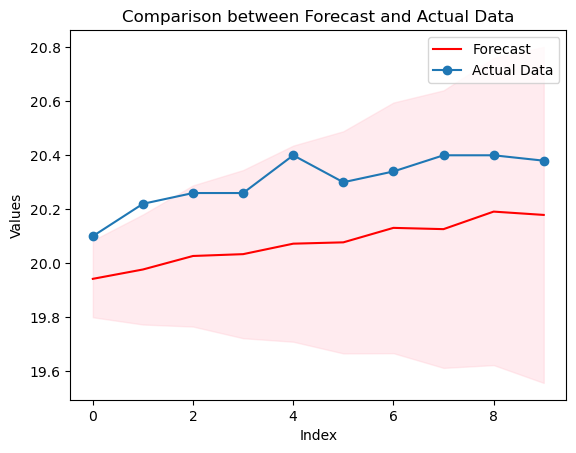

Root Mean Squared Error (RMSE): 0.234597404703211
Weighted Mean Absolute Percentage Error (WMAPE): 1.1579513037803237


In [733]:
forecastplusyahoo('PETKM', 30, 1, 3)

                             price short_name
timestamp                                    
2021-12-27 09:00:00+03:00  12.4338      SAHOL
2021-12-27 10:00:00+03:00  12.5345      SAHOL
2021-12-27 11:00:00+03:00  12.4978      SAHOL
2021-12-27 12:00:00+03:00  12.4978      SAHOL
2021-12-27 13:00:00+03:00  12.5985      SAHOL
...                            ...        ...
2023-09-22 14:00:00+03:00  56.5000      SAHOL
2023-09-22 15:00:00+03:00  56.5000      SAHOL
2023-09-22 16:00:00+03:00  56.7000      SAHOL
2023-09-22 17:00:00+03:00  56.4000      SAHOL
2023-09-22 18:00:00+03:00  56.5000      SAHOL

[4324 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
Stock data for SAHOL.IS:
                                 Open        High         Low       Close  \
Datetime                                                                    
2023-09-25 09:30:00+03:00  138.000000  140.199997  138.000000  139.300003   
2023-09-25 10:30:00+03:00  139.399994  140.100006  1

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                17890
Model:                ARIMA(30, 3, 1)   Log Likelihood               -2969.986
Date:                Sun, 24 Dec 2023   AIC                           6003.972
Time:                        22:16:28   BIC                           6253.310
Sample:                             0   HQIC                          6085.991
                              - 17890                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6593      0.004   -378.645      0.000      -1.668      -1.651
ar.L2         -1.6006      0.010   -165.187      0.000      -1.620      -1.582
ar.L3         -1.6381      0.014   -113.783      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


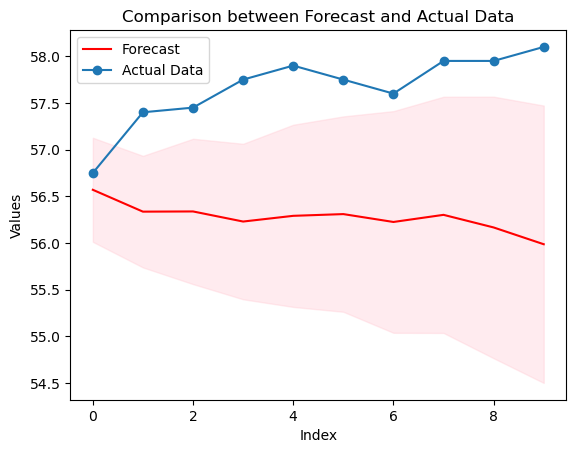

Root Mean Squared Error (RMSE): 1.470576171892774
Weighted Mean Absolute Percentage Error (WMAPE): 2.401040004672276


In [740]:
forecastplusyahoo('SAHOL', 30, 1, 3)

                             price short_name
timestamp                                    
2021-12-27 09:00:00+03:00  10.5956       SASA
2021-12-27 10:00:00+03:00  11.0217       SASA
2021-12-27 11:00:00+03:00  11.0108       SASA
2021-12-27 12:00:00+03:00  11.0326       SASA
2021-12-27 13:00:00+03:00  11.0108       SASA
...                            ...        ...
2023-09-22 14:00:00+03:00  45.6800       SASA
2023-09-22 15:00:00+03:00  45.5400       SASA
2023-09-22 16:00:00+03:00  45.5600       SASA
2023-09-22 17:00:00+03:00  45.5200       SASA
2023-09-22 18:00:00+03:00  45.5200       SASA

[4322 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
Stock data for SASA.IS:
                                 Open        High         Low       Close  \
Datetime                                                                    
2023-09-25 09:30:00+03:00  138.000000  140.199997  138.000000  139.300003   
2023-09-25 10:30:00+03:00  139.399994  140.100006  13

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                17888
Model:                ARIMA(30, 1, 1)   Log Likelihood               -4762.682
Date:                Sun, 24 Dec 2023   AIC                           9589.363
Time:                        22:04:22   BIC                           9838.702
Sample:                             0   HQIC                          9671.382
                              - 17888                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1017      0.004   -261.275      0.000      -1.110      -1.093
ar.L2         -0.1216      0.005    -25.825      0.000      -0.131      -0.112
ar.L3         -0.0341      0.005     -6.279      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


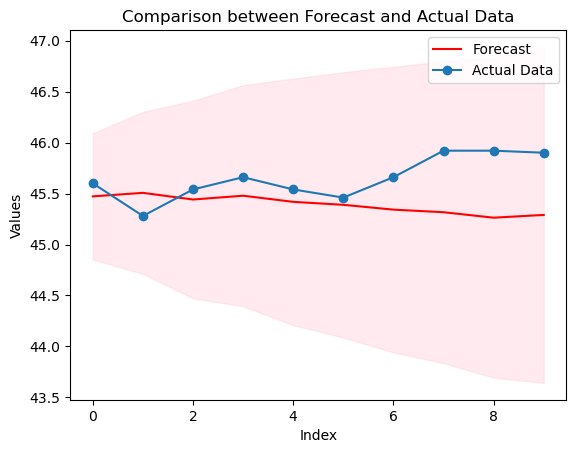

Root Mean Squared Error (RMSE): 0.37404949455119474
Weighted Mean Absolute Percentage Error (WMAPE): 0.6144695962537068


In [735]:
forecastplusyahoo('SASA', 30, 1, 1)

                             price short_name
timestamp                                    
2021-12-27 09:00:00+03:00  13.3510       SISE
2021-12-27 10:00:00+03:00  13.5826       SISE
2021-12-27 11:00:00+03:00  13.4379       SISE
2021-12-27 12:00:00+03:00  13.4282       SISE
2021-12-27 13:00:00+03:00  13.4186       SISE
...                            ...        ...
2023-09-22 14:00:00+03:00  52.9000       SISE
2023-09-22 15:00:00+03:00  52.7500       SISE
2023-09-22 16:00:00+03:00  53.3000       SISE
2023-09-22 17:00:00+03:00  54.7000       SISE
2023-09-22 18:00:00+03:00  54.7000       SISE

[4324 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
Stock data for SISE.IS:
                                 Open        High         Low       Close  \
Datetime                                                                    
2023-09-25 09:30:00+03:00  138.000000  140.199997  138.000000  139.300003   
2023-09-25 10:30:00+03:00  139.399994  140.100006  13

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                17890
Model:                ARIMA(30, 1, 1)   Log Likelihood                3464.199
Date:                Sun, 24 Dec 2023   AIC                          -6864.398
Time:                        22:07:13   BIC                          -6615.056
Sample:                             0   HQIC                         -6782.378
                              - 17890                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1915      0.005   -251.046      0.000      -1.201      -1.182
ar.L2         -0.1777      0.004    -40.023      0.000      -0.186      -0.169
ar.L3          0.0014      0.006      0.246      0.8

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


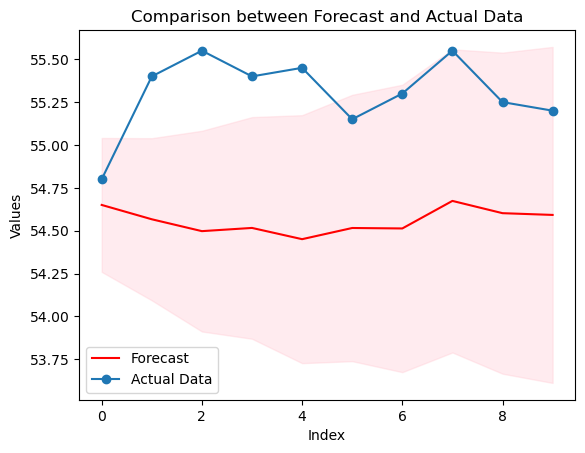

Root Mean Squared Error (RMSE): 0.7865079316180594
Weighted Mean Absolute Percentage Error (WMAPE): 1.3513770747596507


In [736]:
forecastplusyahoo('SISE', 30, 1, 1)

                            price short_name
timestamp                                   
2021-12-27 09:00:00+03:00   33.24      TAVHL
2021-12-27 10:00:00+03:00   33.68      TAVHL
2021-12-27 11:00:00+03:00   33.36      TAVHL
2021-12-27 12:00:00+03:00   33.20      TAVHL
2021-12-27 13:00:00+03:00   33.20      TAVHL
...                           ...        ...
2023-09-22 14:00:00+03:00  118.70      TAVHL
2023-09-22 15:00:00+03:00  118.70      TAVHL
2023-09-22 16:00:00+03:00  118.80      TAVHL
2023-09-22 17:00:00+03:00  119.20      TAVHL
2023-09-22 18:00:00+03:00  119.20      TAVHL

[4324 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
Stock data for TAVHL.IS:
                                 Open        High         Low       Close  \
Datetime                                                                    
2023-09-25 09:30:00+03:00  138.000000  140.199997  138.000000  139.300003   
2023-09-25 10:30:00+03:00  139.399994  140.100006  139.100006  14

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                17890
Model:                ARIMA(30, 3, 1)   Log Likelihood               -8407.569
Date:                Sun, 24 Dec 2023   AIC                          16879.137
Time:                        22:20:36   BIC                          17128.476
Sample:                             0   HQIC                         16961.157
                              - 17890                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9868      0.003   -305.198      0.000      -0.993      -0.980
ar.L2         -0.9750      0.005   -191.263      0.000      -0.985      -0.965
ar.L3         -0.9487      0.007   -131.083      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


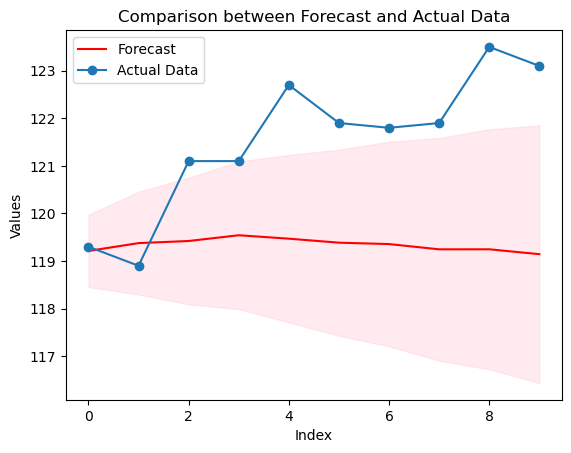

Root Mean Squared Error (RMSE): 2.6269712520375847
Weighted Mean Absolute Percentage Error (WMAPE): 1.886995552488141


In [741]:
forecastplusyahoo('TAVHL', 30, 1, 3)

                             price short_name
timestamp                                    
2021-12-27 09:00:00+03:00  19.0042      TKFEN
2021-12-27 10:00:00+03:00  19.1636      TKFEN
2021-12-27 11:00:00+03:00  18.8271      TKFEN
2021-12-27 12:00:00+03:00  18.7563      TKFEN
2021-12-27 13:00:00+03:00  18.7563      TKFEN
...                            ...        ...
2023-09-22 14:00:00+03:00  52.3000      TKFEN
2023-09-22 15:00:00+03:00  52.2000      TKFEN
2023-09-22 16:00:00+03:00  51.8000      TKFEN
2023-09-22 17:00:00+03:00  52.0000      TKFEN
2023-09-22 18:00:00+03:00  52.0000      TKFEN

[4324 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
Stock data for TKFEN.IS:
                                 Open        High         Low       Close  \
Datetime                                                                    
2023-09-25 09:30:00+03:00  138.000000  140.199997  138.000000  139.300003   
2023-09-25 10:30:00+03:00  139.399994  140.100006  1

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                17891
Model:                ARIMA(30, 1, 1)   Log Likelihood              -11183.700
Date:                Sun, 24 Dec 2023   AIC                          22431.399
Time:                        22:10:23   BIC                          22680.743
Sample:                             0   HQIC                         22513.419
                              - 17891                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4903      0.276     -1.775      0.076      -1.032       0.051
ar.L2          0.2500      0.257      0.974      0.330      -0.253       0.753
ar.L3          0.0211      0.044      0.484      0.6

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


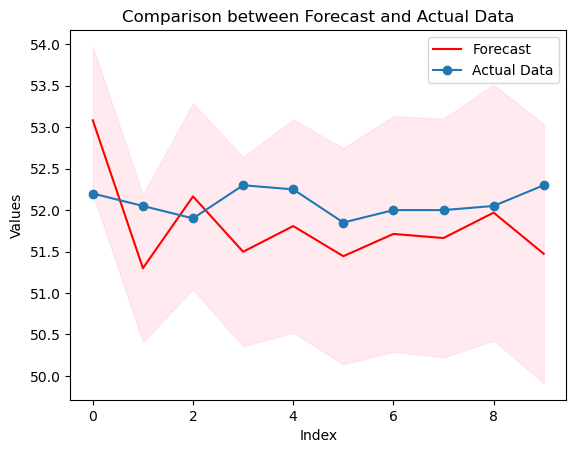

Root Mean Squared Error (RMSE): 0.5749518552037074
Weighted Mean Absolute Percentage Error (WMAPE): 0.9672679786837399


In [738]:
forecastplusyahoo('TKFEN', 30, 1, 1)

                              price short_name
timestamp                                     
2021-12-27 09:00:00+03:00   19.6507      TUPRS
2021-12-27 10:00:00+03:00   20.4990      TUPRS
2021-12-27 11:00:00+03:00   20.2331      TUPRS
2021-12-27 12:00:00+03:00   19.9926      TUPRS
2021-12-27 13:00:00+03:00   20.0052      TUPRS
...                             ...        ...
2023-09-22 14:00:00+03:00  145.8839      TUPRS
2023-09-22 15:00:00+03:00  147.0288      TUPRS
2023-09-22 16:00:00+03:00  147.8875      TUPRS
2023-09-22 17:00:00+03:00  148.0784      TUPRS
2023-09-22 18:00:00+03:00  147.0288      TUPRS

[4324 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
Stock data for TUPRS.IS:
                                 Open        High         Low       Close  \
Datetime                                                                    
2023-09-25 09:30:00+03:00  138.000000  140.199997  138.000000  139.300003   
2023-09-25 10:30:00+03:00  139.399994  

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                17891
Model:                ARIMA(30, 3, 1)   Log Likelihood              -24997.129
Date:                Sun, 24 Dec 2023   AIC                          50058.258
Time:                        22:13:30   BIC                          50307.599
Sample:                             0   HQIC                         50140.278
                              - 17891                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9439      0.011   -184.448      0.000      -1.965      -1.923
ar.L2         -2.0630      0.030    -69.270      0.000      -2.121      -2.005
ar.L3         -1.9327      0.049    -39.638      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


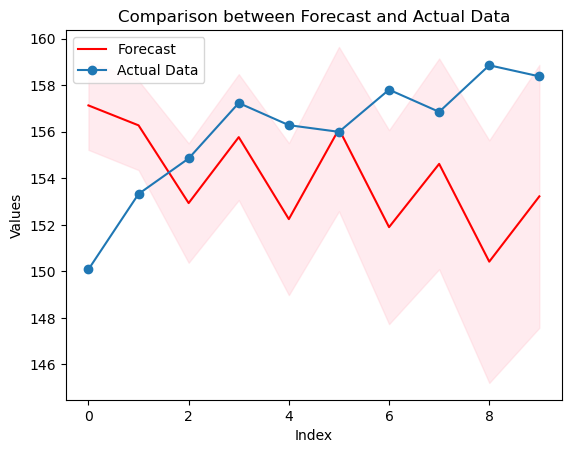

Root Mean Squared Error (RMSE): 4.674016512569116
Weighted Mean Absolute Percentage Error (WMAPE): 2.0122977706869536


In [739]:
forecastplusyahoo('TUPRS',30,1,3)

                             price short_name
timestamp                                    
2021-12-27 09:00:00+03:00   9.3416      TTKOM
2021-12-27 10:00:00+03:00   9.3416      TTKOM
2021-12-27 11:00:00+03:00   9.3061      TTKOM
2021-12-27 12:00:00+03:00   9.2795      TTKOM
2021-12-27 13:00:00+03:00   9.3061      TTKOM
...                            ...        ...
2023-09-22 14:00:00+03:00  23.2200      TTKOM
2023-09-22 15:00:00+03:00  23.1800      TTKOM
2023-09-22 16:00:00+03:00  23.2200      TTKOM
2023-09-22 17:00:00+03:00  23.2000      TTKOM
2023-09-22 18:00:00+03:00  23.1800      TTKOM

[4324 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
Stock data for TTKOM.IS:
                                 Open        High         Low       Close  \
Datetime                                                                    
2023-09-25 09:30:00+03:00  138.000000  140.199997  138.000000  139.300003   
2023-09-25 10:30:00+03:00  139.399994  140.100006  1

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                17891
Model:                ARIMA(30, 3, 1)   Log Likelihood               11772.101
Date:                Sun, 24 Dec 2023   AIC                         -23480.202
Time:                        22:30:19   BIC                         -23230.862
Sample:                             0   HQIC                        -23398.183
                              - 17891                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2435      0.004   -303.873      0.000      -1.252      -1.236
ar.L2         -1.2185      0.008   -146.330      0.000      -1.235      -1.202
ar.L3         -1.2852      0.012   -111.606      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


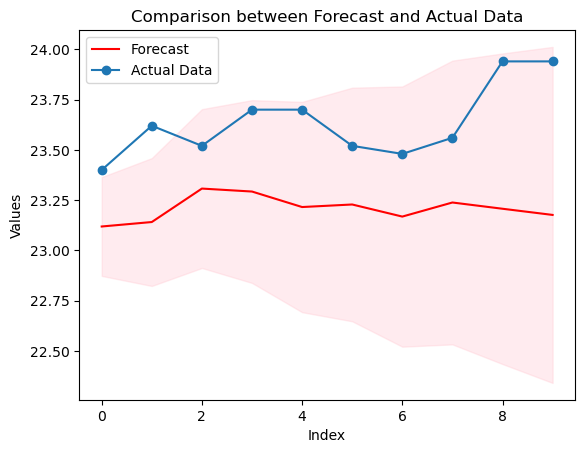

Root Mean Squared Error (RMSE): 0.46467470284892237
Weighted Mean Absolute Percentage Error (WMAPE): 1.812765818379819


In [745]:
forecastplusyahoo('TTKOM', 30, 1, 3)

                             price short_name
timestamp                                    
2021-12-27 09:00:00+03:00  18.8440      TCELL
2021-12-27 10:00:00+03:00  18.9601      TCELL
2021-12-27 11:00:00+03:00  18.7569      TCELL
2021-12-27 12:00:00+03:00  18.7182      TCELL
2021-12-27 13:00:00+03:00  18.7763      TCELL
...                            ...        ...
2023-09-22 14:00:00+03:00  54.4000      TCELL
2023-09-22 15:00:00+03:00  54.5000      TCELL
2023-09-22 16:00:00+03:00  54.5500      TCELL
2023-09-22 17:00:00+03:00  54.1000      TCELL
2023-09-22 18:00:00+03:00  54.4500      TCELL

[4324 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
Stock data for TCELL.IS:
                                 Open        High         Low       Close  \
Datetime                                                                    
2023-09-25 09:30:00+03:00  138.000000  140.199997  138.000000  139.300003   
2023-09-25 10:30:00+03:00  139.399994  140.100006  1

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                17891
Model:                ARIMA(30, 1, 1)   Log Likelihood                3489.444
Date:                Sun, 24 Dec 2023   AIC                          -6914.888
Time:                        22:26:11   BIC                          -6665.544
Sample:                             0   HQIC                         -6832.868
                              - 17891                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0701      0.005   -223.985      0.000      -1.079      -1.061
ar.L2         -0.1050      0.005    -22.096      0.000      -0.114      -0.096
ar.L3         -0.0284      0.005     -6.158      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


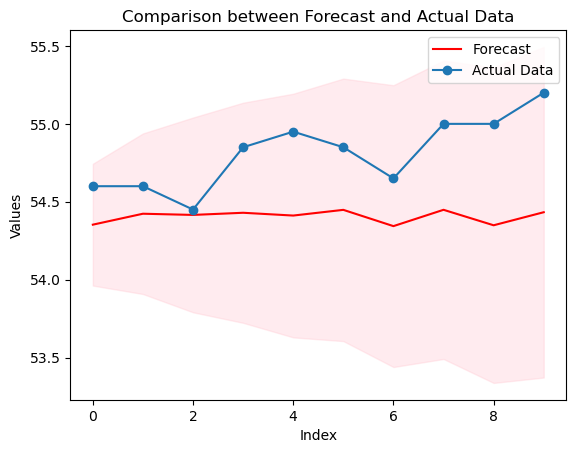

Root Mean Squared Error (RMSE): 0.46163604567845706
Weighted Mean Absolute Percentage Error (WMAPE): 0.7468662607384804


In [743]:
forecastplusyahoo('TCELL', 30, 1, 1)

                           price short_name
timestamp                                  
2021-12-27 09:00:00+03:00   4.78      HALKB
2021-12-27 10:00:00+03:00   4.80      HALKB
2021-12-27 11:00:00+03:00   4.78      HALKB
2021-12-27 12:00:00+03:00   4.78      HALKB
2021-12-27 13:00:00+03:00   4.78      HALKB
...                          ...        ...
2023-09-22 14:00:00+03:00  15.36      HALKB
2023-09-22 15:00:00+03:00  15.32      HALKB
2023-09-22 16:00:00+03:00  15.32      HALKB
2023-09-22 17:00:00+03:00  15.20      HALKB
2023-09-22 18:00:00+03:00  15.23      HALKB

[4324 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
Stock data for HALKB.IS:
                                 Open        High         Low       Close  \
Datetime                                                                    
2023-09-25 09:30:00+03:00  138.000000  140.199997  138.000000  139.300003   
2023-09-25 10:30:00+03:00  139.399994  140.100006  139.100006  140.100006   
2

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                17890
Model:                ARIMA(30, 3, 1)   Log Likelihood               20270.570
Date:                Sun, 24 Dec 2023   AIC                         -40477.139
Time:                        22:34:03   BIC                         -40227.800
Sample:                             0   HQIC                        -40395.120
                              - 17890                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0194      0.004   -256.005      0.000      -1.027      -1.012
ar.L2         -0.9272      0.007   -136.216      0.000      -0.940      -0.914
ar.L3         -0.9346      0.009   -108.890      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


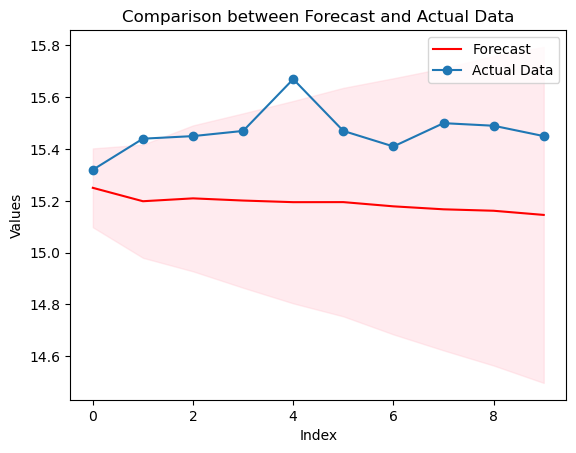

Root Mean Squared Error (RMSE): 0.29304138553825776
Weighted Mean Absolute Percentage Error (WMAPE): 1.7885766417985445


In [746]:
forecastplusyahoo('HALKB', 30, 1, 3)

                             price short_name
timestamp                                    
2021-12-27 09:00:00+03:00   3.1299      ISCTR
2021-12-27 10:00:00+03:00   3.1702      ISCTR
2021-12-27 11:00:00+03:00   3.1823      ISCTR
2021-12-27 12:00:00+03:00   3.1984      ISCTR
2021-12-27 13:00:00+03:00   3.1864      ISCTR
...                            ...        ...
2023-09-22 14:00:00+03:00  24.2400      ISCTR
2023-09-22 15:00:00+03:00  24.0800      ISCTR
2023-09-22 16:00:00+03:00  24.7800      ISCTR
2023-09-22 17:00:00+03:00  24.9600      ISCTR
2023-09-22 18:00:00+03:00  24.9000      ISCTR

[4324 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
Stock data for ISCTR.IS:
                                 Open        High         Low       Close  \
Datetime                                                                    
2023-09-25 09:30:00+03:00  138.000000  140.199997  138.000000  139.300003   
2023-09-25 10:30:00+03:00  139.399994  140.100006  1

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                17891
Model:                ARIMA(30, 1, 1)   Log Likelihood               12847.278
Date:                Sun, 24 Dec 2023   AIC                         -25630.557
Time:                        22:36:52   BIC                         -25381.213
Sample:                             0   HQIC                        -25548.537
                              - 17891                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4334      0.104     -4.173      0.000      -0.637      -0.230
ar.L2          0.2290      0.075      3.041      0.002       0.081       0.377
ar.L3         -0.0700      0.005    -14.434      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


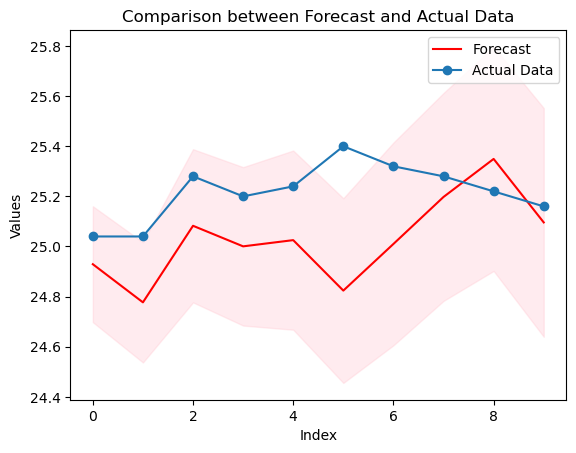

Root Mean Squared Error (RMSE): 0.25718235592753785
Weighted Mean Absolute Percentage Error (WMAPE): 0.9003640330858422


In [747]:
forecastplusyahoo('ISCTR', 30, 1, 1)

                           price short_name
timestamp                                  
2021-12-27 09:00:00+03:00   3.86      VAKBN
2021-12-27 10:00:00+03:00   3.87      VAKBN
2021-12-27 11:00:00+03:00   3.86      VAKBN
2021-12-27 12:00:00+03:00   3.86      VAKBN
2021-12-27 13:00:00+03:00   3.85      VAKBN
...                          ...        ...
2023-09-22 14:00:00+03:00  13.58      VAKBN
2023-09-22 15:00:00+03:00  13.53      VAKBN
2023-09-22 16:00:00+03:00  13.56      VAKBN
2023-09-22 17:00:00+03:00  13.49      VAKBN
2023-09-22 18:00:00+03:00  13.50      VAKBN

[4324 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
Stock data for VAKBN.IS:
                                 Open        High         Low       Close  \
Datetime                                                                    
2023-09-25 09:30:00+03:00  138.000000  140.199997  138.000000  139.300003   
2023-09-25 10:30:00+03:00  139.399994  140.100006  139.100006  140.100006   
2

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                17890
Model:                ARIMA(30, 3, 1)   Log Likelihood               23168.626
Date:                Sun, 24 Dec 2023   AIC                         -46273.252
Time:                        22:47:21   BIC                         -46023.913
Sample:                             0   HQIC                        -46191.233
                              - 17890                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0633      0.004   -287.864      0.000      -1.071      -1.056
ar.L2         -0.9828      0.006   -172.024      0.000      -0.994      -0.972
ar.L3         -0.9560      0.007   -128.643      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


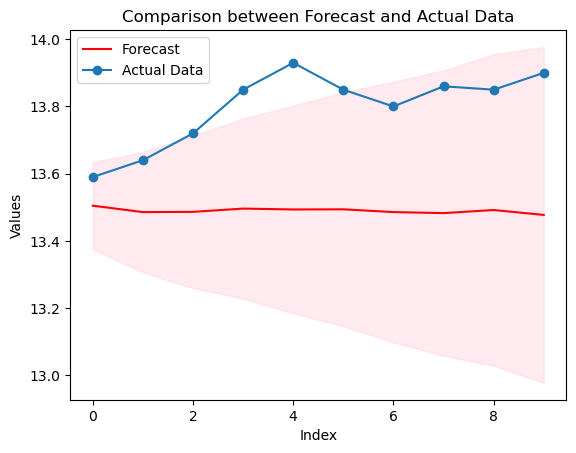

Root Mean Squared Error (RMSE): 0.3281600088901808
Weighted Mean Absolute Percentage Error (WMAPE): 2.241505848139771


In [752]:
forecastplusyahoo('VAKBN', 30, 1, 3)

                           price short_name
timestamp                                  
2021-12-27 09:00:00+03:00  24.94      VESTL
2021-12-27 10:00:00+03:00  25.44      VESTL
2021-12-27 11:00:00+03:00  25.16      VESTL
2021-12-27 12:00:00+03:00  24.98      VESTL
2021-12-27 13:00:00+03:00  25.08      VESTL
...                          ...        ...
2023-09-22 14:00:00+03:00  63.10      VESTL
2023-09-22 15:00:00+03:00  62.55      VESTL
2023-09-22 16:00:00+03:00  64.15      VESTL
2023-09-22 17:00:00+03:00  64.20      VESTL
2023-09-22 18:00:00+03:00  64.10      VESTL

[4324 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
Stock data for VESTL.IS:
                                 Open        High         Low       Close  \
Datetime                                                                    
2023-09-25 09:30:00+03:00  138.000000  140.199997  138.000000  139.300003   
2023-09-25 10:30:00+03:00  139.399994  140.100006  139.100006  140.100006   
2

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                17890
Model:                ARIMA(30, 1, 1)   Log Likelihood               -2459.988
Date:                Sun, 24 Dec 2023   AIC                           4983.975
Time:                        22:38:08   BIC                           5233.317
Sample:                             0   HQIC                          5065.995
                              - 17890                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0023      8.536      0.000      1.000     -16.728      16.732
ar.L2         -0.0468      0.043     -1.092      0.275      -0.131       0.037
ar.L3          0.0068      0.399      0.017      0.9

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


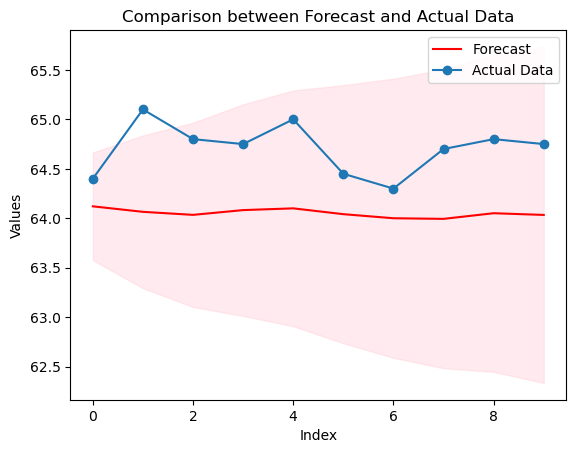

Root Mean Squared Error (RMSE): 0.6939838468610346
Weighted Mean Absolute Percentage Error (WMAPE): 1.0082760508349327


In [749]:
forecastplusyahoo('VESTL', 30, 1, 1)

                             price short_name
timestamp                                    
2021-12-27 09:00:00+03:00   3.1711      YKBNK
2021-12-27 10:00:00+03:00   3.2338      YKBNK
2021-12-27 11:00:00+03:00   3.2517      YKBNK
2021-12-27 12:00:00+03:00   3.2517      YKBNK
2021-12-27 13:00:00+03:00   3.2517      YKBNK
...                            ...        ...
2023-09-22 14:00:00+03:00  16.9100      YKBNK
2023-09-22 15:00:00+03:00  16.9300      YKBNK
2023-09-22 16:00:00+03:00  16.9900      YKBNK
2023-09-22 17:00:00+03:00  16.8100      YKBNK
2023-09-22 18:00:00+03:00  16.8000      YKBNK

[4324 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
Stock data for YKBNK.IS:
                                 Open        High         Low       Close  \
Datetime                                                                    
2023-09-25 09:30:00+03:00  138.000000  140.199997  138.000000  139.300003   
2023-09-25 10:30:00+03:00  139.399994  140.100006  1

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                17889
Model:                ARIMA(30, 1, 1)   Log Likelihood               14652.148
Date:                Sun, 24 Dec 2023   AIC                         -29240.297
Time:                        22:41:01   BIC                         -28990.957
Sample:                             0   HQIC                        -29158.277
                              - 17889                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4517      0.145     -3.114      0.002      -0.736      -0.167
ar.L2          0.2383      0.120      1.989      0.047       0.003       0.473
ar.L3         -0.0276      0.011     -2.464      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


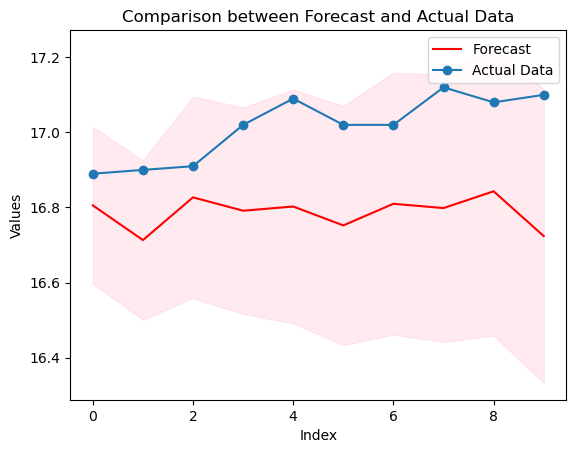

Root Mean Squared Error (RMSE): 0.2451176952008188
Weighted Mean Absolute Percentage Error (WMAPE): 1.3418506846792075


In [750]:
forecastplusyahoo('YKBNK', 30, 1, 1)

In [16]:
def forecastplusyahoo(name,p,d,q):
    
    global forecast_values_dict  
    
    train1 = pd.concat([data17, data18, data19, data20, data21, data22, data23])
    test = data24

    hourly_data = train1[train1['short_name'] == name]
    print(hourly_data)
    company_tickers = [f'{name}.IS']  # Add more ticker symbols as needed

    # Fetching data for each company in the list
    for ticker_symbol in company_tickers:
        half_hourly_data = yf.download(ticker_symbol, start='2021-12-27', end='2023-09-24', interval='1h')
        #print(f"Stock data for {ticker_symbol}:\n{stock_data}\n")  # Display or save the retrieved stock data

    # Extract 'Close' column from half-hourly data
    hourly_price = hourly_data['price']
    half_hourly_close = half_hourly_data['Close']


    # Combine the close values from half-hourly data with hourly data
    combined_data = pd.concat([hourly_price, half_hourly_close], axis=1)
    combined_data.columns = ['price', 'Close']  # Rename columns for clarity

    # Update 'price' with 'Close' values where 'Close' is not NaN
    combined_data['price'] = combined_data['Close'].where(combined_data['Close'].notnull(), combined_data['price'])
    combined_data.drop(columns='Close', inplace=True)

    # Print the combined data
    print(combined_data.head(50))

    train2 = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12, data13, data14, data15, data16])

    hourly2 = train2[train2['short_name'] == name]
    hourly2 = hourly2.drop(columns=['short_name'])

    company_2_data = pd.concat([hourly2, combined_data])

    print(company_2_data.tail(30))

    company_2_datat = test[test['short_name'] == name]
    company_2_datat = company_2_datat.drop(columns=['short_name'])
    company_2_datatest = company_2_datat
    mean_first_10 = company_2_datatest.head(10).mean()
    print("Mean of the first 10 values:", mean_first_10)

    print(company_2_datatest.head(10))
    from statsmodels.tsa.stattools import adfuller
    ##stationary yapma

    company_2_stationary = company_2_data.diff().dropna()
    print(company_2_stationary)

    # Assuming 'data' is your time series data
    resultxx = adfuller(company_2_stationary)
    print('ADF Statistic:', resultxx[0])
    print('p-value:', resultxx[1])
    print('Critical Values:', resultxx[4])

    # stationary check, it is stationary(ADF lower than critical values and p-value close to 0)

    model = ARIMA(company_2_data, order=(p, q, d))
    results = model.fit()
    print(results.summary())

    forecast = results.get_prediction(start=len(company_2_data), end=len(company_2_data) + 9)
    mean_forecast = forecast.predicted_mean
    confidence_intervals = forecast.conf_int()
    lower_limits = confidence_intervals.loc[:, 'lower price']
    upper_limits = confidence_intervals.loc[:, 'upper price']

    print(mean_forecast)
    print(confidence_intervals)

    # Assuming 'lower_limits' and 'upper_limits' contain the corresponding confidence intervals
    # Assuming 'company_1_data2' contains your second dataset

    plt.figure()

    # Plotting the forecasted values and confidence intervals
    plt.plot(mean_forecast.values, color='red', label='Forecast')
    plt.fill_between(range(len(mean_forecast)), lower_limits, upper_limits, color='pink', alpha=0.3)

    # Plotting the first 25 points of company_1_data2 as 'Actual Data'
    plt.plot(range(10), company_2_datatest.iloc[:10], label='Actual Data', marker='o')  # Adjust the slicing as needed

    plt.xlabel('Index')  # Update with appropriate label
    plt.ylabel('Values')  # Update with appropriate label
    plt.title('Comparison between Forecast and Actual Data')
    plt.legend()
    plt.show()

    from sklearn.metrics import mean_squared_error
    import numpy as np

    # Assuming 'actual_data' contains your actual data and 'mean_forecast' contains the mean forecast
    # Convert 'actual_data' and 'mean_forecast' to numpy arrays if they are not already
    actual_values = np.array(company_2_datatest.iloc[:10])
    forecast_values = np.array(mean_forecast)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(actual_values, forecast_values))
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    
    # Calculate WMAPE
    weights = np.ones(len(actual_values))  # You can assign different weights if needed
    wmape = (np.sum(weights * np.abs(actual_values - forecast_values)) / np.sum(weights * actual_values)) * 100
    print(f"Weighted Mean Absolute Percentage Error (WMAPE): {wmape}")
    
    forecast_values_dict[name] = forecast_values


In [751]:
forecast_values_dict

{'DOHOL': array([13.01306449, 13.04257918, 13.02973437, 13.07453275, 13.02937603,
        13.05913917, 13.04881921, 13.082186  , 13.03374603, 13.00613119]),
 'THYAO': array([226.13101751, 226.26852833, 226.42032994, 226.6087945 ,
        226.70787386, 226.59144776, 226.55427092, 226.54366528,
        226.41961549, 226.23183637]),
 'AKBNK': array([30.80978808, 30.63629036, 30.88432712, 30.75440825, 30.75042825,
        30.68261854, 30.87246131, 30.82266251, 30.87164805, 30.64957291]),
 'ARCLK': array([155.06442848, 155.4578826 , 154.13914292, 156.07072694,
        153.92670687, 156.1784913 , 153.63655976, 156.44945324,
        153.92343616, 156.39371036]),
 'ASELS': array([40.62093168, 40.72080647, 40.7926436 , 40.8386505 , 40.84498468,
        40.92750797, 40.99724979, 41.0857884 , 41.16063593, 41.22911896]),
 'BIMAS': array([273.54756357, 272.9005355 , 272.51219702, 272.84021062,
        273.0163417 , 273.29856892, 272.83809248, 272.99803782,
        273.1449719 , 272.82298172]),
 'EK

<span style="color:red">**Next, I have updated the up to date data in submission stage. I have made an another function since there is no test data now. Also, the yahoo finance data in the function code is updated every day since it can only give the last 2 years of data. I have also changed the parameters of those companies where the model overpredicted to 2,1,1 here.**</span>


In [3]:
#UP TO DATE DATA

import pandas as pd
data24= pd.read_csv('20230925_20231120_bist30.csv', index_col='timestamp', parse_dates=True)
data25=pd.read_csv('20231121_20231209_bist30.csv', index_col='timestamp', parse_dates=True)
data26= pd.read_csv('Daily_Series - 20231210_20240111.csv', index_col='timestamp', parse_dates=True)
print(data25.tail(50))
submissions= {}
 

                           price short_name
timestamp                                  
2023-12-04 09:00:00+03:00  19.83      YKBNK
2023-12-04 10:00:00+03:00  19.82      YKBNK
2023-12-04 11:00:00+03:00  19.78      YKBNK
2023-12-04 12:00:00+03:00  19.86      YKBNK
2023-12-04 13:00:00+03:00  19.78      YKBNK
2023-12-04 14:00:00+03:00  19.83      YKBNK
2023-12-04 15:00:00+03:00  19.90      YKBNK
2023-12-04 16:00:00+03:00  20.22      YKBNK
2023-12-04 17:00:00+03:00  20.50      YKBNK
2023-12-04 18:00:00+03:00  20.52      YKBNK
2023-12-05 09:00:00+03:00  20.42      YKBNK
2023-12-05 10:00:00+03:00  20.40      YKBNK
2023-12-05 11:00:00+03:00  20.34      YKBNK
2023-12-05 12:00:00+03:00  20.48      YKBNK
2023-12-05 13:00:00+03:00  20.32      YKBNK
2023-12-05 14:00:00+03:00  20.40      YKBNK
2023-12-05 15:00:00+03:00  20.32      YKBNK
2023-12-05 16:00:00+03:00  20.30      YKBNK
2023-12-05 17:00:00+03:00  20.24      YKBNK
2023-12-05 18:00:00+03:00  20.28      YKBNK
2023-12-06 09:00:00+03:00  20.28

In [4]:
## updating the code everyday (data26 changes every day, and yahoofinance data can only have 2 years of data so updating its date is also necessary)

def forecastfinal(name,p,d,q):
    
    global submissions
    
    train1 = pd.concat([data17, data18, data19, data20, data21, data22, data23, data24,data25,data26])
  

    hourly_data = train1[train1['short_name'] == name]
    print(hourly_data)
    company_tickers = [f'{name}.IS']  # Add more ticker symbols as needed

    # Fetching data for each company in the list
    for ticker_symbol in company_tickers:
        half_hourly_data = yf.download(ticker_symbol, start='2022-01-12', end='2024-01-12', interval='1h')
          # Display or save the retrieved stock data

    # Extract 'Close' column from half-hourly data
    hourly_price = hourly_data['price']
    half_hourly_close = half_hourly_data['Close']
    
    ######
    #UPDATING NEW DATA EVERYDAY!!!
    ###########
    
   # new=yf.download(f'{name}.IS', start='2023-12-23', end='2023-12-26', interval='1h')
    #new=new['Adj Close']
    
    
    
    # Combine the close values from half-hourly data with hourly data
    combined_data = pd.concat([hourly_price, half_hourly_close], axis=1)
   

    # Update 'price' with 'Close' values where 'Close' is not NaN
    combined_data['price'] = combined_data['Close'].where(combined_data['Close'].notnull(), combined_data['price'])
    #combined_data['price'] = combined_data['Adj Close'].where(combined_data['Adj Close'].notnull(), combined_data['price'])
    combined_data=combined_data['price']

    # Print the combined data
    print(combined_data.head(50))

    train2 = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12, data13, data14, data15, data16])

    hourly2 = train2[train2['short_name'] == name]
    hourly2 = hourly2['price']
    
   

    company_2_data = pd.concat([hourly2, combined_data])

  
    print(company_2_data.tail(30))


    from statsmodels.tsa.stattools import adfuller
    ##stationary yapma

    company_2_stationary = company_2_data.diff().dropna()
    print(company_2_stationary)

    # Assuming 'data' is your time series data
    resultxx = adfuller(company_2_stationary)
    print('ADF Statistic:', resultxx[0])
    print('p-value:', resultxx[1])
    print('Critical Values:', resultxx[4])

    # stationary check, it is stationary(ADF lower than critical values and p-value close to 0)

    model = ARIMA(company_2_data, order=(p, q, d))
    results = model.fit()
    print(results.summary())

    forecast = results.get_prediction(start=len(company_2_data), end=len(company_2_data) + 9)
    mean_forecast = forecast.predicted_mean
    confidence_intervals = forecast.conf_int()
    lower_limits = confidence_intervals.loc[:, 'lower price']
    upper_limits = confidence_intervals.loc[:, 'upper price']

    forecast_values = np.array(mean_forecast)
    
    print(mean_forecast)
    print(confidence_intervals)

    # Assuming 'lower_limits' and 'upper_limits' contain the corresponding confidence intervals
    # Assuming 'company_1_data2' contains your second dataset

    
    
    submissions[name] = forecast_values


In [5]:
forecastfinal('THYAO', 30, 1, 3)
forecastfinal('AKBNK', 30, 1, 1)
forecastfinal('ARCLK', 30, 1, 1)
forecastfinal('ASELS', 30, 1, 3)
forecastfinal('BIMAS', 30, 1, 1)
forecastfinal('DOHOL', 2, 1, 1)
forecastfinal('EKGYO', 2, 1, 1)
forecastfinal('EREGL', 30, 1, 3)
forecastfinal('FROTO', 30, 1, 1)
forecastfinal('GUBRF', 30, 1, 3)
forecastfinal('GARAN', 30, 1, 1)
forecastfinal('KRDMD', 30, 1, 3)
forecastfinal('KCHOL', 30, 1, 3)
forecastfinal('KOZAL', 30, 1, 1)
forecastfinal('KOZAA', 30, 1, 3)
forecastfinal('PGSUS', 30, 1, 3)
forecastfinal('PETKM', 30, 1, 3)
forecastfinal('SAHOL', 30, 1, 1)
forecastfinal('SASA', 30, 1, 1)
forecastfinal('SISE', 30, 1, 1)
forecastfinal('TAVHL', 30, 1, 3)
forecastfinal('TKFEN', 30, 1, 1)
forecastfinal('TUPRS', 30, 1, 3)
forecastfinal('TTKOM', 30, 1, 3)
forecastfinal('TCELL', 30, 1, 1)
forecastfinal('HALKB', 30, 1, 1)
forecastfinal('ISCTR', 30, 1, 1)
forecastfinal('VAKBN', 30, 1, 1)
forecastfinal('VESTL', 30, 1, 1)
forecastfinal('YKBNK', 30, 1, 1)

                            price short_name
timestamp                                   
2021-12-27 09:00:00+03:00   21.04      THYAO
2021-12-27 10:00:00+03:00   21.54      THYAO
2021-12-27 11:00:00+03:00   21.20      THYAO
2021-12-27 12:00:00+03:00   21.18      THYAO
2021-12-27 13:00:00+03:00   21.14      THYAO
...                           ...        ...
2024-01-11 14:00:00+03:00  247.30      THYAO
2024-01-11 15:00:00+03:00  245.40      THYAO
2024-01-11 16:00:00+03:00  246.20      THYAO
2024-01-11 17:00:00+03:00  246.70      THYAO
2024-01-11 18:00:00+03:00  246.70      THYAO

[5104 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
2021-12-27 06:00:00+00:00    21.04
2021-12-27 07:00:00+00:00    21.54
2021-12-27 08:00:00+00:00    21.20
2021-12-27 09:00:00+00:00    21.18
2021-12-27 10:00:00+00:00    21.14
2021-12-27 11:00:00+00:00    20.88
2021-12-27 12:00:00+00:00    20.86
2021-12-27 13:00:00+00:00    21.04
2021-12-27 14:00:00+00:00    20.78
2021-1

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                19223
Model:                ARIMA(30, 3, 1)   Log Likelihood              -18009.821
Date:                Thu, 11 Jan 2024   AIC                          36083.642
Time:                        21:10:52   BIC                          36335.280
Sample:                             0   HQIC                         36166.129
                              - 19223                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8990      0.003   -320.736      0.000      -0.904      -0.893
ar.L2         -0.8762      0.004   -213.244      0.000      -0.884      -0.868
ar.L3         -0.8496      0.006   -145.051      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


                             price short_name
timestamp                                    
2021-12-27 09:00:00+03:00   6.6937      AKBNK
2021-12-27 10:00:00+03:00   6.7991      AKBNK
2021-12-27 11:00:00+03:00   6.8343      AKBNK
2021-12-27 12:00:00+03:00   6.8430      AKBNK
2021-12-27 13:00:00+03:00   6.8255      AKBNK
...                            ...        ...
2024-01-11 14:00:00+03:00  41.1200      AKBNK
2024-01-11 15:00:00+03:00  41.1600      AKBNK
2024-01-11 16:00:00+03:00  41.3200      AKBNK
2024-01-11 17:00:00+03:00  41.1200      AKBNK
2024-01-11 18:00:00+03:00  41.1200      AKBNK

[5104 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
2021-12-27 06:00:00+00:00    6.6937
2021-12-27 07:00:00+00:00    6.7991
2021-12-27 08:00:00+00:00    6.8343
2021-12-27 09:00:00+00:00    6.8430
2021-12-27 10:00:00+00:00    6.8255
2021-12-27 11:00:00+00:00    6.7816
2021-12-27 12:00:00+00:00    6.7904
2021-12-27 13:00:00+00:00    6.8343
2021-12-27 14:00:00+

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                19224
Model:                ARIMA(30, 1, 1)   Log Likelihood                2573.790
Date:                Thu, 11 Jan 2024   AIC                          -5083.580
Time:                        21:13:47   BIC                          -4831.936
Sample:                             0   HQIC                         -5001.092
                              - 19224                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6352      0.133     -4.779      0.000      -0.896      -0.375
ar.L2          0.0872      0.104      0.842      0.400      -0.116       0.290
ar.L3         -0.0333      0.006     -5.633      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


[*********************100%%**********************]  1 of 1 completed
2021-12-27 06:00:00+00:00    49.8145
2021-12-27 07:00:00+00:00    49.6728
2021-12-27 08:00:00+00:00    49.4837
2021-12-27 09:00:00+00:00    48.9639
2021-12-27 10:00:00+00:00    49.3419
2021-12-27 11:00:00+00:00    48.7747
2021-12-27 12:00:00+00:00    48.1131
2021-12-27 13:00:00+00:00    48.3022
2021-12-27 14:00:00+00:00    48.3494
2021-12-27 15:00:00+00:00    48.1131
2021-12-28 06:00:00+00:00    48.4439
2021-12-28 07:00:00+00:00    48.4439
2021-12-28 08:00:00+00:00    48.6803
2021-12-28 09:00:00+00:00    48.4439
2021-12-28 10:00:00+00:00    48.1131
2021-12-28 11:00:00+00:00    47.7350
2021-12-28 12:00:00+00:00    47.4987
2021-12-28 13:00:00+00:00    47.3569
2021-12-28 14:00:00+00:00    46.7898
2021-12-28 15:00:00+00:00    46.8276
2021-12-29 06:00:00+00:00    46.5062
2021-12-29 07:00:00+00:00    46.5062
2021-12-29 08:00:00+00:00    47.4987
2021-12-29 09:00:00+00:00    47.4041
2021-12-29 10:00:00+00:00    47.3569
2021-1

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                19224
Model:                ARIMA(30, 1, 1)   Log Likelihood              -19909.038
Date:                Thu, 11 Jan 2024   AIC                          39882.076
Time:                        21:17:02   BIC                          40133.720
Sample:                             0   HQIC                         39964.565
                              - 19224                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2642      0.005   -249.021      0.000      -1.274      -1.254
ar.L2         -0.2695      0.006    -48.446      0.000      -0.280      -0.259
ar.L3          0.0120      0.006      1.881      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


[*********************100%%**********************]  1 of 1 completed
2021-12-27 06:00:00+00:00    10.9361
2021-12-27 07:00:00+00:00    11.2048
2021-12-27 08:00:00+00:00    11.1252
2021-12-27 09:00:00+00:00    11.0655
2021-12-27 10:00:00+00:00    11.0754
2021-12-27 11:00:00+00:00    10.9660
2021-12-27 12:00:00+00:00    10.9063
2021-12-27 13:00:00+00:00    10.8565
2021-12-27 14:00:00+00:00    10.8466
2021-12-27 15:00:00+00:00    10.8565
2021-12-28 06:00:00+00:00    10.9560
2021-12-28 07:00:00+00:00    10.9759
2021-12-28 08:00:00+00:00    10.8266
2021-12-28 09:00:00+00:00    10.7570
2021-12-28 10:00:00+00:00    10.7172
2021-12-28 11:00:00+00:00    10.6376
2021-12-28 12:00:00+00:00    10.7172
2021-12-28 13:00:00+00:00    10.6177
2021-12-28 14:00:00+00:00    10.4983
2021-12-28 15:00:00+00:00    10.5281
2021-12-29 06:00:00+00:00    10.4485
2021-12-29 07:00:00+00:00    10.3590
2021-12-29 08:00:00+00:00    10.6077
2021-12-29 09:00:00+00:00    10.7072
2021-12-29 10:00:00+00:00    10.7072
2021-1

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                19114
Model:                ARIMA(30, 3, 1)   Log Likelihood                9714.185
Date:                Thu, 11 Jan 2024   AIC                         -19364.370
Time:                        21:20:41   BIC                         -19112.914
Sample:                             0   HQIC                        -19281.920
                              - 19114                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9564      0.003   -276.375      0.000      -0.963      -0.950
ar.L2         -0.8940      0.005   -182.493      0.000      -0.904      -0.884
ar.L3         -0.9071      0.006   -140.067      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


                              price short_name
timestamp                                     
2021-12-27 09:00:00+03:00   62.9265      BIMAS
2021-12-27 10:00:00+03:00   63.4541      BIMAS
2021-12-27 11:00:00+03:00   62.8305      BIMAS
2021-12-27 12:00:00+03:00   62.5908      BIMAS
2021-12-27 13:00:00+03:00   62.4948      BIMAS
...                             ...        ...
2024-01-11 14:00:00+03:00  325.0000      BIMAS
2024-01-11 15:00:00+03:00  323.5000      BIMAS
2024-01-11 16:00:00+03:00  324.5000      BIMAS
2024-01-11 17:00:00+03:00  327.2500      BIMAS
2024-01-11 18:00:00+03:00  328.2500      BIMAS

[5104 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
2021-12-27 06:00:00+00:00    62.9265
2021-12-27 07:00:00+00:00    63.4541
2021-12-27 08:00:00+00:00    62.8305
2021-12-27 09:00:00+00:00    62.5908
2021-12-27 10:00:00+00:00    62.4948
2021-12-27 11:00:00+00:00    61.7753
2021-12-27 12:00:00+00:00    61.7753
2021-12-27 13:00:00+00:00    61.7274

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                19223
Model:                ARIMA(30, 1, 1)   Log Likelihood              -26542.801
Date:                Thu, 11 Jan 2024   AIC                          53149.602
Time:                        21:23:33   BIC                          53401.244
Sample:                             0   HQIC                         53232.090
                              - 19223                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2134      0.006   -194.614      0.000      -1.226      -1.201
ar.L2         -0.2345      0.006    -42.536      0.000      -0.245      -0.224
ar.L3         -0.0232      0.007     -3.542      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


[*********************100%%**********************]  1 of 1 completed
2021-12-27 06:00:00+00:00    2.6366
2021-12-27 07:00:00+00:00    2.6736
2021-12-27 08:00:00+00:00    2.6366
2021-12-27 09:00:00+00:00    2.6458
2021-12-27 10:00:00+00:00    2.6458
2021-12-27 11:00:00+00:00    2.6180
2021-12-27 12:00:00+00:00    2.6086
2021-12-27 13:00:00+00:00    2.6086
2021-12-27 14:00:00+00:00    2.5901
2021-12-27 15:00:00+00:00    2.5809
2021-12-28 06:00:00+00:00    2.6086
2021-12-28 07:00:00+00:00    2.6366
2021-12-28 08:00:00+00:00    2.6086
2021-12-28 09:00:00+00:00    2.5901
2021-12-28 10:00:00+00:00    2.6086
2021-12-28 11:00:00+00:00    2.5901
2021-12-28 12:00:00+00:00    2.5901
2021-12-28 13:00:00+00:00    2.5715
2021-12-28 14:00:00+00:00    2.5529
2021-12-28 15:00:00+00:00    2.5437
2021-12-29 06:00:00+00:00    2.5622
2021-12-29 07:00:00+00:00    2.5529
2021-12-29 08:00:00+00:00    2.5809
2021-12-29 09:00:00+00:00    2.5901
2021-12-29 10:00:00+00:00    2.5901
2021-12-29 11:00:00+00:00    2.

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                19223
Model:                 ARIMA(2, 1, 1)   Log Likelihood               23303.212
Date:                Thu, 11 Jan 2024   AIC                         -46598.424
Time:                        21:23:42   BIC                         -46566.969
Sample:                             0   HQIC                        -46588.113
                              - 19223                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1872      0.011   -103.925      0.000      -1.210      -1.165
ar.L2         -0.2229      0.010    -21.260      0.000      -0.243      -0.202
ma.L1          0.6019      0.010     60.047      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


[*********************100%%**********************]  1 of 1 completed
2021-12-27 06:00:00+00:00    2.0714
2021-12-27 07:00:00+00:00    2.0993
2021-12-27 08:00:00+00:00    2.0993
2021-12-27 09:00:00+00:00    2.0901
2021-12-27 10:00:00+00:00    2.0901
2021-12-27 11:00:00+00:00    2.0620
2021-12-27 12:00:00+00:00    2.0807
2021-12-27 13:00:00+00:00    2.0901
2021-12-27 14:00:00+00:00    2.0714
2021-12-27 15:00:00+00:00    2.0714
2021-12-28 06:00:00+00:00    2.1086
2021-12-28 07:00:00+00:00    2.1460
2021-12-28 08:00:00+00:00    2.1273
2021-12-28 09:00:00+00:00    2.0901
2021-12-28 10:00:00+00:00    2.0901
2021-12-28 11:00:00+00:00    2.0620
2021-12-28 12:00:00+00:00    2.0807
2021-12-28 13:00:00+00:00    2.0714
2021-12-28 14:00:00+00:00    2.0527
2021-12-28 15:00:00+00:00    2.0527
2021-12-29 06:00:00+00:00    2.0620
2021-12-29 07:00:00+00:00    2.0247
2021-12-29 08:00:00+00:00    2.0247
2021-12-29 09:00:00+00:00    2.0247
2021-12-29 10:00:00+00:00    2.0341
2021-12-29 11:00:00+00:00    2.

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                19224
Model:                 ARIMA(2, 1, 1)   Log Likelihood               29396.153
Date:                Thu, 11 Jan 2024   AIC                         -58784.307
Time:                        21:23:59   BIC                         -58752.851
Sample:                             0   HQIC                        -58773.996
                              - 19224                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2271      0.007   -188.312      0.000      -1.240      -1.214
ar.L2         -0.2469      0.006    -40.505      0.000      -0.259      -0.235
ma.L1          0.7118      0.005    132.477      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


[*********************100%%**********************]  1 of 1 completed
2021-12-27 06:00:00+00:00    25.0042
2021-12-27 07:00:00+00:00    25.6008
2021-12-27 08:00:00+00:00    25.4955
2021-12-27 09:00:00+00:00    25.3902
2021-12-27 10:00:00+00:00    25.5130
2021-12-27 11:00:00+00:00    25.3376
2021-12-27 12:00:00+00:00    25.3726
2021-12-27 13:00:00+00:00    25.4077
2021-12-27 14:00:00+00:00    25.1972
2021-12-27 15:00:00+00:00    25.1972
2021-12-28 06:00:00+00:00    25.5130
2021-12-28 07:00:00+00:00    25.4253
2021-12-28 08:00:00+00:00    25.2849
2021-12-28 09:00:00+00:00    25.2674
2021-12-28 10:00:00+00:00    25.3200
2021-12-28 11:00:00+00:00    25.0217
2021-12-28 12:00:00+00:00    25.0568
2021-12-28 13:00:00+00:00    25.0393
2021-12-28 14:00:00+00:00    24.4602
2021-12-28 15:00:00+00:00    24.4076
2021-12-29 06:00:00+00:00    24.4076
2021-12-29 07:00:00+00:00    24.9515
2021-12-29 08:00:00+00:00    25.2498
2021-12-29 09:00:00+00:00    25.2323
2021-12-29 10:00:00+00:00    25.4779
2021-1

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                19223
Model:                ARIMA(30, 3, 1)   Log Likelihood                -916.606
Date:                Thu, 11 Jan 2024   AIC                           1897.212
Time:                        21:26:54   BIC                           2148.850
Sample:                             0   HQIC                          1979.699
                              - 19223                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3563      0.003   -437.973      0.000      -1.362      -1.350
ar.L2         -1.2180      0.007   -180.717      0.000      -1.231      -1.205
ar.L3         -1.3049      0.010   -132.570      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


                              price short_name
timestamp                                     
2021-12-27 09:00:00+03:00  216.8891      FROTO
2021-12-27 10:00:00+03:00  225.8110      FROTO
2021-12-27 11:00:00+03:00  223.8482      FROTO
2021-12-27 12:00:00+03:00  221.4393      FROTO
2021-12-27 13:00:00+03:00  221.6177      FROTO
...                             ...        ...
2024-01-11 14:00:00+03:00  776.5000      FROTO
2024-01-11 15:00:00+03:00  777.0000      FROTO
2024-01-11 16:00:00+03:00  783.0000      FROTO
2024-01-11 17:00:00+03:00  780.5000      FROTO
2024-01-11 18:00:00+03:00  778.0000      FROTO

[5104 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
2021-12-27 06:00:00+00:00    216.8891
2021-12-27 07:00:00+00:00    225.8110
2021-12-27 08:00:00+00:00    223.8482
2021-12-27 09:00:00+00:00    221.4393
2021-12-27 10:00:00+00:00    221.6177
2021-12-27 11:00:00+00:00    217.9597
2021-12-27 12:00:00+00:00    218.5844
2021-12-27 13:00:00+00:00    

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                19222
Model:                ARIMA(30, 1, 1)   Log Likelihood              -58631.679
Date:                Thu, 11 Jan 2024   AIC                         117327.359
Time:                        21:29:38   BIC                         117578.999
Sample:                             0   HQIC                        117409.846
                              - 19222                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7644      0.173     -4.417      0.000      -1.104      -0.425
ar.L2         -0.0801      0.151     -0.530      0.596      -0.377       0.216
ar.L3         -0.0528      0.030     -1.736      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


[*********************100%%**********************]  1 of 1 completed
2021-12-27 06:00:00+00:00    77.30
2021-12-27 07:00:00+00:00    81.00
2021-12-27 08:00:00+00:00    81.15
2021-12-27 09:00:00+00:00    82.35
2021-12-27 10:00:00+00:00    83.00
2021-12-27 11:00:00+00:00    82.50
2021-12-27 12:00:00+00:00    83.15
2021-12-27 13:00:00+00:00    83.10
2021-12-27 14:00:00+00:00    83.15
2021-12-27 15:00:00+00:00    83.50
2021-12-28 06:00:00+00:00    85.60
2021-12-28 07:00:00+00:00    84.25
2021-12-28 08:00:00+00:00    82.85
2021-12-28 09:00:00+00:00    82.90
2021-12-28 10:00:00+00:00    83.50
2021-12-28 11:00:00+00:00    83.95
2021-12-28 12:00:00+00:00    83.60
2021-12-28 13:00:00+00:00    83.00
2021-12-28 14:00:00+00:00    81.85
2021-12-28 15:00:00+00:00    81.85
2021-12-29 06:00:00+00:00    81.90
2021-12-29 07:00:00+00:00    81.35
2021-12-29 08:00:00+00:00    82.00
2021-12-29 09:00:00+00:00    81.80
2021-12-29 10:00:00+00:00    82.00
2021-12-29 11:00:00+00:00    81.65
2021-12-29 12:00:00+0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                19213
Model:                ARIMA(30, 3, 1)   Log Likelihood              -33276.763
Date:                Thu, 11 Jan 2024   AIC                          66617.526
Time:                        21:34:47   BIC                          66869.148
Sample:                             0   HQIC                         66700.009
                              - 19213                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9827      0.004   -274.075      0.000      -0.990      -0.976
ar.L2         -0.9423      0.005   -184.673      0.000      -0.952      -0.932
ar.L3         -0.9073      0.007   -137.582      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


[*********************100%%**********************]  1 of 1 completed
2021-12-27 06:00:00+00:00    10.6645
2021-12-27 07:00:00+00:00    10.7373
2021-12-27 08:00:00+00:00    10.7282
2021-12-27 09:00:00+00:00    10.7282
2021-12-27 10:00:00+00:00    10.7191
2021-12-27 11:00:00+00:00    10.6736
2021-12-27 12:00:00+00:00    10.6645
2021-12-27 13:00:00+00:00    10.6645
2021-12-27 14:00:00+00:00    10.6372
2021-12-27 15:00:00+00:00    10.6190
2021-12-28 06:00:00+00:00    10.6009
2021-12-28 07:00:00+00:00    10.5371
2021-12-28 08:00:00+00:00    10.5007
2021-12-28 09:00:00+00:00    10.4553
2021-12-28 10:00:00+00:00    10.4462
2021-12-28 11:00:00+00:00    10.4189
2021-12-28 12:00:00+00:00    10.4553
2021-12-28 13:00:00+00:00    10.4280
2021-12-28 14:00:00+00:00    10.2278
2021-12-28 15:00:00+00:00    10.2278
2021-12-29 06:00:00+00:00    10.1913
2021-12-29 07:00:00+00:00    10.2642
2021-12-29 08:00:00+00:00    10.4371
2021-12-29 09:00:00+00:00    10.4280
2021-12-29 10:00:00+00:00    10.4553
2021-1

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                19224
Model:                ARIMA(30, 1, 1)   Log Likelihood               -4954.666
Date:                Thu, 11 Jan 2024   AIC                           9973.331
Time:                        21:37:31   BIC                          10224.975
Sample:                             0   HQIC                         10055.819
                              - 19224                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2520      0.027    -45.696      0.000      -1.306      -1.198
ar.L2         -0.3905      0.019    -20.938      0.000      -0.427      -0.354
ar.L3         -0.0640      0.007     -9.714      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


                             price short_name
timestamp                                    
2021-12-27 09:00:00+03:00   8.8236      KRDMD
2021-12-27 10:00:00+03:00   9.1310      KRDMD
2021-12-27 11:00:00+03:00   9.0565      KRDMD
2021-12-27 12:00:00+03:00   9.0472      KRDMD
2021-12-27 13:00:00+03:00   9.0006      KRDMD
...                            ...        ...
2024-01-11 14:00:00+03:00  25.8200      KRDMD
2024-01-11 15:00:00+03:00  25.5200      KRDMD
2024-01-11 16:00:00+03:00  25.6000      KRDMD
2024-01-11 17:00:00+03:00  25.7400      KRDMD
2024-01-11 18:00:00+03:00  25.8600      KRDMD

[5104 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
2021-12-27 06:00:00+00:00    8.8236
2021-12-27 07:00:00+00:00    9.1310
2021-12-27 08:00:00+00:00    9.0565
2021-12-27 09:00:00+00:00    9.0472
2021-12-27 10:00:00+00:00    9.0006
2021-12-27 11:00:00+00:00    8.9075
2021-12-27 12:00:00+00:00    8.8329
2021-12-27 13:00:00+00:00    8.8329
2021-12-27 14:00:00+

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                19224
Model:                ARIMA(30, 3, 1)   Log Likelihood                8618.516
Date:                Thu, 11 Jan 2024   AIC                         -17173.031
Time:                        21:40:30   BIC                         -16921.391
Sample:                             0   HQIC                        -17090.544
                              - 19224                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4046      0.004   -336.622      0.000      -1.413      -1.396
ar.L2         -1.2413      0.009   -142.237      0.000      -1.258      -1.224
ar.L3         -1.3032      0.012   -107.087      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


                              price short_name
timestamp                                     
2021-12-27 09:00:00+03:00   28.3315      KCHOL
2021-12-27 10:00:00+03:00   28.7712      KCHOL
2021-12-27 11:00:00+03:00   28.6565      KCHOL
2021-12-27 12:00:00+03:00   28.6375      KCHOL
2021-12-27 13:00:00+03:00   28.6565      KCHOL
...                             ...        ...
2024-01-11 14:00:00+03:00  150.0000      KCHOL
2024-01-11 15:00:00+03:00  150.8000      KCHOL
2024-01-11 16:00:00+03:00  152.9000      KCHOL
2024-01-11 17:00:00+03:00  153.2000      KCHOL
2024-01-11 18:00:00+03:00  153.2000      KCHOL

[5104 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
2021-12-27 06:00:00+00:00    28.3315
2021-12-27 07:00:00+00:00    28.7712
2021-12-27 08:00:00+00:00    28.6565
2021-12-27 09:00:00+00:00    28.6375
2021-12-27 10:00:00+00:00    28.6565
2021-12-27 11:00:00+00:00    28.2360
2021-12-27 12:00:00+00:00    28.4272
2021-12-27 13:00:00+00:00    28.4654

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                19223
Model:                ARIMA(30, 3, 1)   Log Likelihood              -13379.376
Date:                Thu, 11 Jan 2024   AIC                          26822.752
Time:                        21:45:41   BIC                          27074.391
Sample:                             0   HQIC                         26905.239
                              - 19223                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2840      0.003   -380.301      0.000      -1.291      -1.277
ar.L2         -1.1421      0.005   -209.057      0.000      -1.153      -1.131
ar.L3         -1.2198      0.007   -168.596      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


                             price short_name
timestamp                                    
2021-12-27 09:00:00+03:00   4.9696      KOZAL
2021-12-27 10:00:00+03:00   5.0971      KOZAL
2021-12-27 11:00:00+03:00   5.0716      KOZAL
2021-12-27 12:00:00+03:00   5.0504      KOZAL
2021-12-27 13:00:00+03:00   5.0716      KOZAL
...                            ...        ...
2024-01-11 14:00:00+03:00  20.1800      KOZAL
2024-01-11 15:00:00+03:00  19.9400      KOZAL
2024-01-11 16:00:00+03:00  19.9300      KOZAL
2024-01-11 17:00:00+03:00  19.9300      KOZAL
2024-01-11 18:00:00+03:00  19.9100      KOZAL

[5104 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
2021-12-27 06:00:00+00:00    4.9696
2021-12-27 07:00:00+00:00    5.0971
2021-12-27 08:00:00+00:00    5.0716
2021-12-27 09:00:00+00:00    5.0504
2021-12-27 10:00:00+00:00    5.0716
2021-12-27 11:00:00+00:00    5.0334
2021-12-27 12:00:00+00:00    5.0334
2021-12-27 13:00:00+00:00    5.0504
2021-12-27 14:00:00+

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to con

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                19223
Model:                ARIMA(30, 1, 1)   Log Likelihood              -25713.522
Date:                Thu, 11 Jan 2024   AIC                          51491.043
Time:                        21:48:15   BIC                          51742.685
Sample:                             0   HQIC                         51573.531
                              - 19223                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6068      0.031    -19.786      0.000      -0.667      -0.547
ar.L2          0.3416      0.045      7.550      0.000       0.253       0.430
ar.L3          0.1720      0.029      5.963      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


[*********************100%%**********************]  1 of 1 completed
2021-12-27 06:00:00+00:00    17.76
2021-12-27 07:00:00+00:00    18.25
2021-12-27 08:00:00+00:00    18.04
2021-12-27 09:00:00+00:00    17.92
2021-12-27 10:00:00+00:00    18.14
2021-12-27 11:00:00+00:00    18.11
2021-12-27 12:00:00+00:00    18.00
2021-12-27 13:00:00+00:00    18.04
2021-12-27 14:00:00+00:00    17.93
2021-12-27 15:00:00+00:00    17.94
2021-12-28 06:00:00+00:00    18.16
2021-12-28 07:00:00+00:00    18.33
2021-12-28 08:00:00+00:00    18.06
2021-12-28 09:00:00+00:00    18.06
2021-12-28 10:00:00+00:00    18.04
2021-12-28 11:00:00+00:00    17.91
2021-12-28 12:00:00+00:00    18.20
2021-12-28 13:00:00+00:00    18.00
2021-12-28 14:00:00+00:00    17.72
2021-12-28 15:00:00+00:00    17.77
2021-12-29 06:00:00+00:00    17.72
2021-12-29 07:00:00+00:00    17.57
2021-12-29 08:00:00+00:00    17.77
2021-12-29 09:00:00+00:00    17.77
2021-12-29 10:00:00+00:00    17.87
2021-12-29 11:00:00+00:00    17.84
2021-12-29 12:00:00+0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                19223
Model:                ARIMA(30, 3, 1)   Log Likelihood               -2897.723
Date:                Thu, 11 Jan 2024   AIC                           5859.446
Time:                        21:51:54   BIC                           6111.084
Sample:                             0   HQIC                          5941.933
                              - 19223                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9624      0.003   -299.034      0.000      -0.969      -0.956
ar.L2         -0.9441      0.004   -212.302      0.000      -0.953      -0.935
ar.L3         -0.9047      0.006   -144.716      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


                            price short_name
timestamp                                   
2021-12-27 09:00:00+03:00   89.90      PGSUS
2021-12-27 10:00:00+03:00   91.65      PGSUS
2021-12-27 11:00:00+03:00   90.35      PGSUS
2021-12-27 12:00:00+03:00   90.15      PGSUS
2021-12-27 13:00:00+03:00   90.30      PGSUS
...                           ...        ...
2024-01-11 14:00:00+03:00  712.00      PGSUS
2024-01-11 15:00:00+03:00  708.00      PGSUS
2024-01-11 16:00:00+03:00  710.00      PGSUS
2024-01-11 17:00:00+03:00  712.00      PGSUS
2024-01-11 18:00:00+03:00  711.50      PGSUS

[5104 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
2021-12-27 06:00:00+00:00    89.90
2021-12-27 07:00:00+00:00    91.65
2021-12-27 08:00:00+00:00    90.35
2021-12-27 09:00:00+00:00    90.15
2021-12-27 10:00:00+00:00    90.30
2021-12-27 11:00:00+00:00    88.95
2021-12-27 12:00:00+00:00    89.05
2021-12-27 13:00:00+00:00    88.90
2021-12-27 14:00:00+00:00    88.10
2021-1

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                19219
Model:                ARIMA(30, 3, 1)   Log Likelihood              -44135.418
Date:                Thu, 11 Jan 2024   AIC                          88334.837
Time:                        21:56:09   BIC                          88586.469
Sample:                             0   HQIC                         88417.322
                              - 19219                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9753      0.002   -400.933      0.000      -0.980      -0.971
ar.L2         -0.9703      0.005   -212.180      0.000      -0.979      -0.961
ar.L3         -0.9504      0.006   -147.763      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


                           price short_name
timestamp                                  
2021-12-27 09:00:00+03:00   8.15      PETKM
2021-12-27 10:00:00+03:00   8.39      PETKM
2021-12-27 11:00:00+03:00   8.25      PETKM
2021-12-27 12:00:00+03:00   8.19      PETKM
2021-12-27 13:00:00+03:00   8.18      PETKM
...                          ...        ...
2024-01-11 14:00:00+03:00  20.24      PETKM
2024-01-11 15:00:00+03:00  20.06      PETKM
2024-01-11 16:00:00+03:00  20.10      PETKM
2024-01-11 17:00:00+03:00  20.02      PETKM
2024-01-11 18:00:00+03:00  20.04      PETKM

[5104 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
2021-12-27 06:00:00+00:00    8.15
2021-12-27 07:00:00+00:00    8.39
2021-12-27 08:00:00+00:00    8.25
2021-12-27 09:00:00+00:00    8.19
2021-12-27 10:00:00+00:00    8.18
2021-12-27 11:00:00+00:00    8.12
2021-12-27 12:00:00+00:00    8.06
2021-12-27 13:00:00+00:00    8.06
2021-12-27 14:00:00+00:00    8.01
2021-12-27 15:00:00+00:00   

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                19224
Model:                ARIMA(30, 3, 1)   Log Likelihood               21432.767
Date:                Thu, 11 Jan 2024   AIC                         -42801.534
Time:                        21:59:13   BIC                         -42549.894
Sample:                             0   HQIC                        -42719.046
                              - 19224                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0255      0.007   -154.658      0.000      -1.039      -1.013
ar.L2         -1.0497      0.012    -89.292      0.000      -1.073      -1.027
ar.L3         -1.0584      0.016    -64.587      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


                             price short_name
timestamp                                    
2021-12-27 09:00:00+03:00  12.4338      SAHOL
2021-12-27 10:00:00+03:00  12.5345      SAHOL
2021-12-27 11:00:00+03:00  12.4978      SAHOL
2021-12-27 12:00:00+03:00  12.4978      SAHOL
2021-12-27 13:00:00+03:00  12.5985      SAHOL
...                            ...        ...
2024-01-11 14:00:00+03:00  66.3000      SAHOL
2024-01-11 15:00:00+03:00  67.1500      SAHOL
2024-01-11 16:00:00+03:00  68.0000      SAHOL
2024-01-11 17:00:00+03:00  68.4500      SAHOL
2024-01-11 18:00:00+03:00  68.3500      SAHOL

[5104 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
2021-12-27 06:00:00+00:00    12.4338
2021-12-27 07:00:00+00:00    12.5345
2021-12-27 08:00:00+00:00    12.4978
2021-12-27 09:00:00+00:00    12.4978
2021-12-27 10:00:00+00:00    12.5985
2021-12-27 11:00:00+00:00    12.4155
2021-12-27 12:00:00+00:00    12.3606
2021-12-27 13:00:00+00:00    12.3240
2021-12-27 1

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                19223
Model:                ARIMA(30, 1, 1)   Log Likelihood               -2883.804
Date:                Thu, 11 Jan 2024   AIC                           5831.607
Time:                        22:02:01   BIC                           6083.249
Sample:                             0   HQIC                          5914.095
                              - 19223                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3601      0.010   -142.008      0.000      -1.379      -1.341
ar.L2         -0.4891      0.008    -61.543      0.000      -0.505      -0.474
ar.L3         -0.1094      0.007    -15.244      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


                             price short_name
timestamp                                    
2021-12-27 09:00:00+03:00  10.5956       SASA
2021-12-27 10:00:00+03:00  11.0217       SASA
2021-12-27 11:00:00+03:00  11.0108       SASA
2021-12-27 12:00:00+03:00  11.0326       SASA
2021-12-27 13:00:00+03:00  11.0108       SASA
...                            ...        ...
2024-01-11 14:00:00+03:00  35.4600       SASA
2024-01-11 15:00:00+03:00  35.1400       SASA
2024-01-11 16:00:00+03:00  35.2000       SASA
2024-01-11 17:00:00+03:00  35.2400       SASA
2024-01-11 18:00:00+03:00  35.0800       SASA

[5102 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
2021-12-27 06:00:00+00:00    10.5956
2021-12-27 07:00:00+00:00    11.0217
2021-12-27 08:00:00+00:00    11.0108
2021-12-27 09:00:00+00:00    11.0326
2021-12-27 10:00:00+00:00    11.0108
2021-12-27 11:00:00+00:00    10.9348
2021-12-27 12:00:00+00:00    10.8696
2021-12-27 13:00:00+00:00    11.0000
2021-12-27 1

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                19221
Model:                ARIMA(30, 1, 1)   Log Likelihood               -5300.323
Date:                Thu, 11 Jan 2024   AIC                          10664.646
Time:                        22:04:46   BIC                          10916.284
Sample:                             0   HQIC                         10747.133
                              - 19221                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0894      0.004   -267.476      0.000      -1.097      -1.081
ar.L2         -0.1027      0.005    -21.763      0.000      -0.112      -0.093
ar.L3         -0.0254      0.005     -4.620      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


[*********************100%%**********************]  1 of 1 completed
2021-12-27 06:00:00+00:00    13.3510
2021-12-27 07:00:00+00:00    13.5826
2021-12-27 08:00:00+00:00    13.4379
2021-12-27 09:00:00+00:00    13.4282
2021-12-27 10:00:00+00:00    13.4186
2021-12-27 11:00:00+00:00    13.3028
2021-12-27 12:00:00+00:00    13.1870
2021-12-27 13:00:00+00:00    13.2352
2021-12-27 14:00:00+00:00    13.1099
2021-12-27 15:00:00+00:00    13.0712
2021-12-28 06:00:00+00:00    13.3221
2021-12-28 07:00:00+00:00    13.4861
2021-12-28 08:00:00+00:00    13.4282
2021-12-28 09:00:00+00:00    13.3896
2021-12-28 10:00:00+00:00    13.3606
2021-12-28 11:00:00+00:00    13.1870
2021-12-28 12:00:00+00:00    13.2739
2021-12-28 13:00:00+00:00    13.1581
2021-12-28 14:00:00+00:00    12.9941
2021-12-28 15:00:00+00:00    12.9363
2021-12-29 06:00:00+00:00    12.9265
2021-12-29 07:00:00+00:00    12.9169
2021-12-29 08:00:00+00:00    13.1677
2021-12-29 09:00:00+00:00    13.2256
2021-12-29 10:00:00+00:00    13.2063
2021-1

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                19223
Model:                ARIMA(30, 1, 1)   Log Likelihood                3630.416
Date:                Thu, 11 Jan 2024   AIC                          -7196.832
Time:                        22:07:40   BIC                          -6945.190
Sample:                             0   HQIC                         -7114.344
                              - 19223                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1790      0.005   -243.250      0.000      -1.189      -1.170
ar.L2         -0.1649      0.004    -37.298      0.000      -0.174      -0.156
ar.L3          0.0057      0.006      1.014      0.3

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


                            price short_name
timestamp                                   
2021-12-27 09:00:00+03:00   33.24      TAVHL
2021-12-27 10:00:00+03:00   33.68      TAVHL
2021-12-27 11:00:00+03:00   33.36      TAVHL
2021-12-27 12:00:00+03:00   33.20      TAVHL
2021-12-27 13:00:00+03:00   33.20      TAVHL
...                           ...        ...
2024-01-11 14:00:00+03:00  117.30      TAVHL
2024-01-11 15:00:00+03:00  116.30      TAVHL
2024-01-11 16:00:00+03:00  117.00      TAVHL
2024-01-11 17:00:00+03:00  117.80      TAVHL
2024-01-11 18:00:00+03:00  117.80      TAVHL

[5104 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
2021-12-27 06:00:00+00:00    33.24
2021-12-27 07:00:00+00:00    33.68
2021-12-27 08:00:00+00:00    33.36
2021-12-27 09:00:00+00:00    33.20
2021-12-27 10:00:00+00:00    33.20
2021-12-27 11:00:00+00:00    32.64
2021-12-27 12:00:00+00:00    32.76
2021-12-27 13:00:00+00:00    32.78
2021-12-27 14:00:00+00:00    32.60
2021-1

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                19223
Model:                ARIMA(30, 3, 1)   Log Likelihood              -10657.133
Date:                Thu, 11 Jan 2024   AIC                          21378.265
Time:                        22:11:40   BIC                          21629.904
Sample:                             0   HQIC                         21460.752
                              - 19223                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9974      0.003   -320.530      0.000      -1.004      -0.991
ar.L2         -0.9792      0.005   -202.874      0.000      -0.989      -0.970
ar.L3         -0.9442      0.007   -139.432      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


                             price short_name
timestamp                                    
2021-12-27 09:00:00+03:00  19.0042      TKFEN
2021-12-27 10:00:00+03:00  19.1636      TKFEN
2021-12-27 11:00:00+03:00  18.8271      TKFEN
2021-12-27 12:00:00+03:00  18.7563      TKFEN
2021-12-27 13:00:00+03:00  18.7563      TKFEN
...                            ...        ...
2024-01-11 14:00:00+03:00  37.5600      TKFEN
2024-01-11 15:00:00+03:00  37.1800      TKFEN
2024-01-11 16:00:00+03:00  37.4600      TKFEN
2024-01-11 17:00:00+03:00  37.5000      TKFEN
2024-01-11 18:00:00+03:00  37.4200      TKFEN

[5104 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
2021-12-27 06:00:00+00:00    19.0042
2021-12-27 07:00:00+00:00    19.1636
2021-12-27 08:00:00+00:00    18.8271
2021-12-27 09:00:00+00:00    18.7563
2021-12-27 10:00:00+00:00    18.7563
2021-12-27 11:00:00+00:00    18.5791
2021-12-27 12:00:00+00:00    18.6146
2021-12-27 13:00:00+00:00    18.5791
2021-12-27 1

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                19224
Model:                ARIMA(30, 1, 1)   Log Likelihood              -11958.641
Date:                Thu, 11 Jan 2024   AIC                          23981.283
Time:                        22:14:18   BIC                          24232.926
Sample:                             0   HQIC                         24063.771
                              - 19224                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7061      0.147     -4.794      0.000      -0.995      -0.417
ar.L2          0.0396      0.130      0.304      0.761      -0.216       0.295
ar.L3         -0.0227      0.018     -1.247      0.2

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


                              price short_name
timestamp                                     
2021-12-27 09:00:00+03:00   19.6507      TUPRS
2021-12-27 10:00:00+03:00   20.4990      TUPRS
2021-12-27 11:00:00+03:00   20.2331      TUPRS
2021-12-27 12:00:00+03:00   19.9926      TUPRS
2021-12-27 13:00:00+03:00   20.0052      TUPRS
...                             ...        ...
2024-01-11 14:00:00+03:00  140.8000      TUPRS
2024-01-11 15:00:00+03:00  139.8000      TUPRS
2024-01-11 16:00:00+03:00  140.2000      TUPRS
2024-01-11 17:00:00+03:00  140.0000      TUPRS
2024-01-11 18:00:00+03:00  139.6000      TUPRS

[5104 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
2021-12-27 06:00:00+00:00    19.6507
2021-12-27 07:00:00+00:00    20.4990
2021-12-27 08:00:00+00:00    20.2331
2021-12-27 09:00:00+00:00    19.9926
2021-12-27 10:00:00+00:00    20.0052
2021-12-27 11:00:00+00:00    19.7140
2021-12-27 12:00:00+00:00    19.6887
2021-12-27 13:00:00+00:00    19.6001

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                19224
Model:                ARIMA(30, 3, 1)   Log Likelihood              -27078.046
Date:                Thu, 11 Jan 2024   AIC                          54220.091
Time:                        22:17:21   BIC                          54471.732
Sample:                             0   HQIC                         54302.579
                              - 19224                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.0197      0.005   -416.771      0.000      -2.029      -2.010
ar.L2         -2.3160      0.012   -188.058      0.000      -2.340      -2.292
ar.L3         -2.3633      0.020   -120.347      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


                             price short_name
timestamp                                    
2021-12-27 09:00:00+03:00   9.3416      TTKOM
2021-12-27 10:00:00+03:00   9.3416      TTKOM
2021-12-27 11:00:00+03:00   9.3061      TTKOM
2021-12-27 12:00:00+03:00   9.2795      TTKOM
2021-12-27 13:00:00+03:00   9.3061      TTKOM
...                            ...        ...
2024-01-11 14:00:00+03:00  27.3200      TTKOM
2024-01-11 15:00:00+03:00  26.9600      TTKOM
2024-01-11 16:00:00+03:00  26.8400      TTKOM
2024-01-11 17:00:00+03:00  26.7800      TTKOM
2024-01-11 18:00:00+03:00  26.7800      TTKOM

[5104 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
2021-12-27 06:00:00+00:00    9.3416
2021-12-27 07:00:00+00:00    9.3416
2021-12-27 08:00:00+00:00    9.3061
2021-12-27 09:00:00+00:00    9.2795
2021-12-27 10:00:00+00:00    9.3061
2021-12-27 11:00:00+00:00    9.1732
2021-12-27 12:00:00+00:00    9.0934
2021-12-27 13:00:00+00:00    9.1554
2021-12-27 14:00:00+

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                19224
Model:                ARIMA(30, 3, 1)   Log Likelihood               12036.130
Date:                Thu, 11 Jan 2024   AIC                         -24008.261
Time:                        22:20:30   BIC                         -23756.621
Sample:                             0   HQIC                        -23925.773
                              - 19224                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2045      0.004   -323.384      0.000      -1.212      -1.197
ar.L2         -1.1658      0.007   -157.840      0.000      -1.180      -1.151
ar.L3         -1.2179      0.010   -121.634      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


                             price short_name
timestamp                                    
2021-12-27 09:00:00+03:00  18.8440      TCELL
2021-12-27 10:00:00+03:00  18.9601      TCELL
2021-12-27 11:00:00+03:00  18.7569      TCELL
2021-12-27 12:00:00+03:00  18.7182      TCELL
2021-12-27 13:00:00+03:00  18.7763      TCELL
...                            ...        ...
2024-01-11 14:00:00+03:00  60.9000      TCELL
2024-01-11 15:00:00+03:00  60.6500      TCELL
2024-01-11 16:00:00+03:00  60.8000      TCELL
2024-01-11 17:00:00+03:00  60.8500      TCELL
2024-01-11 18:00:00+03:00  60.8500      TCELL

[5104 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
2021-12-27 06:00:00+00:00    18.8440
2021-12-27 07:00:00+00:00    18.9601
2021-12-27 08:00:00+00:00    18.7569
2021-12-27 09:00:00+00:00    18.7182
2021-12-27 10:00:00+00:00    18.7763
2021-12-27 11:00:00+00:00    18.2536
2021-12-27 12:00:00+00:00    18.3310
2021-12-27 13:00:00+00:00    18.5343
2021-12-27 1

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                19224
Model:                ARIMA(30, 1, 1)   Log Likelihood                1917.768
Date:                Thu, 11 Jan 2024   AIC                          -3771.536
Time:                        22:23:17   BIC                          -3519.892
Sample:                             0   HQIC                         -3689.048
                              - 19224                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0724      0.007   -155.073      0.000      -1.086      -1.059
ar.L2         -0.1235      0.005    -24.672      0.000      -0.133      -0.114
ar.L3         -0.0317      0.005     -6.471      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


[*********************100%%**********************]  1 of 1 completed
2021-12-27 06:00:00+00:00    4.78
2021-12-27 07:00:00+00:00    4.80
2021-12-27 08:00:00+00:00    4.78
2021-12-27 09:00:00+00:00    4.78
2021-12-27 10:00:00+00:00    4.78
2021-12-27 11:00:00+00:00    4.74
2021-12-27 12:00:00+00:00    4.73
2021-12-27 13:00:00+00:00    4.74
2021-12-27 14:00:00+00:00    4.70
2021-12-27 15:00:00+00:00    4.70
2021-12-28 06:00:00+00:00    4.71
2021-12-28 07:00:00+00:00    4.67
2021-12-28 08:00:00+00:00    4.65
2021-12-28 09:00:00+00:00    4.66
2021-12-28 10:00:00+00:00    4.66
2021-12-28 11:00:00+00:00    4.64
2021-12-28 12:00:00+00:00    4.65
2021-12-28 13:00:00+00:00    4.64
2021-12-28 14:00:00+00:00    4.57
2021-12-28 15:00:00+00:00    4.58
2021-12-29 06:00:00+00:00    4.58
2021-12-29 07:00:00+00:00    4.55
2021-12-29 08:00:00+00:00    4.61
2021-12-29 09:00:00+00:00    4.58
2021-12-29 10:00:00+00:00    4.60
2021-12-29 11:00:00+00:00    4.59
2021-12-29 12:00:00+00:00    4.66
2021-12-29 13

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                19223
Model:                ARIMA(30, 1, 1)   Log Likelihood               22499.887
Date:                Thu, 11 Jan 2024   AIC                         -44935.775
Time:                        22:24:10   BIC                         -44684.133
Sample:                             0   HQIC                        -44853.287
                              - 19223                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0020      0.325     -0.006      0.995      -0.638       0.634
ar.L2          0.0337      0.003      9.852      0.000       0.027       0.040
ar.L3          0.0162      0.012      1.325      0.1

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


                             price short_name
timestamp                                    
2021-12-27 09:00:00+03:00   3.1299      ISCTR
2021-12-27 10:00:00+03:00   3.1702      ISCTR
2021-12-27 11:00:00+03:00   3.1823      ISCTR
2021-12-27 12:00:00+03:00   3.1984      ISCTR
2021-12-27 13:00:00+03:00   3.1864      ISCTR
...                            ...        ...
2024-01-11 14:00:00+03:00  25.7000      ISCTR
2024-01-11 15:00:00+03:00  25.6600      ISCTR
2024-01-11 16:00:00+03:00  25.6400      ISCTR
2024-01-11 17:00:00+03:00  25.7400      ISCTR
2024-01-11 18:00:00+03:00  25.7200      ISCTR

[5104 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
2021-12-27 06:00:00+00:00    3.1299
2021-12-27 07:00:00+00:00    3.1702
2021-12-27 08:00:00+00:00    3.1823
2021-12-27 09:00:00+00:00    3.1984
2021-12-27 10:00:00+00:00    3.1864
2021-12-27 11:00:00+00:00    3.1621
2021-12-27 12:00:00+00:00    3.1823
2021-12-27 13:00:00+00:00    3.1904
2021-12-27 14:00:00+

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                19224
Model:                ARIMA(30, 1, 1)   Log Likelihood               12517.087
Date:                Thu, 11 Jan 2024   AIC                         -24970.173
Time:                        22:26:46   BIC                         -24718.530
Sample:                             0   HQIC                        -24887.685
                              - 19224                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5987      0.094     -6.400      0.000      -0.782      -0.415
ar.L2          0.0870      0.060      1.445      0.148      -0.031       0.205
ar.L3         -0.0670      0.008     -8.828      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


[*********************100%%**********************]  1 of 1 completed
2021-12-27 06:00:00+00:00    3.86
2021-12-27 07:00:00+00:00    3.87
2021-12-27 08:00:00+00:00    3.86
2021-12-27 09:00:00+00:00    3.86
2021-12-27 10:00:00+00:00    3.85
2021-12-27 11:00:00+00:00    3.83
2021-12-27 12:00:00+00:00    3.84
2021-12-27 13:00:00+00:00    3.86
2021-12-27 14:00:00+00:00    3.83
2021-12-27 15:00:00+00:00    3.83
2021-12-28 06:00:00+00:00    3.84
2021-12-28 07:00:00+00:00    3.78
2021-12-28 08:00:00+00:00    3.78
2021-12-28 09:00:00+00:00    3.77
2021-12-28 10:00:00+00:00    3.77
2021-12-28 11:00:00+00:00    3.77
2021-12-28 12:00:00+00:00    3.78
2021-12-28 13:00:00+00:00    3.76
2021-12-28 14:00:00+00:00    3.68
2021-12-28 15:00:00+00:00    3.69
2021-12-29 06:00:00+00:00    3.65
2021-12-29 07:00:00+00:00    3.66
2021-12-29 08:00:00+00:00    3.74
2021-12-29 09:00:00+00:00    3.73
2021-12-29 10:00:00+00:00    3.73
2021-12-29 11:00:00+00:00    3.74
2021-12-29 12:00:00+00:00    3.75
2021-12-29 13

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                19223
Model:                ARIMA(30, 1, 1)   Log Likelihood               24301.619
Date:                Thu, 11 Jan 2024   AIC                         -48539.238
Time:                        22:27:25   BIC                         -48287.596
Sample:                             0   HQIC                        -48456.750
                              - 19223                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0305      0.291     -0.105      0.917      -0.602       0.541
ar.L2          0.0173      0.018      0.976      0.329      -0.017       0.052
ar.L3          0.0131      0.006      2.154      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


                           price short_name
timestamp                                  
2021-12-27 09:00:00+03:00  24.94      VESTL
2021-12-27 10:00:00+03:00  25.44      VESTL
2021-12-27 11:00:00+03:00  25.16      VESTL
2021-12-27 12:00:00+03:00  24.98      VESTL
2021-12-27 13:00:00+03:00  25.08      VESTL
...                          ...        ...
2024-01-11 14:00:00+03:00  48.16      VESTL
2024-01-11 15:00:00+03:00  47.92      VESTL
2024-01-11 16:00:00+03:00  47.90      VESTL
2024-01-11 17:00:00+03:00  48.20      VESTL
2024-01-11 18:00:00+03:00  48.38      VESTL

[5104 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
2021-12-27 06:00:00+00:00    24.94
2021-12-27 07:00:00+00:00    25.44
2021-12-27 08:00:00+00:00    25.16
2021-12-27 09:00:00+00:00    24.98
2021-12-27 10:00:00+00:00    25.08
2021-12-27 11:00:00+00:00    24.68
2021-12-27 12:00:00+00:00    24.62
2021-12-27 13:00:00+00:00    24.70
2021-12-27 14:00:00+00:00    24.72
2021-12-27 15:00:00

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                19223
Model:                ARIMA(30, 1, 1)   Log Likelihood               -3308.365
Date:                Thu, 11 Jan 2024   AIC                           6680.731
Time:                        22:27:57   BIC                           6932.373
Sample:                             0   HQIC                          6763.219
                              - 19223                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0035      1.277     -0.003      0.998      -2.507       2.500
ar.L2         -0.0384      0.010     -3.931      0.000      -0.058      -0.019
ar.L3          0.0003      0.049      0.007      0.9

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


                             price short_name
timestamp                                    
2021-12-27 09:00:00+03:00   3.1711      YKBNK
2021-12-27 10:00:00+03:00   3.2338      YKBNK
2021-12-27 11:00:00+03:00   3.2517      YKBNK
2021-12-27 12:00:00+03:00   3.2517      YKBNK
2021-12-27 13:00:00+03:00   3.2517      YKBNK
...                            ...        ...
2024-01-11 14:00:00+03:00  23.4800      YKBNK
2024-01-11 15:00:00+03:00  23.3200      YKBNK
2024-01-11 16:00:00+03:00  23.3400      YKBNK
2024-01-11 17:00:00+03:00  23.3000      YKBNK
2024-01-11 18:00:00+03:00  23.3000      YKBNK

[5104 rows x 2 columns]
[*********************100%%**********************]  1 of 1 completed
2021-12-27 06:00:00+00:00    3.1711
2021-12-27 07:00:00+00:00    3.2338
2021-12-27 08:00:00+00:00    3.2517
2021-12-27 09:00:00+00:00    3.2517
2021-12-27 10:00:00+00:00    3.2517
2021-12-27 11:00:00+00:00    3.2249
2021-12-27 12:00:00+00:00    3.2697
2021-12-27 13:00:00+00:00    3.2965
2021-12-27 14:00:00+

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                19222
Model:                ARIMA(30, 1, 1)   Log Likelihood               14842.044
Date:                Thu, 11 Jan 2024   AIC                         -29620.088
Time:                        22:30:36   BIC                         -29368.448
Sample:                             0   HQIC                        -29537.601
                              - 19222                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4303      0.118     -3.640      0.000      -0.662      -0.199
ar.L2          0.2249      0.088      2.557      0.011       0.053       0.397
ar.L3         -0.0466      0.005     -9.454      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [6]:
submissions


{'THYAO': array([246.72844711, 246.78783408, 246.9015646 , 247.04747162,
        247.21927253, 247.20683269, 247.09158936, 247.06970646,
        246.88399065, 246.69084918]),
 'AKBNK': array([41.21498555, 41.00335625, 40.9756319 , 41.09456064, 41.06168266,
        41.15711143, 41.0643389 , 41.14454865, 41.06272159, 41.05295957]),
 'ARCLK': array([129.63910393, 129.56538056, 129.32843629, 129.40164336,
        129.31511734, 129.60642998, 129.43727861, 129.51283904,
        129.41582614, 129.59837851]),
 'ASELS': array([46.88617574, 46.84543606, 46.85122809, 46.816103  , 46.82289484,
        46.78491206, 46.74780343, 46.71490225, 46.66539834, 46.63860407]),
 'BIMAS': array([328.78062314, 328.66001175, 328.22562358, 328.25766629,
        328.29920129, 328.80807997, 328.01343952, 328.24228676,
        328.07770633, 328.29868007]),
 'DOHOL': array([11.99364808, 11.9893169 , 11.99364603, 11.98947157, 11.99346285,
        11.98965457, 11.99328641, 11.98982327, 11.99312545, 11.98997677]),
 'EK

In [7]:
import numpy as np


submission = {key: value.tolist() for key, value in submissions.items()}

print(submission)


{'THYAO': [246.72844710723302, 246.78783407728295, 246.9015646038812, 247.04747162124343, 247.21927253115817, 247.206832691938, 247.09158936183306, 247.06970645523555, 246.8839906543494, 246.69084918318993], 'AKBNK': [41.21498555020162, 41.003356245551444, 40.97563189982208, 41.09456064284728, 41.061682660223795, 41.15711143390959, 41.06433890285226, 41.14454865391768, 41.062721588704555, 41.05295956678886], 'ARCLK': [129.63910392729005, 129.5653805588673, 129.32843629297253, 129.4016433612058, 129.31511733975594, 129.6064299831944, 129.43727860615024, 129.51283903684234, 129.4158261358366, 129.59837851217276], 'ASELS': [46.88617574472465, 46.84543605887873, 46.85122808676905, 46.816103004331715, 46.822894838354046, 46.7849120619001, 46.74780343144717, 46.714902254691836, 46.665398341571674, 46.63860407377028], 'BIMAS': [328.7806231443262, 328.660011754543, 328.22562358258256, 328.257666293802, 328.2992012866527, 328.80807996561924, 328.01343952038064, 328.2422867609498, 328.0777063340

In [185]:
len(submission)

30

In [186]:
length=0
for pred in submission.values():
    length += len(pred)
length

300

In [187]:
length=0
for pred in submission.values():
    print(len(pred))

10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
